In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import pandas as pd
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.


name = ["Mammal", "Bird", "Reptile", "Fish", "Amphibian", "Bug", "Invertebrate"]
data = pd.read_csv('../dataset/zoo.csv')

Using TensorFlow backend.


In [2]:
data.head()

animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   class_type  
0           1  
1           1  
2           4  
3           1  
4           1

In [3]:
import pandas_profiling as pp
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [216]:
#결측치와 이상치가 없는것을 확인하였음

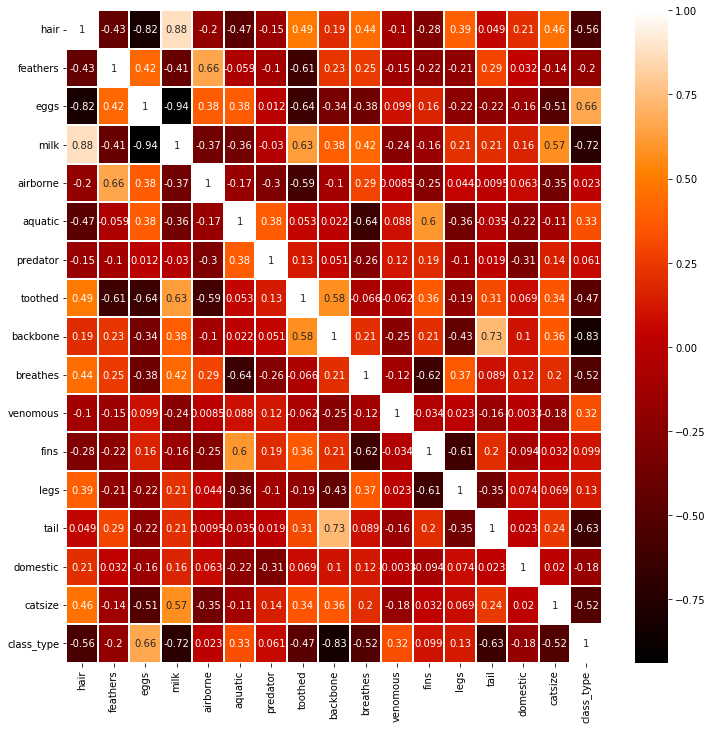

In [217]:
# 데이터 간의 상관관계를 그래프로 표현해 봅니다.

colormap = plt.cm.gist_heat   #그래프의 색상 구성을 정합니다.
plt.figure(figsize=(12,12))   #그래프의 크기를 정합니다.

# 그래프의 속성을 결정합니다. vmax의 값을 1로 지정해 1에 가까울 수록 밝은 색으로 표시되게 합니다.
sns.heatmap(data.corr(),linewidths=0.1,vmax=1, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [4]:
data.describe()

hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.499505    0.491512    0.384605    0.407844    0.271410    0.376013   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    1.000000    1.000000    0.000000    0.000000   
50%      1.000000    1.000000    1.000000    1.000000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000    1.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             legs        tail    domestic     catsize  class_type  
count  101.000000  101.000000  101.000000  101.000000  101.000000  
mean     2.841584    0.742574    0.128713    0.435644    2.831683  
std      2.033385    0.439397    0.336552    0.498314    2.102709  
min      0.000000    0.000000    0.000000    0.000000    1.000000  
25%      2.000000    0.000000    0.000000    0.000000    1.000000  
50%      4.000000    1.000000    0.000000    0.000000    2.000000  
75%      4.000000    1.000000    0.000000    1.000000    4.000000  
max      8.000000    1.000000    1.000000    1.000000    7.000000

In [3]:
dataset = data.values
X = dataset[:,1:17]
Y_obj = dataset[:,17]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = tf.keras.utils.to_categorical(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.3)

In [220]:
# 모델의 설정
model = Sequential()
model.add(Dense(32,  input_dim=16, activation='relu'))
model.add(Dense(7, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

# 모델 실행
history = model.fit(X_train, Y_train, validation_split=0.33, epochs=3000, batch_size=500)

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Train on 46 samples, validate on 24 samples
Epoch 1/3000
46/46 [==============================] - 0s 2ms/step - loss: 2.4616 - accuracy: 0.0870 - val_loss: 2.2811 - val_accuracy: 0.0833
Epoch 2/3000
46/46 [==============================] - 0s 43us/step - loss: 2.4236 - accuracy: 0.0870 - val_loss: 2.2468 - val_accuracy: 0.0833
Epoch 3/3000
46/46 [==============================] - 0s 43us/step - loss: 2.3858 - accuracy: 0.0870 - val_loss: 2.2128 - val_accuracy: 0.0833
Epoch 4/3000
46/46 [==============================] - 0s 43us/step - loss: 2.3484 - accuracy: 0.0870 - val_loss: 2.1793 - val_accuracy: 0.0833
Epoch 5/3000
46/46 [==============================] - 0s 65us/step - loss: 2.3115 - accuracy: 0.0870 - val_loss: 2.1464 - val_accuracy: 0.0833
Epoch 6/3000
46/46 [==============================] - 0s 65us/step - loss: 2.2750 - accuracy: 0.0870 - val_loss: 2.1140 - val_accuracy: 0.0833
Epoch 7/3000
46/46 [==============================] - 0s 65us/step - loss: 2.2391 - accuracy: 0.087

Epoch 58/3000
46/46 [==============================] - 0s 87us/step - loss: 1.1929 - accuracy: 0.5652 - val_loss: 1.2065 - val_accuracy: 0.5833
Epoch 59/3000
46/46 [==============================] - 0s 87us/step - loss: 1.1826 - accuracy: 0.6087 - val_loss: 1.1972 - val_accuracy: 0.5833
Epoch 60/3000
46/46 [==============================] - 0s 87us/step - loss: 1.1723 - accuracy: 0.6087 - val_loss: 1.1878 - val_accuracy: 0.5833
Epoch 61/3000
46/46 [==============================] - 0s 65us/step - loss: 1.1621 - accuracy: 0.6087 - val_loss: 1.1786 - val_accuracy: 0.5833
Epoch 62/3000
46/46 [==============================] - 0s 65us/step - loss: 1.1519 - accuracy: 0.6087 - val_loss: 1.1693 - val_accuracy: 0.5833
Epoch 63/3000
46/46 [==============================] - 0s 65us/step - loss: 1.1418 - accuracy: 0.6087 - val_loss: 1.1601 - val_accuracy: 0.5833
Epoch 64/3000
46/46 [==============================] - 0s 87us/step - loss: 1.1317 - accuracy: 0.6304 - val_loss: 1.1509 - val_accuracy:

Epoch 115/3000
46/46 [==============================] - 0s 65us/step - loss: 0.7073 - accuracy: 0.8478 - val_loss: 0.7603 - val_accuracy: 0.8750
Epoch 116/3000
46/46 [==============================] - 0s 87us/step - loss: 0.7006 - accuracy: 0.8478 - val_loss: 0.7543 - val_accuracy: 0.8750
Epoch 117/3000
46/46 [==============================] - 0s 65us/step - loss: 0.6940 - accuracy: 0.8478 - val_loss: 0.7485 - val_accuracy: 0.8750
Epoch 118/3000
46/46 [==============================] - 0s 43us/step - loss: 0.6874 - accuracy: 0.8478 - val_loss: 0.7427 - val_accuracy: 0.8750
Epoch 119/3000
46/46 [==============================] - 0s 65us/step - loss: 0.6809 - accuracy: 0.8478 - val_loss: 0.7369 - val_accuracy: 0.8750
Epoch 120/3000
46/46 [==============================] - 0s 43us/step - loss: 0.6744 - accuracy: 0.8478 - val_loss: 0.7313 - val_accuracy: 0.8750
Epoch 121/3000
46/46 [==============================] - 0s 43us/step - loss: 0.6680 - accuracy: 0.8696 - val_loss: 0.7257 - val_ac

Epoch 172/3000
46/46 [==============================] - 0s 65us/step - loss: 0.4150 - accuracy: 0.9348 - val_loss: 0.5182 - val_accuracy: 0.8750
Epoch 173/3000
46/46 [==============================] - 0s 65us/step - loss: 0.4113 - accuracy: 0.9348 - val_loss: 0.5151 - val_accuracy: 0.8750
Epoch 174/3000
46/46 [==============================] - 0s 43us/step - loss: 0.4076 - accuracy: 0.9348 - val_loss: 0.5120 - val_accuracy: 0.8750
Epoch 175/3000
46/46 [==============================] - 0s 65us/step - loss: 0.4040 - accuracy: 0.9348 - val_loss: 0.5090 - val_accuracy: 0.8750
Epoch 176/3000
46/46 [==============================] - 0s 65us/step - loss: 0.4004 - accuracy: 0.9348 - val_loss: 0.5060 - val_accuracy: 0.8750
Epoch 177/3000
46/46 [==============================] - 0s 65us/step - loss: 0.3969 - accuracy: 0.9565 - val_loss: 0.5030 - val_accuracy: 0.8750
Epoch 178/3000
46/46 [==============================] - 0s 65us/step - loss: 0.3934 - accuracy: 0.9565 - val_loss: 0.5002 - val_ac

Epoch 229/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2491 - accuracy: 0.9783 - val_loss: 0.4104 - val_accuracy: 0.8750
Epoch 230/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2469 - accuracy: 0.9783 - val_loss: 0.4095 - val_accuracy: 0.8750
Epoch 231/3000
46/46 [==============================] - 0s 65us/step - loss: 0.2447 - accuracy: 0.9783 - val_loss: 0.4085 - val_accuracy: 0.8750
Epoch 232/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2426 - accuracy: 0.9783 - val_loss: 0.4077 - val_accuracy: 0.8750
Epoch 233/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2405 - accuracy: 0.9783 - val_loss: 0.4068 - val_accuracy: 0.8750
Epoch 234/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2384 - accuracy: 0.9783 - val_loss: 0.4060 - val_accuracy: 0.8750
Epoch 235/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2363 - accuracy: 0.9783 - val_loss: 0.4052 - val_ac

Epoch 286/3000
46/46 [==============================] - 0s 65us/step - loss: 0.1537 - accuracy: 1.0000 - val_loss: 0.3622 - val_accuracy: 0.8750
Epoch 287/3000
46/46 [==============================] - 0s 65us/step - loss: 0.1525 - accuracy: 1.0000 - val_loss: 0.3614 - val_accuracy: 0.8750
Epoch 288/3000
46/46 [==============================] - 0s 51us/step - loss: 0.1512 - accuracy: 1.0000 - val_loss: 0.3606 - val_accuracy: 0.8750
Epoch 289/3000
46/46 [==============================] - 0s 65us/step - loss: 0.1500 - accuracy: 1.0000 - val_loss: 0.3598 - val_accuracy: 0.8750
Epoch 290/3000
46/46 [==============================] - 0s 65us/step - loss: 0.1487 - accuracy: 1.0000 - val_loss: 0.3589 - val_accuracy: 0.8750
Epoch 291/3000
46/46 [==============================] - 0s 65us/step - loss: 0.1475 - accuracy: 1.0000 - val_loss: 0.3581 - val_accuracy: 0.8750
Epoch 292/3000
46/46 [==============================] - 0s 65us/step - loss: 0.1463 - accuracy: 1.0000 - val_loss: 0.3572 - val_ac

Epoch 343/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0960 - accuracy: 1.0000 - val_loss: 0.3384 - val_accuracy: 0.9167
Epoch 344/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0952 - accuracy: 1.0000 - val_loss: 0.3384 - val_accuracy: 0.9167
Epoch 345/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0945 - accuracy: 1.0000 - val_loss: 0.3384 - val_accuracy: 0.9167
Epoch 346/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0938 - accuracy: 1.0000 - val_loss: 0.3384 - val_accuracy: 0.9167
Epoch 347/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0930 - accuracy: 1.0000 - val_loss: 0.3384 - val_accuracy: 0.9167
Epoch 348/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0923 - accuracy: 1.0000 - val_loss: 0.3384 - val_accuracy: 0.9167
Epoch 349/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0916 - accuracy: 1.0000 - val_loss: 0.3384 - val_ac

Epoch 400/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0642 - accuracy: 1.0000 - val_loss: 0.3321 - val_accuracy: 0.9167
Epoch 401/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0638 - accuracy: 1.0000 - val_loss: 0.3320 - val_accuracy: 0.9167
Epoch 402/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0634 - accuracy: 1.0000 - val_loss: 0.3319 - val_accuracy: 0.9167
Epoch 403/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0630 - accuracy: 1.0000 - val_loss: 0.3318 - val_accuracy: 0.9167
Epoch 404/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0626 - accuracy: 1.0000 - val_loss: 0.3317 - val_accuracy: 0.9167
Epoch 405/3000
46/46 [==============================] - 0s 47us/step - loss: 0.0622 - accuracy: 1.0000 - val_loss: 0.3315 - val_accuracy: 0.9167
Epoch 406/3000
46/46 [==============================] - 0s 41us/step - loss: 0.0618 - accuracy: 1.0000 - val_loss: 0.3314 - val_ac

Epoch 457/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0449 - accuracy: 1.0000 - val_loss: 0.3253 - val_accuracy: 0.9167
Epoch 458/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0447 - accuracy: 1.0000 - val_loss: 0.3257 - val_accuracy: 0.9167
Epoch 459/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0444 - accuracy: 1.0000 - val_loss: 0.3260 - val_accuracy: 0.9167
Epoch 460/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0442 - accuracy: 1.0000 - val_loss: 0.3263 - val_accuracy: 0.9167
Epoch 461/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0439 - accuracy: 1.0000 - val_loss: 0.3265 - val_accuracy: 0.9167
Epoch 462/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0437 - accuracy: 1.0000 - val_loss: 0.3266 - val_accuracy: 0.9167
Epoch 463/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0434 - accuracy: 1.0000 - val_loss: 0.3267 - val_ac

Epoch 514/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0333 - accuracy: 1.0000 - val_loss: 0.3304 - val_accuracy: 0.9167
Epoch 515/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0331 - accuracy: 1.0000 - val_loss: 0.3304 - val_accuracy: 0.9167
Epoch 516/3000
46/46 [==============================] - 0s 87us/step - loss: 0.0330 - accuracy: 1.0000 - val_loss: 0.3304 - val_accuracy: 0.9167
Epoch 517/3000
46/46 [==============================] - 0s 87us/step - loss: 0.0328 - accuracy: 1.0000 - val_loss: 0.3305 - val_accuracy: 0.9167
Epoch 518/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0326 - accuracy: 1.0000 - val_loss: 0.3305 - val_accuracy: 0.9167
Epoch 519/3000
46/46 [==============================] - 0s 87us/step - loss: 0.0325 - accuracy: 1.0000 - val_loss: 0.3306 - val_accuracy: 0.9167
Epoch 520/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0323 - accuracy: 1.0000 - val_loss: 0.3307 - val_ac

Epoch 571/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0255 - accuracy: 1.0000 - val_loss: 0.3344 - val_accuracy: 0.9167
Epoch 572/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0254 - accuracy: 1.0000 - val_loss: 0.3345 - val_accuracy: 0.9167
Epoch 573/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0253 - accuracy: 1.0000 - val_loss: 0.3345 - val_accuracy: 0.9167
Epoch 574/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0252 - accuracy: 1.0000 - val_loss: 0.3346 - val_accuracy: 0.9167
Epoch 575/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0251 - accuracy: 1.0000 - val_loss: 0.3348 - val_accuracy: 0.9167
Epoch 576/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0250 - accuracy: 1.0000 - val_loss: 0.3349 - val_accuracy: 0.9167
Epoch 577/3000
46/46 [==============================] - 0s 47us/step - loss: 0.0249 - accuracy: 1.0000 - val_loss: 0.3349 - val_ac

Epoch 628/3000
46/46 [==============================] - 0s 87us/step - loss: 0.0202 - accuracy: 1.0000 - val_loss: 0.3397 - val_accuracy: 0.8333
Epoch 629/3000
46/46 [==============================] - 0s 55us/step - loss: 0.0201 - accuracy: 1.0000 - val_loss: 0.3397 - val_accuracy: 0.8333
Epoch 630/3000
46/46 [==============================] - 0s 71us/step - loss: 0.0200 - accuracy: 1.0000 - val_loss: 0.3397 - val_accuracy: 0.8333
Epoch 631/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0199 - accuracy: 1.0000 - val_loss: 0.3397 - val_accuracy: 0.8333
Epoch 632/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0199 - accuracy: 1.0000 - val_loss: 0.3398 - val_accuracy: 0.8333
Epoch 633/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0198 - accuracy: 1.0000 - val_loss: 0.3400 - val_accuracy: 0.8333
Epoch 634/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0197 - accuracy: 1.0000 - val_loss: 0.3402 - val_ac

Epoch 685/3000
46/46 [==============================] - 0s 108us/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 0.3450 - val_accuracy: 0.8333
Epoch 686/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 0.3450 - val_accuracy: 0.8333
Epoch 687/3000
46/46 [==============================] - 0s 87us/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.3451 - val_accuracy: 0.8333
Epoch 688/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 0.3452 - val_accuracy: 0.8333
Epoch 689/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 0.3453 - val_accuracy: 0.8333
Epoch 690/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0160 - accuracy: 1.0000 - val_loss: 0.3454 - val_accuracy: 0.8333
Epoch 691/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0160 - accuracy: 1.0000 - val_loss: 0.3456 - val_a

Epoch 742/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 0.3502 - val_accuracy: 0.8333
Epoch 743/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.3503 - val_accuracy: 0.8333
Epoch 744/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.3505 - val_accuracy: 0.8333
Epoch 745/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.3506 - val_accuracy: 0.8333
Epoch 746/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.3507 - val_accuracy: 0.8333
Epoch 747/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.3507 - val_accuracy: 0.8333
Epoch 748/3000
46/46 [==============================] - 0s 46us/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.3508 - val_ac

Epoch 799/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.3557 - val_accuracy: 0.8333
Epoch 800/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.3558 - val_accuracy: 0.8333
Epoch 801/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.3559 - val_accuracy: 0.8333
Epoch 802/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.3561 - val_accuracy: 0.8333
Epoch 803/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.3561 - val_accuracy: 0.8333
Epoch 804/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.3562 - val_accuracy: 0.8333
Epoch 805/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.3563 - val_ac

Epoch 856/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.3610 - val_accuracy: 0.8333
Epoch 857/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.3610 - val_accuracy: 0.8333
Epoch 858/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.3611 - val_accuracy: 0.8333
Epoch 859/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.3612 - val_accuracy: 0.8333
Epoch 860/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.3613 - val_accuracy: 0.8333
Epoch 861/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.3614 - val_accuracy: 0.8333
Epoch 862/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.3614 - val_ac

Epoch 913/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.3659 - val_accuracy: 0.8333
Epoch 914/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.3660 - val_accuracy: 0.8333
Epoch 915/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.3661 - val_accuracy: 0.8333
Epoch 916/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.3662 - val_accuracy: 0.8333
Epoch 917/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.3664 - val_accuracy: 0.8333
Epoch 918/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.3666 - val_accuracy: 0.8333
Epoch 919/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.3667 - val_ac

Epoch 970/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.3712 - val_accuracy: 0.8333
Epoch 971/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.3713 - val_accuracy: 0.8333
Epoch 972/3000
46/46 [==============================] - 0s 87us/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.3714 - val_accuracy: 0.8333
Epoch 973/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.3714 - val_accuracy: 0.8333
Epoch 974/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.3715 - val_accuracy: 0.8333
Epoch 975/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.3715 - val_accuracy: 0.8333
Epoch 976/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.3716 - val_ac

Epoch 1027/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.3749 - val_accuracy: 0.8333
Epoch 1028/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.3750 - val_accuracy: 0.8333
Epoch 1029/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.3751 - val_accuracy: 0.8333
Epoch 1030/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.3752 - val_accuracy: 0.8333
Epoch 1031/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.3752 - val_accuracy: 0.8333
Epoch 1032/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.3753 - val_accuracy: 0.8333
Epoch 1033/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.3753 -

Epoch 1084/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.3789 - val_accuracy: 0.8333
Epoch 1085/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.3789 - val_accuracy: 0.8333
Epoch 1086/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.3790 - val_accuracy: 0.8333
Epoch 1087/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.3791 - val_accuracy: 0.8333
Epoch 1088/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.3792 - val_accuracy: 0.8333
Epoch 1089/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.3793 - val_accuracy: 0.8333
Epoch 1090/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.3794 -

Epoch 1141/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.3827 - val_accuracy: 0.8333
Epoch 1142/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.3828 - val_accuracy: 0.8333
Epoch 1143/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.3829 - val_accuracy: 0.8333
Epoch 1144/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.3831 - val_accuracy: 0.8333
Epoch 1145/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.3831 - val_accuracy: 0.8333
Epoch 1146/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.3831 - val_accuracy: 0.8333
Epoch 1147/3000
46/46 [==============================] - 0s 87us/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.3832 -

Epoch 1198/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.3866 - val_accuracy: 0.8333
Epoch 1199/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.3867 - val_accuracy: 0.8333
Epoch 1200/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.3868 - val_accuracy: 0.8333
Epoch 1201/3000
46/46 [==============================] - 0s 87us/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.3869 - val_accuracy: 0.8333
Epoch 1202/3000
46/46 [==============================] - 0s 87us/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.3869 - val_accuracy: 0.8333
Epoch 1203/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.3870 - val_accuracy: 0.8333
Epoch 1204/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.3871 -

Epoch 1255/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3905 - val_accuracy: 0.8333
Epoch 1256/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3905 - val_accuracy: 0.8333
Epoch 1257/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3906 - val_accuracy: 0.8333
Epoch 1258/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3906 - val_accuracy: 0.8333
Epoch 1259/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3907 - val_accuracy: 0.8333
Epoch 1260/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3907 - val_accuracy: 0.8333
Epoch 1261/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3908 -

Epoch 1312/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.3940 - val_accuracy: 0.8333
Epoch 1313/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3940 - val_accuracy: 0.8333
Epoch 1314/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3940 - val_accuracy: 0.8333
Epoch 1315/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3941 - val_accuracy: 0.8333
Epoch 1316/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3942 - val_accuracy: 0.8333
Epoch 1317/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3943 - val_accuracy: 0.8333
Epoch 1318/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3944 -

Epoch 1369/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.3975 - val_accuracy: 0.8333
Epoch 1370/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.3975 - val_accuracy: 0.8333
Epoch 1371/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.3976 - val_accuracy: 0.8333
Epoch 1372/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.3977 - val_accuracy: 0.8333
Epoch 1373/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.3978 - val_accuracy: 0.8333
Epoch 1374/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.3978 - val_accuracy: 0.8333
Epoch 1375/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.3979 -

Epoch 1426/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.4010 - val_accuracy: 0.8333
Epoch 1427/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.4011 - val_accuracy: 0.8333
Epoch 1428/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.4011 - val_accuracy: 0.8333
Epoch 1429/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.4012 - val_accuracy: 0.8333
Epoch 1430/3000
46/46 [==============================] - 0s 87us/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.4013 - val_accuracy: 0.8333
Epoch 1431/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.4014 - val_accuracy: 0.8333
Epoch 1432/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.4015 -

Epoch 1483/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.4044 - val_accuracy: 0.8333
Epoch 1484/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.4045 - val_accuracy: 0.8333
Epoch 1485/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.4046 - val_accuracy: 0.8333
Epoch 1486/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.4046 - val_accuracy: 0.8333
Epoch 1487/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.4047 - val_accuracy: 0.8333
Epoch 1488/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.4048 - val_accuracy: 0.8333
Epoch 1489/3000
46/46 [==============================] - 0s 87us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.4048 -

Epoch 1540/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.4079 - val_accuracy: 0.8333
Epoch 1541/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.4079 - val_accuracy: 0.8333
Epoch 1542/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.4080 - val_accuracy: 0.8333
Epoch 1543/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.4080 - val_accuracy: 0.8333
Epoch 1544/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.4081 - val_accuracy: 0.8333
Epoch 1545/3000
46/46 [==============================] - 0s 87us/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.4081 - val_accuracy: 0.8333
Epoch 1546/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.4082 -

Epoch 1597/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.4111 - val_accuracy: 0.8333
Epoch 1598/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.4112 - val_accuracy: 0.8333
Epoch 1599/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.4113 - val_accuracy: 0.8333
Epoch 1600/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.4114 - val_accuracy: 0.8333
Epoch 1601/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.4114 - val_accuracy: 0.8333
Epoch 1602/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.4115 - val_accuracy: 0.8333
Epoch 1603/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.4115 -

Epoch 1654/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.4144 - val_accuracy: 0.8333
Epoch 1655/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.4144 - val_accuracy: 0.8333
Epoch 1656/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.4145 - val_accuracy: 0.8333
Epoch 1657/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.4145 - val_accuracy: 0.8333
Epoch 1658/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.4146 - val_accuracy: 0.8333
Epoch 1659/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.4146 - val_accuracy: 0.8333
Epoch 1660/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.4147 -

Epoch 1711/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.4175 - val_accuracy: 0.8333
Epoch 1712/3000
46/46 [==============================] - 0s 87us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.4176 - val_accuracy: 0.8333
Epoch 1713/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.4176 - val_accuracy: 0.8333
Epoch 1714/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.4177 - val_accuracy: 0.8333
Epoch 1715/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.4178 - val_accuracy: 0.8333
Epoch 1716/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.4178 - val_accuracy: 0.8333
Epoch 1717/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.4179 -

Epoch 1768/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.4207 - val_accuracy: 0.8333
Epoch 1769/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.4208 - val_accuracy: 0.8333
Epoch 1770/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.4208 - val_accuracy: 0.8333
Epoch 1771/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.4209 - val_accuracy: 0.8333
Epoch 1772/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.4209 - val_accuracy: 0.8333
Epoch 1773/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.4209 - val_accuracy: 0.8333
Epoch 1774/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.4210 -

Epoch 1825/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.4238 - val_accuracy: 0.8333
Epoch 1826/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.4238 - val_accuracy: 0.8333
Epoch 1827/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.4238 - val_accuracy: 0.8333
Epoch 1828/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.4239 - val_accuracy: 0.8333
Epoch 1829/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.4239 - val_accuracy: 0.8333
Epoch 1830/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.4240 - val_accuracy: 0.8333
Epoch 1831/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.4240 -

Epoch 1882/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.4266 - val_accuracy: 0.8333
Epoch 1883/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.4267 - val_accuracy: 0.8333
Epoch 1884/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.4267 - val_accuracy: 0.8333
Epoch 1885/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.4268 - val_accuracy: 0.8333
Epoch 1886/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.4268 - val_accuracy: 0.8333
Epoch 1887/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.4269 - val_accuracy: 0.8333
Epoch 1888/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.4269 -

Epoch 1939/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.4296 - val_accuracy: 0.8333
Epoch 1940/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.4296 - val_accuracy: 0.8333
Epoch 1941/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.4297 - val_accuracy: 0.8333
Epoch 1942/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.4298 - val_accuracy: 0.8333
Epoch 1943/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.4298 - val_accuracy: 0.8333
Epoch 1944/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.4299 - val_accuracy: 0.8333
Epoch 1945/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.4299 -

Epoch 1996/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.4325 - val_accuracy: 0.8333
Epoch 1997/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.4325 - val_accuracy: 0.8333
Epoch 1998/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.4325 - val_accuracy: 0.8333
Epoch 1999/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.4326 - val_accuracy: 0.8333
Epoch 2000/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.4326 - val_accuracy: 0.8333
Epoch 2001/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.4327 - val_accuracy: 0.8333
Epoch 2002/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.4327 -

Epoch 2053/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4353 - val_accuracy: 0.8333
Epoch 2054/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4353 - val_accuracy: 0.8333
Epoch 2055/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4354 - val_accuracy: 0.8333
Epoch 2056/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4354 - val_accuracy: 0.8333
Epoch 2057/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4355 - val_accuracy: 0.8333
Epoch 2058/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4356 - val_accuracy: 0.8333
Epoch 2059/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4356 -

Epoch 2110/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4382 - val_accuracy: 0.8333
Epoch 2111/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4382 - val_accuracy: 0.8333
Epoch 2112/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4383 - val_accuracy: 0.8333
Epoch 2113/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4383 - val_accuracy: 0.8333
Epoch 2114/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4383 - val_accuracy: 0.8333
Epoch 2115/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4383 - val_accuracy: 0.8333
Epoch 2116/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4383 -

Epoch 2167/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4409 - val_accuracy: 0.8333
Epoch 2168/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4409 - val_accuracy: 0.8333
Epoch 2169/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4409 - val_accuracy: 0.8333
Epoch 2170/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4409 - val_accuracy: 0.8333
Epoch 2171/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4410 - val_accuracy: 0.8333
Epoch 2172/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4410 - val_accuracy: 0.8333
Epoch 2173/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4411 -

Epoch 2224/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.4434 - val_accuracy: 0.8333
Epoch 2225/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.4435 - val_accuracy: 0.8333
Epoch 2226/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.4435 - val_accuracy: 0.8333
Epoch 2227/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.4435 - val_accuracy: 0.8333
Epoch 2228/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.4436 - val_accuracy: 0.8333
Epoch 2229/3000
46/46 [==============================] - 0s 108us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.4437 - val_accuracy: 0.8333
Epoch 2230/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.4437 

Epoch 2280/3000
46/46 [==============================] - 0s 43us/step - loss: 9.7006e-04 - accuracy: 1.0000 - val_loss: 0.4460 - val_accuracy: 0.8333
Epoch 2281/3000
46/46 [==============================] - 0s 65us/step - loss: 9.6901e-04 - accuracy: 1.0000 - val_loss: 0.4460 - val_accuracy: 0.8333
Epoch 2282/3000
46/46 [==============================] - 0s 43us/step - loss: 9.6794e-04 - accuracy: 1.0000 - val_loss: 0.4460 - val_accuracy: 0.8333
Epoch 2283/3000
46/46 [==============================] - 0s 87us/step - loss: 9.6690e-04 - accuracy: 1.0000 - val_loss: 0.4461 - val_accuracy: 0.8333
Epoch 2284/3000
46/46 [==============================] - 0s 43us/step - loss: 9.6586e-04 - accuracy: 1.0000 - val_loss: 0.4461 - val_accuracy: 0.8333
Epoch 2285/3000
46/46 [==============================] - 0s 65us/step - loss: 9.6483e-04 - accuracy: 1.0000 - val_loss: 0.4461 - val_accuracy: 0.8333
Epoch 2286/3000
46/46 [==============================] - 0s 43us/step - loss: 9.6382e-04 - accuracy:

Epoch 2335/3000
46/46 [==============================] - 0s 65us/step - loss: 9.1517e-04 - accuracy: 1.0000 - val_loss: 0.4485 - val_accuracy: 0.8333
Epoch 2336/3000
46/46 [==============================] - 0s 65us/step - loss: 9.1420e-04 - accuracy: 1.0000 - val_loss: 0.4485 - val_accuracy: 0.8333
Epoch 2337/3000
46/46 [==============================] - 0s 65us/step - loss: 9.1322e-04 - accuracy: 1.0000 - val_loss: 0.4486 - val_accuracy: 0.8333
Epoch 2338/3000
46/46 [==============================] - 0s 65us/step - loss: 9.1229e-04 - accuracy: 1.0000 - val_loss: 0.4486 - val_accuracy: 0.8333
Epoch 2339/3000
46/46 [==============================] - 0s 65us/step - loss: 9.1134e-04 - accuracy: 1.0000 - val_loss: 0.4487 - val_accuracy: 0.8333
Epoch 2340/3000
46/46 [==============================] - 0s 65us/step - loss: 9.1039e-04 - accuracy: 1.0000 - val_loss: 0.4487 - val_accuracy: 0.8333
Epoch 2341/3000
46/46 [==============================] - 0s 65us/step - loss: 9.0941e-04 - accuracy:

Epoch 2390/3000
46/46 [==============================] - 0s 65us/step - loss: 8.6430e-04 - accuracy: 1.0000 - val_loss: 0.4509 - val_accuracy: 0.8333
Epoch 2391/3000
46/46 [==============================] - 0s 43us/step - loss: 8.6343e-04 - accuracy: 1.0000 - val_loss: 0.4509 - val_accuracy: 0.8333
Epoch 2392/3000
46/46 [==============================] - 0s 65us/step - loss: 8.6254e-04 - accuracy: 1.0000 - val_loss: 0.4510 - val_accuracy: 0.8333
Epoch 2393/3000
46/46 [==============================] - 0s 65us/step - loss: 8.6166e-04 - accuracy: 1.0000 - val_loss: 0.4510 - val_accuracy: 0.8333
Epoch 2394/3000
46/46 [==============================] - 0s 43us/step - loss: 8.6077e-04 - accuracy: 1.0000 - val_loss: 0.4511 - val_accuracy: 0.8333
Epoch 2395/3000
46/46 [==============================] - 0s 43us/step - loss: 8.5985e-04 - accuracy: 1.0000 - val_loss: 0.4511 - val_accuracy: 0.8333
Epoch 2396/3000
46/46 [==============================] - 0s 65us/step - loss: 8.5899e-04 - accuracy:

Epoch 2445/3000
46/46 [==============================] - 0s 43us/step - loss: 8.1711e-04 - accuracy: 1.0000 - val_loss: 0.4533 - val_accuracy: 0.8333
Epoch 2446/3000
46/46 [==============================] - 0s 43us/step - loss: 8.1626e-04 - accuracy: 1.0000 - val_loss: 0.4533 - val_accuracy: 0.8333
Epoch 2447/3000
46/46 [==============================] - 0s 65us/step - loss: 8.1544e-04 - accuracy: 1.0000 - val_loss: 0.4533 - val_accuracy: 0.8333
Epoch 2448/3000
46/46 [==============================] - 0s 43us/step - loss: 8.1462e-04 - accuracy: 1.0000 - val_loss: 0.4534 - val_accuracy: 0.8333
Epoch 2449/3000
46/46 [==============================] - 0s 65us/step - loss: 8.1381e-04 - accuracy: 1.0000 - val_loss: 0.4534 - val_accuracy: 0.8333
Epoch 2450/3000
46/46 [==============================] - 0s 43us/step - loss: 8.1298e-04 - accuracy: 1.0000 - val_loss: 0.4534 - val_accuracy: 0.8333
Epoch 2451/3000
46/46 [==============================] - 0s 65us/step - loss: 8.1215e-04 - accuracy:

Epoch 2500/3000
46/46 [==============================] - 0s 43us/step - loss: 7.7318e-04 - accuracy: 1.0000 - val_loss: 0.4557 - val_accuracy: 0.8333
Epoch 2501/3000
46/46 [==============================] - 0s 87us/step - loss: 7.7243e-04 - accuracy: 1.0000 - val_loss: 0.4558 - val_accuracy: 0.8333
Epoch 2502/3000
46/46 [==============================] - 0s 65us/step - loss: 7.7165e-04 - accuracy: 1.0000 - val_loss: 0.4558 - val_accuracy: 0.8333
Epoch 2503/3000
46/46 [==============================] - 0s 65us/step - loss: 7.7089e-04 - accuracy: 1.0000 - val_loss: 0.4558 - val_accuracy: 0.8333
Epoch 2504/3000
46/46 [==============================] - 0s 65us/step - loss: 7.7011e-04 - accuracy: 1.0000 - val_loss: 0.4559 - val_accuracy: 0.8333
Epoch 2505/3000
46/46 [==============================] - 0s 65us/step - loss: 7.6934e-04 - accuracy: 1.0000 - val_loss: 0.4559 - val_accuracy: 0.8333
Epoch 2506/3000
46/46 [==============================] - 0s 22us/step - loss: 7.6858e-04 - accuracy:

Epoch 2555/3000
46/46 [==============================] - 0s 43us/step - loss: 7.3230e-04 - accuracy: 1.0000 - val_loss: 0.4580 - val_accuracy: 0.8333
Epoch 2556/3000
46/46 [==============================] - 0s 43us/step - loss: 7.3158e-04 - accuracy: 1.0000 - val_loss: 0.4581 - val_accuracy: 0.8333
Epoch 2557/3000
46/46 [==============================] - 0s 65us/step - loss: 7.3088e-04 - accuracy: 1.0000 - val_loss: 0.4581 - val_accuracy: 0.8333
Epoch 2558/3000
46/46 [==============================] - 0s 87us/step - loss: 7.3015e-04 - accuracy: 1.0000 - val_loss: 0.4581 - val_accuracy: 0.8333
Epoch 2559/3000
46/46 [==============================] - 0s 65us/step - loss: 7.2942e-04 - accuracy: 1.0000 - val_loss: 0.4581 - val_accuracy: 0.8333
Epoch 2560/3000
46/46 [==============================] - 0s 65us/step - loss: 7.2869e-04 - accuracy: 1.0000 - val_loss: 0.4582 - val_accuracy: 0.8333
Epoch 2561/3000
46/46 [==============================] - 0s 65us/step - loss: 7.2801e-04 - accuracy:

Epoch 2610/3000
46/46 [==============================] - 0s 65us/step - loss: 6.9422e-04 - accuracy: 1.0000 - val_loss: 0.4603 - val_accuracy: 0.8333
Epoch 2611/3000
46/46 [==============================] - 0s 65us/step - loss: 6.9352e-04 - accuracy: 1.0000 - val_loss: 0.4603 - val_accuracy: 0.8333
Epoch 2612/3000
46/46 [==============================] - 0s 65us/step - loss: 6.9288e-04 - accuracy: 1.0000 - val_loss: 0.4604 - val_accuracy: 0.8333
Epoch 2613/3000
46/46 [==============================] - 0s 65us/step - loss: 6.9222e-04 - accuracy: 1.0000 - val_loss: 0.4604 - val_accuracy: 0.8333
Epoch 2614/3000
46/46 [==============================] - 0s 65us/step - loss: 6.9156e-04 - accuracy: 1.0000 - val_loss: 0.4605 - val_accuracy: 0.8333
Epoch 2615/3000
46/46 [==============================] - 0s 65us/step - loss: 6.9089e-04 - accuracy: 1.0000 - val_loss: 0.4605 - val_accuracy: 0.8333
Epoch 2616/3000
46/46 [==============================] - 0s 43us/step - loss: 6.9021e-04 - accuracy:

Epoch 2665/3000
46/46 [==============================] - 0s 44us/step - loss: 6.5866e-04 - accuracy: 1.0000 - val_loss: 0.4625 - val_accuracy: 0.8333
Epoch 2666/3000
46/46 [==============================] - 0s 43us/step - loss: 6.5802e-04 - accuracy: 1.0000 - val_loss: 0.4625 - val_accuracy: 0.8333
Epoch 2667/3000
46/46 [==============================] - 0s 43us/step - loss: 6.5739e-04 - accuracy: 1.0000 - val_loss: 0.4626 - val_accuracy: 0.8333
Epoch 2668/3000
46/46 [==============================] - 0s 65us/step - loss: 6.5675e-04 - accuracy: 1.0000 - val_loss: 0.4626 - val_accuracy: 0.8333
Epoch 2669/3000
46/46 [==============================] - 0s 43us/step - loss: 6.5616e-04 - accuracy: 1.0000 - val_loss: 0.4627 - val_accuracy: 0.8333
Epoch 2670/3000
46/46 [==============================] - 0s 43us/step - loss: 6.5550e-04 - accuracy: 1.0000 - val_loss: 0.4627 - val_accuracy: 0.8333
Epoch 2671/3000
46/46 [==============================] - 0s 43us/step - loss: 6.5489e-04 - accuracy:

Epoch 2720/3000
46/46 [==============================] - 0s 43us/step - loss: 6.2535e-04 - accuracy: 1.0000 - val_loss: 0.4647 - val_accuracy: 0.8333
Epoch 2721/3000
46/46 [==============================] - 0s 65us/step - loss: 6.2477e-04 - accuracy: 1.0000 - val_loss: 0.4647 - val_accuracy: 0.8333
Epoch 2722/3000
46/46 [==============================] - 0s 43us/step - loss: 6.2420e-04 - accuracy: 1.0000 - val_loss: 0.4648 - val_accuracy: 0.8333
Epoch 2723/3000
46/46 [==============================] - 0s 43us/step - loss: 6.2362e-04 - accuracy: 1.0000 - val_loss: 0.4648 - val_accuracy: 0.8333
Epoch 2724/3000
46/46 [==============================] - 0s 43us/step - loss: 6.2302e-04 - accuracy: 1.0000 - val_loss: 0.4648 - val_accuracy: 0.8333
Epoch 2725/3000
46/46 [==============================] - 0s 65us/step - loss: 6.2245e-04 - accuracy: 1.0000 - val_loss: 0.4649 - val_accuracy: 0.8333
Epoch 2726/3000
46/46 [==============================] - 0s 43us/step - loss: 6.2189e-04 - accuracy:

Epoch 2775/3000
46/46 [==============================] - 0s 65us/step - loss: 5.9423e-04 - accuracy: 1.0000 - val_loss: 0.4667 - val_accuracy: 0.8333
Epoch 2776/3000
46/46 [==============================] - 0s 65us/step - loss: 5.9367e-04 - accuracy: 1.0000 - val_loss: 0.4668 - val_accuracy: 0.8333
Epoch 2777/3000
46/46 [==============================] - 0s 87us/step - loss: 5.9314e-04 - accuracy: 1.0000 - val_loss: 0.4668 - val_accuracy: 0.8333
Epoch 2778/3000
46/46 [==============================] - 0s 87us/step - loss: 5.9258e-04 - accuracy: 1.0000 - val_loss: 0.4668 - val_accuracy: 0.8333
Epoch 2779/3000
46/46 [==============================] - 0s 87us/step - loss: 5.9205e-04 - accuracy: 1.0000 - val_loss: 0.4669 - val_accuracy: 0.8333
Epoch 2780/3000
46/46 [==============================] - 0s 65us/step - loss: 5.9150e-04 - accuracy: 1.0000 - val_loss: 0.4669 - val_accuracy: 0.8333
Epoch 2781/3000
46/46 [==============================] - 0s 87us/step - loss: 5.9096e-04 - accuracy:

Epoch 2830/3000
46/46 [==============================] - 0s 65us/step - loss: 5.6507e-04 - accuracy: 1.0000 - val_loss: 0.4688 - val_accuracy: 0.8333
Epoch 2831/3000
46/46 [==============================] - 0s 43us/step - loss: 5.6455e-04 - accuracy: 1.0000 - val_loss: 0.4689 - val_accuracy: 0.8333
Epoch 2832/3000
46/46 [==============================] - 0s 65us/step - loss: 5.6406e-04 - accuracy: 1.0000 - val_loss: 0.4689 - val_accuracy: 0.8333
Epoch 2833/3000
46/46 [==============================] - 0s 195us/step - loss: 5.6352e-04 - accuracy: 1.0000 - val_loss: 0.4689 - val_accuracy: 0.8333
Epoch 2834/3000
46/46 [==============================] - 0s 173us/step - loss: 5.6301e-04 - accuracy: 1.0000 - val_loss: 0.4690 - val_accuracy: 0.8333
Epoch 2835/3000
46/46 [==============================] - 0s 87us/step - loss: 5.6248e-04 - accuracy: 1.0000 - val_loss: 0.4690 - val_accuracy: 0.8333
Epoch 2836/3000
46/46 [==============================] - 0s 87us/step - loss: 5.6198e-04 - accurac

Epoch 2885/3000
46/46 [==============================] - 0s 43us/step - loss: 5.3768e-04 - accuracy: 1.0000 - val_loss: 0.4708 - val_accuracy: 0.8333
Epoch 2886/3000
46/46 [==============================] - 0s 87us/step - loss: 5.3721e-04 - accuracy: 1.0000 - val_loss: 0.4709 - val_accuracy: 0.8333
Epoch 2887/3000
46/46 [==============================] - 0s 65us/step - loss: 5.3673e-04 - accuracy: 1.0000 - val_loss: 0.4709 - val_accuracy: 0.8333
Epoch 2888/3000
46/46 [==============================] - 0s 65us/step - loss: 5.3625e-04 - accuracy: 1.0000 - val_loss: 0.4709 - val_accuracy: 0.8333
Epoch 2889/3000
46/46 [==============================] - 0s 65us/step - loss: 5.3576e-04 - accuracy: 1.0000 - val_loss: 0.4710 - val_accuracy: 0.8333
Epoch 2890/3000
46/46 [==============================] - 0s 65us/step - loss: 5.3528e-04 - accuracy: 1.0000 - val_loss: 0.4710 - val_accuracy: 0.8333
Epoch 2891/3000
46/46 [==============================] - 0s 87us/step - loss: 5.3479e-04 - accuracy:

Epoch 2940/3000
46/46 [==============================] - 0s 65us/step - loss: 5.1195e-04 - accuracy: 1.0000 - val_loss: 0.4729 - val_accuracy: 0.8333
Epoch 2941/3000
46/46 [==============================] - 0s 65us/step - loss: 5.1150e-04 - accuracy: 1.0000 - val_loss: 0.4730 - val_accuracy: 0.8333
Epoch 2942/3000
46/46 [==============================] - 0s 43us/step - loss: 5.1105e-04 - accuracy: 1.0000 - val_loss: 0.4730 - val_accuracy: 0.8333
Epoch 2943/3000
46/46 [==============================] - 0s 65us/step - loss: 5.1058e-04 - accuracy: 1.0000 - val_loss: 0.4731 - val_accuracy: 0.8333
Epoch 2944/3000
46/46 [==============================] - 0s 65us/step - loss: 5.1014e-04 - accuracy: 1.0000 - val_loss: 0.4731 - val_accuracy: 0.8333
Epoch 2945/3000
46/46 [==============================] - 0s 65us/step - loss: 5.0969e-04 - accuracy: 1.0000 - val_loss: 0.4731 - val_accuracy: 0.8333
Epoch 2946/3000
46/46 [==============================] - 0s 43us/step - loss: 5.0927e-04 - accuracy:

Epoch 2995/3000
46/46 [==============================] - 0s 87us/step - loss: 4.8780e-04 - accuracy: 1.0000 - val_loss: 0.4750 - val_accuracy: 0.8333
Epoch 2996/3000
46/46 [==============================] - 0s 65us/step - loss: 4.8736e-04 - accuracy: 1.0000 - val_loss: 0.4750 - val_accuracy: 0.8333
Epoch 2997/3000
46/46 [==============================] - 0s 65us/step - loss: 4.8693e-04 - accuracy: 1.0000 - val_loss: 0.4751 - val_accuracy: 0.8333
Epoch 2998/3000
46/46 [==============================] - 0s 65us/step - loss: 4.8651e-04 - accuracy: 1.0000 - val_loss: 0.4751 - val_accuracy: 0.8333
Epoch 2999/3000
46/46 [==============================] - 0s 65us/step - loss: 4.8609e-04 - accuracy: 1.0000 - val_loss: 0.4751 - val_accuracy: 0.8333
Epoch 3000/3000
31/31 [==============================] - 0s 32us/step

 Accuracy: 0.9355


In [4]:
# 모델의 설정
model = Sequential()
model.add(Dense(32,  input_dim=16, activation='relu'))
model.add(Dense(7, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

# 모델 실행
history = model.fit(X_train, Y_train, validation_split=0.33, epochs=3000, batch_size=500)

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Train on 46 samples, validate on 24 samples
Epoch 1/3000
46/46 [==============================] - 0s 3ms/step - loss: 2.4616 - accuracy: 0.0870 - val_loss: 2.2811 - val_accuracy: 0.0833
Epoch 2/3000
46/46 [==============================] - 0s 43us/step - loss: 2.4236 - accuracy: 0.0870 - val_loss: 2.2468 - val_accuracy: 0.0833
Epoch 3/3000
46/46 [==============================] - 0s 44us/step - loss: 2.3858 - accuracy: 0.0870 - val_loss: 2.2128 - val_accuracy: 0.0833
Epoch 4/3000
46/46 [==============================] - 0s 43us/step - loss: 2.3484 - accuracy: 0.0870 - val_loss: 2.1793 - val_accuracy: 0.0833
Epoch 5/3000
46/46 [==============================] - 0s 43us/step - loss: 2.3115 - accuracy: 0.0870 - val_loss: 2.1464 - val_accuracy: 0.0833
Epoch 6/3000
46/46 [==============================] - 0s 43us/step - loss: 2.2750 - accuracy: 0.0870 - val_loss: 2.1140 - val_accuracy: 0.0833
Epoch 7/3000
46/46 [==============================] - 0s 43us/step - loss: 2.2391 - accuracy: 0.087

Epoch 58/3000
46/46 [==============================] - 0s 43us/step - loss: 1.1932 - accuracy: 0.5652 - val_loss: 1.2068 - val_accuracy: 0.5833
Epoch 59/3000
46/46 [==============================] - 0s 43us/step - loss: 1.1829 - accuracy: 0.6087 - val_loss: 1.1974 - val_accuracy: 0.5833
Epoch 60/3000
46/46 [==============================] - 0s 43us/step - loss: 1.1726 - accuracy: 0.6087 - val_loss: 1.1881 - val_accuracy: 0.5833
Epoch 61/3000
46/46 [==============================] - 0s 22us/step - loss: 1.1624 - accuracy: 0.6087 - val_loss: 1.1788 - val_accuracy: 0.5833
Epoch 62/3000
46/46 [==============================] - 0s 43us/step - loss: 1.1522 - accuracy: 0.6087 - val_loss: 1.1695 - val_accuracy: 0.5833
Epoch 63/3000
46/46 [==============================] - 0s 43us/step - loss: 1.1421 - accuracy: 0.6087 - val_loss: 1.1603 - val_accuracy: 0.5833
Epoch 64/3000
46/46 [==============================] - 0s 43us/step - loss: 1.1320 - accuracy: 0.6304 - val_loss: 1.1511 - val_accuracy:

Epoch 115/3000
46/46 [==============================] - 0s 22us/step - loss: 0.7078 - accuracy: 0.8478 - val_loss: 0.7607 - val_accuracy: 0.8750
Epoch 116/3000
46/46 [==============================] - 0s 43us/step - loss: 0.7011 - accuracy: 0.8478 - val_loss: 0.7548 - val_accuracy: 0.8750
Epoch 117/3000
46/46 [==============================] - 0s 43us/step - loss: 0.6945 - accuracy: 0.8478 - val_loss: 0.7490 - val_accuracy: 0.8750
Epoch 118/3000
46/46 [==============================] - 0s 50us/step - loss: 0.6879 - accuracy: 0.8478 - val_loss: 0.7432 - val_accuracy: 0.8750
Epoch 119/3000
46/46 [==============================] - 0s 21us/step - loss: 0.6814 - accuracy: 0.8478 - val_loss: 0.7374 - val_accuracy: 0.8750
Epoch 120/3000
46/46 [==============================] - 0s 43us/step - loss: 0.6749 - accuracy: 0.8478 - val_loss: 0.7318 - val_accuracy: 0.8750
Epoch 121/3000
46/46 [==============================] - 0s 43us/step - loss: 0.6685 - accuracy: 0.8696 - val_loss: 0.7262 - val_ac

Epoch 172/3000
46/46 [==============================] - 0s 44us/step - loss: 0.4158 - accuracy: 0.9348 - val_loss: 0.5191 - val_accuracy: 0.8750
Epoch 173/3000
46/46 [==============================] - 0s 43us/step - loss: 0.4121 - accuracy: 0.9348 - val_loss: 0.5159 - val_accuracy: 0.8750
Epoch 174/3000
46/46 [==============================] - 0s 43us/step - loss: 0.4084 - accuracy: 0.9348 - val_loss: 0.5129 - val_accuracy: 0.8750
Epoch 175/3000
46/46 [==============================] - 0s 66us/step - loss: 0.4048 - accuracy: 0.9348 - val_loss: 0.5098 - val_accuracy: 0.8750
Epoch 176/3000
46/46 [==============================] - 0s 43us/step - loss: 0.4012 - accuracy: 0.9348 - val_loss: 0.5068 - val_accuracy: 0.8750
Epoch 177/3000
46/46 [==============================] - 0s 43us/step - loss: 0.3977 - accuracy: 0.9565 - val_loss: 0.5039 - val_accuracy: 0.8750
Epoch 178/3000
46/46 [==============================] - 0s 23us/step - loss: 0.3942 - accuracy: 0.9565 - val_loss: 0.5010 - val_ac

Epoch 229/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2498 - accuracy: 0.9783 - val_loss: 0.4105 - val_accuracy: 0.8750
Epoch 230/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2476 - accuracy: 0.9783 - val_loss: 0.4096 - val_accuracy: 0.8750
Epoch 231/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2455 - accuracy: 0.9783 - val_loss: 0.4087 - val_accuracy: 0.8750
Epoch 232/3000
46/46 [==============================] - 0s 22us/step - loss: 0.2433 - accuracy: 0.9783 - val_loss: 0.4078 - val_accuracy: 0.8750
Epoch 233/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2412 - accuracy: 0.9783 - val_loss: 0.4069 - val_accuracy: 0.8750
Epoch 234/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2391 - accuracy: 0.9783 - val_loss: 0.4061 - val_accuracy: 0.8750
Epoch 235/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2370 - accuracy: 0.9783 - val_loss: 0.4053 - val_ac

Epoch 286/3000
46/46 [==============================] - 0s 44us/step - loss: 0.1542 - accuracy: 1.0000 - val_loss: 0.3627 - val_accuracy: 0.8750
Epoch 287/3000
46/46 [==============================] - 0s 44us/step - loss: 0.1529 - accuracy: 1.0000 - val_loss: 0.3619 - val_accuracy: 0.8750
Epoch 288/3000
46/46 [==============================] - 0s 44us/step - loss: 0.1517 - accuracy: 1.0000 - val_loss: 0.3611 - val_accuracy: 0.8750
Epoch 289/3000
46/46 [==============================] - 0s 21us/step - loss: 0.1504 - accuracy: 1.0000 - val_loss: 0.3603 - val_accuracy: 0.8750
Epoch 290/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1492 - accuracy: 1.0000 - val_loss: 0.3594 - val_accuracy: 0.8750
Epoch 291/3000
46/46 [==============================] - 0s 65us/step - loss: 0.1480 - accuracy: 1.0000 - val_loss: 0.3586 - val_accuracy: 0.8750
Epoch 292/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1467 - accuracy: 1.0000 - val_loss: 0.3577 - val_ac

Epoch 343/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0962 - accuracy: 1.0000 - val_loss: 0.3387 - val_accuracy: 0.9167
Epoch 344/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0955 - accuracy: 1.0000 - val_loss: 0.3387 - val_accuracy: 0.9167
Epoch 345/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0947 - accuracy: 1.0000 - val_loss: 0.3387 - val_accuracy: 0.9167
Epoch 346/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0940 - accuracy: 1.0000 - val_loss: 0.3387 - val_accuracy: 0.9167
Epoch 347/3000
46/46 [==============================] - 0s 64us/step - loss: 0.0933 - accuracy: 1.0000 - val_loss: 0.3387 - val_accuracy: 0.9167
Epoch 348/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0926 - accuracy: 1.0000 - val_loss: 0.3387 - val_accuracy: 0.9167
Epoch 349/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0919 - accuracy: 1.0000 - val_loss: 0.3387 - val_ac

Epoch 400/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0644 - accuracy: 1.0000 - val_loss: 0.3322 - val_accuracy: 0.9167
Epoch 401/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0640 - accuracy: 1.0000 - val_loss: 0.3321 - val_accuracy: 0.9167
Epoch 402/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0636 - accuracy: 1.0000 - val_loss: 0.3320 - val_accuracy: 0.9167
Epoch 403/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0631 - accuracy: 1.0000 - val_loss: 0.3320 - val_accuracy: 0.9167
Epoch 404/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0627 - accuracy: 1.0000 - val_loss: 0.3319 - val_accuracy: 0.9167
Epoch 405/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0623 - accuracy: 1.0000 - val_loss: 0.3317 - val_accuracy: 0.9167
Epoch 406/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0619 - accuracy: 1.0000 - val_loss: 0.3314 - val_ac

Epoch 457/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0450 - accuracy: 1.0000 - val_loss: 0.3256 - val_accuracy: 0.9167
Epoch 458/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0448 - accuracy: 1.0000 - val_loss: 0.3260 - val_accuracy: 0.9167
Epoch 459/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0445 - accuracy: 1.0000 - val_loss: 0.3262 - val_accuracy: 0.9167
Epoch 460/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0443 - accuracy: 1.0000 - val_loss: 0.3264 - val_accuracy: 0.9167
Epoch 461/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0440 - accuracy: 1.0000 - val_loss: 0.3265 - val_accuracy: 0.9167
Epoch 462/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0438 - accuracy: 1.0000 - val_loss: 0.3265 - val_accuracy: 0.9167
Epoch 463/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0435 - accuracy: 1.0000 - val_loss: 0.3265 - val_ac

Epoch 514/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0333 - accuracy: 1.0000 - val_loss: 0.3303 - val_accuracy: 0.9167
Epoch 515/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0332 - accuracy: 1.0000 - val_loss: 0.3303 - val_accuracy: 0.9167
Epoch 516/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0330 - accuracy: 1.0000 - val_loss: 0.3304 - val_accuracy: 0.9167
Epoch 517/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0328 - accuracy: 1.0000 - val_loss: 0.3306 - val_accuracy: 0.9167
Epoch 518/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0327 - accuracy: 1.0000 - val_loss: 0.3308 - val_accuracy: 0.9167
Epoch 519/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0325 - accuracy: 1.0000 - val_loss: 0.3308 - val_accuracy: 0.9167
Epoch 520/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0324 - accuracy: 1.0000 - val_loss: 0.3309 - val_ac

Epoch 571/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0256 - accuracy: 1.0000 - val_loss: 0.3344 - val_accuracy: 0.9167
Epoch 572/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0255 - accuracy: 1.0000 - val_loss: 0.3343 - val_accuracy: 0.9167
Epoch 573/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0254 - accuracy: 1.0000 - val_loss: 0.3343 - val_accuracy: 0.9167
Epoch 574/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0252 - accuracy: 1.0000 - val_loss: 0.3343 - val_accuracy: 0.9167
Epoch 575/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0251 - accuracy: 1.0000 - val_loss: 0.3344 - val_accuracy: 0.9167
Epoch 576/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0250 - accuracy: 1.0000 - val_loss: 0.3345 - val_accuracy: 0.9167
Epoch 577/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0249 - accuracy: 1.0000 - val_loss: 0.3347 - val_ac

Epoch 628/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0202 - accuracy: 1.0000 - val_loss: 0.3397 - val_accuracy: 0.8333
Epoch 629/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0201 - accuracy: 1.0000 - val_loss: 0.3398 - val_accuracy: 0.8333
Epoch 630/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0200 - accuracy: 1.0000 - val_loss: 0.3399 - val_accuracy: 0.8333
Epoch 631/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0200 - accuracy: 1.0000 - val_loss: 0.3399 - val_accuracy: 0.8333
Epoch 632/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0199 - accuracy: 1.0000 - val_loss: 0.3400 - val_accuracy: 0.8333
Epoch 633/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0198 - accuracy: 1.0000 - val_loss: 0.3402 - val_accuracy: 0.8333
Epoch 634/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0197 - accuracy: 1.0000 - val_loss: 0.3403 - val_ac

Epoch 685/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 0.3450 - val_accuracy: 0.8333
Epoch 686/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 0.3451 - val_accuracy: 0.8333
Epoch 687/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.3451 - val_accuracy: 0.8333
Epoch 688/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.3452 - val_accuracy: 0.8333
Epoch 689/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 0.3453 - val_accuracy: 0.8333
Epoch 690/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0160 - accuracy: 1.0000 - val_loss: 0.3454 - val_accuracy: 0.8333
Epoch 691/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0160 - accuracy: 1.0000 - val_loss: 0.3455 - val_ac

Epoch 742/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 0.3505 - val_accuracy: 0.8333
Epoch 743/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.3506 - val_accuracy: 0.8333
Epoch 744/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.3506 - val_accuracy: 0.8333
Epoch 745/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.3506 - val_accuracy: 0.8333
Epoch 746/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.3507 - val_accuracy: 0.8333
Epoch 747/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.3509 - val_accuracy: 0.8333
Epoch 748/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.3510 - val_ac

Epoch 799/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.3557 - val_accuracy: 0.8333
Epoch 800/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.3557 - val_accuracy: 0.8333
Epoch 801/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.3558 - val_accuracy: 0.8333
Epoch 802/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.3559 - val_accuracy: 0.8333
Epoch 803/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.3561 - val_accuracy: 0.8333
Epoch 804/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.3563 - val_accuracy: 0.8333
Epoch 805/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.3564 - val_ac

Epoch 856/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.3609 - val_accuracy: 0.8333
Epoch 857/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.3610 - val_accuracy: 0.8333
Epoch 858/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.3611 - val_accuracy: 0.8333
Epoch 859/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.3612 - val_accuracy: 0.8333
Epoch 860/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.3614 - val_accuracy: 0.8333
Epoch 861/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.3615 - val_accuracy: 0.8333
Epoch 862/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.3616 - val_ac

Epoch 913/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.3664 - val_accuracy: 0.8333
Epoch 914/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.3665 - val_accuracy: 0.8333
Epoch 915/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.3665 - val_accuracy: 0.8333
Epoch 916/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.3666 - val_accuracy: 0.8333
Epoch 917/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.3667 - val_accuracy: 0.8333
Epoch 918/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.3668 - val_accuracy: 0.8333
Epoch 919/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.3670 - val_ac

Epoch 970/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.3711 - val_accuracy: 0.8333
Epoch 971/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.3711 - val_accuracy: 0.8333
Epoch 972/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.3712 - val_accuracy: 0.8333
Epoch 973/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.3714 - val_accuracy: 0.8333
Epoch 974/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.3715 - val_accuracy: 0.8333
Epoch 975/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.3715 - val_accuracy: 0.8333
Epoch 976/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.3715 - val_ac

Epoch 1027/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.3748 - val_accuracy: 0.8333
Epoch 1028/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.3749 - val_accuracy: 0.8333
Epoch 1029/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.3750 - val_accuracy: 0.8333
Epoch 1030/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.3751 - val_accuracy: 0.8333
Epoch 1031/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.3752 - val_accuracy: 0.8333
Epoch 1032/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.3753 - val_accuracy: 0.8333
Epoch 1033/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.3754 -

Epoch 1084/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.3787 - val_accuracy: 0.8333
Epoch 1085/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.3788 - val_accuracy: 0.8333
Epoch 1086/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.3788 - val_accuracy: 0.8333
Epoch 1087/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.3789 - val_accuracy: 0.8333
Epoch 1088/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.3790 - val_accuracy: 0.8333
Epoch 1089/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.3791 - val_accuracy: 0.8333
Epoch 1090/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.3792 -

Epoch 1141/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.3827 - val_accuracy: 0.8333
Epoch 1142/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.3828 - val_accuracy: 0.8333
Epoch 1143/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.3829 - val_accuracy: 0.8333
Epoch 1144/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.3830 - val_accuracy: 0.8333
Epoch 1145/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.3831 - val_accuracy: 0.8333
Epoch 1146/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.3831 - val_accuracy: 0.8333
Epoch 1147/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.3831 -

Epoch 1198/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.3866 - val_accuracy: 0.8333
Epoch 1199/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.3867 - val_accuracy: 0.8333
Epoch 1200/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.3868 - val_accuracy: 0.8333
Epoch 1201/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.3868 - val_accuracy: 0.8333
Epoch 1202/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.3868 - val_accuracy: 0.8333
Epoch 1203/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.3869 - val_accuracy: 0.8333
Epoch 1204/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.3870 -

Epoch 1255/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3902 - val_accuracy: 0.8333
Epoch 1256/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3903 - val_accuracy: 0.8333
Epoch 1257/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3904 - val_accuracy: 0.8333
Epoch 1258/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3905 - val_accuracy: 0.8333
Epoch 1259/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3906 - val_accuracy: 0.8333
Epoch 1260/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3907 - val_accuracy: 0.8333
Epoch 1261/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3908 -

Epoch 1312/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.3939 - val_accuracy: 0.8333
Epoch 1313/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3940 - val_accuracy: 0.8333
Epoch 1314/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3941 - val_accuracy: 0.8333
Epoch 1315/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3942 - val_accuracy: 0.8333
Epoch 1316/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3943 - val_accuracy: 0.8333
Epoch 1317/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3944 - val_accuracy: 0.8333
Epoch 1318/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3945 -

Epoch 1369/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.3976 - val_accuracy: 0.8333
Epoch 1370/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.3976 - val_accuracy: 0.8333
Epoch 1371/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.3977 - val_accuracy: 0.8333
Epoch 1372/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.3977 - val_accuracy: 0.8333
Epoch 1373/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.3978 - val_accuracy: 0.8333
Epoch 1374/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.3978 - val_accuracy: 0.8333
Epoch 1375/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.3979 -

Epoch 1426/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.4009 - val_accuracy: 0.8333
Epoch 1427/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.4010 - val_accuracy: 0.8333
Epoch 1428/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.4010 - val_accuracy: 0.8333
Epoch 1429/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.4011 - val_accuracy: 0.8333
Epoch 1430/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.4012 - val_accuracy: 0.8333
Epoch 1431/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.4013 - val_accuracy: 0.8333
Epoch 1432/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.4014 -

Epoch 1483/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.4044 - val_accuracy: 0.8333
Epoch 1484/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.4044 - val_accuracy: 0.8333
Epoch 1485/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.4045 - val_accuracy: 0.8333
Epoch 1486/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.4046 - val_accuracy: 0.8333
Epoch 1487/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.4047 - val_accuracy: 0.8333
Epoch 1488/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.4047 - val_accuracy: 0.8333
Epoch 1489/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.4047 -

46/46 [==============================] - 0s 43us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.4077 - val_accuracy: 0.8333
Epoch 1540/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.4077 - val_accuracy: 0.8333
Epoch 1541/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.4078 - val_accuracy: 0.8333
Epoch 1542/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.4078 - val_accuracy: 0.8333
Epoch 1543/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.4079 - val_accuracy: 0.8333
Epoch 1544/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.4079 - val_accuracy: 0.8333
Epoch 1545/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.4080 - val_accuracy: 0

Epoch 1596/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.4110 - val_accuracy: 0.8333
Epoch 1597/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.4110 - val_accuracy: 0.8333
Epoch 1598/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.4112 - val_accuracy: 0.8333
Epoch 1599/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.4112 - val_accuracy: 0.8333
Epoch 1600/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.4112 - val_accuracy: 0.8333
Epoch 1601/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.4113 - val_accuracy: 0.8333
Epoch 1602/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.4113 -

Epoch 1653/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.4143 - val_accuracy: 0.8333
Epoch 1654/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.4144 - val_accuracy: 0.8333
Epoch 1655/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.4144 - val_accuracy: 0.8333
Epoch 1656/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.4144 - val_accuracy: 0.8333
Epoch 1657/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.4144 - val_accuracy: 0.8333
Epoch 1658/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.4145 - val_accuracy: 0.8333
Epoch 1659/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.4145 -

Epoch 1710/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.4174 - val_accuracy: 0.8333
Epoch 1711/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.4175 - val_accuracy: 0.8333
Epoch 1712/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.4175 - val_accuracy: 0.8333
Epoch 1713/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.4175 - val_accuracy: 0.8333
Epoch 1714/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.4175 - val_accuracy: 0.8333
Epoch 1715/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.4176 - val_accuracy: 0.8333
Epoch 1716/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.4177 -

Epoch 1767/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.4206 - val_accuracy: 0.8333
Epoch 1768/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.4206 - val_accuracy: 0.8333
Epoch 1769/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.4206 - val_accuracy: 0.8333
Epoch 1770/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.4207 - val_accuracy: 0.8333
Epoch 1771/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.4207 - val_accuracy: 0.8333
Epoch 1772/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.4207 - val_accuracy: 0.8333
Epoch 1773/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.4208 -

Epoch 1824/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.4235 - val_accuracy: 0.8333
Epoch 1825/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.4235 - val_accuracy: 0.8333
Epoch 1826/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.4236 - val_accuracy: 0.8333
Epoch 1827/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.4236 - val_accuracy: 0.8333
Epoch 1828/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.4237 - val_accuracy: 0.8333
Epoch 1829/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.4237 - val_accuracy: 0.8333
Epoch 1830/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.4238 -

Epoch 1881/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.4265 - val_accuracy: 0.8333
Epoch 1882/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.4265 - val_accuracy: 0.8333
Epoch 1883/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.4266 - val_accuracy: 0.8333
Epoch 1884/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.4266 - val_accuracy: 0.8333
Epoch 1885/3000
46/46 [==============================] - 0s 66us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.4267 - val_accuracy: 0.8333
Epoch 1886/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.4267 - val_accuracy: 0.8333
Epoch 1887/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.4268 -

Epoch 1938/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.4294 - val_accuracy: 0.8333
Epoch 1939/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.4295 - val_accuracy: 0.8333
Epoch 1940/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.4295 - val_accuracy: 0.8333
Epoch 1941/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.4296 - val_accuracy: 0.8333
Epoch 1942/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.4296 - val_accuracy: 0.8333
Epoch 1943/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.4297 - val_accuracy: 0.8333
Epoch 1944/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.4297 -

Epoch 1995/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.4324 - val_accuracy: 0.8333
Epoch 1996/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.4324 - val_accuracy: 0.8333
Epoch 1997/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.4324 - val_accuracy: 0.8333
Epoch 1998/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.4325 - val_accuracy: 0.8333
Epoch 1999/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.4325 - val_accuracy: 0.8333
Epoch 2000/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.4325 - val_accuracy: 0.8333
Epoch 2001/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.4326 -

Epoch 2052/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.4352 - val_accuracy: 0.8333
Epoch 2053/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.4352 - val_accuracy: 0.8333
Epoch 2054/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4352 - val_accuracy: 0.8333
Epoch 2055/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4353 - val_accuracy: 0.8333
Epoch 2056/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4353 - val_accuracy: 0.8333
Epoch 2057/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4354 - val_accuracy: 0.8333
Epoch 2058/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4354 -

Epoch 2109/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4379 - val_accuracy: 0.8333
Epoch 2110/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4380 - val_accuracy: 0.8333
Epoch 2111/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4380 - val_accuracy: 0.8333
Epoch 2112/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4381 - val_accuracy: 0.8333
Epoch 2113/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4382 - val_accuracy: 0.8333
Epoch 2114/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4382 - val_accuracy: 0.8333
Epoch 2115/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4383 -

Epoch 2166/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4405 - val_accuracy: 0.8333
Epoch 2167/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4406 - val_accuracy: 0.8333
Epoch 2168/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4407 - val_accuracy: 0.8333
Epoch 2169/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4407 - val_accuracy: 0.8333
Epoch 2170/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4408 - val_accuracy: 0.8333
Epoch 2171/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4408 - val_accuracy: 0.8333
Epoch 2172/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4409 -

Epoch 2223/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.4433 - val_accuracy: 0.8333
Epoch 2224/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.4433 - val_accuracy: 0.8333
Epoch 2225/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.4434 - val_accuracy: 0.8333
Epoch 2226/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.4434 - val_accuracy: 0.8333
Epoch 2227/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.4434 - val_accuracy: 0.8333
Epoch 2228/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.4435 - val_accuracy: 0.8333
Epoch 2229/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.4435 -

Epoch 2279/3000
46/46 [==============================] - 0s 43us/step - loss: 9.7181e-04 - accuracy: 1.0000 - val_loss: 0.4458 - val_accuracy: 0.8333
Epoch 2280/3000
46/46 [==============================] - 0s 43us/step - loss: 9.7076e-04 - accuracy: 1.0000 - val_loss: 0.4459 - val_accuracy: 0.8333
Epoch 2281/3000
46/46 [==============================] - 0s 43us/step - loss: 9.6972e-04 - accuracy: 1.0000 - val_loss: 0.4459 - val_accuracy: 0.8333
Epoch 2282/3000
46/46 [==============================] - 0s 43us/step - loss: 9.6869e-04 - accuracy: 1.0000 - val_loss: 0.4460 - val_accuracy: 0.8333
Epoch 2283/3000
46/46 [==============================] - 0s 43us/step - loss: 9.6764e-04 - accuracy: 1.0000 - val_loss: 0.4460 - val_accuracy: 0.8333
Epoch 2284/3000
46/46 [==============================] - 0s 65us/step - loss: 9.6660e-04 - accuracy: 1.0000 - val_loss: 0.4460 - val_accuracy: 0.8333
Epoch 2285/3000
46/46 [==============================] - 0s 43us/step - loss: 9.6557e-04 - accuracy:

Epoch 2334/3000
46/46 [==============================] - 0s 43us/step - loss: 9.1680e-04 - accuracy: 1.0000 - val_loss: 0.4483 - val_accuracy: 0.8333
Epoch 2335/3000
46/46 [==============================] - 0s 43us/step - loss: 9.1581e-04 - accuracy: 1.0000 - val_loss: 0.4484 - val_accuracy: 0.8333
Epoch 2336/3000
46/46 [==============================] - 0s 43us/step - loss: 9.1484e-04 - accuracy: 1.0000 - val_loss: 0.4484 - val_accuracy: 0.8333
Epoch 2337/3000
46/46 [==============================] - 0s 43us/step - loss: 9.1389e-04 - accuracy: 1.0000 - val_loss: 0.4485 - val_accuracy: 0.8333
Epoch 2338/3000
46/46 [==============================] - 0s 43us/step - loss: 9.1295e-04 - accuracy: 1.0000 - val_loss: 0.4486 - val_accuracy: 0.8333
Epoch 2339/3000
46/46 [==============================] - 0s 43us/step - loss: 9.1199e-04 - accuracy: 1.0000 - val_loss: 0.4486 - val_accuracy: 0.8333
Epoch 2340/3000
46/46 [==============================] - 0s 43us/step - loss: 9.1103e-04 - accuracy:

Epoch 2389/3000
46/46 [==============================] - 0s 43us/step - loss: 8.6580e-04 - accuracy: 1.0000 - val_loss: 0.4508 - val_accuracy: 0.8333
Epoch 2390/3000
46/46 [==============================] - 0s 43us/step - loss: 8.6490e-04 - accuracy: 1.0000 - val_loss: 0.4508 - val_accuracy: 0.8333
Epoch 2391/3000
46/46 [==============================] - 0s 22us/step - loss: 8.6402e-04 - accuracy: 1.0000 - val_loss: 0.4509 - val_accuracy: 0.8333
Epoch 2392/3000
46/46 [==============================] - 0s 43us/step - loss: 8.6313e-04 - accuracy: 1.0000 - val_loss: 0.4509 - val_accuracy: 0.8333
Epoch 2393/3000
46/46 [==============================] - 0s 43us/step - loss: 8.6224e-04 - accuracy: 1.0000 - val_loss: 0.4510 - val_accuracy: 0.8333
Epoch 2394/3000
46/46 [==============================] - 0s 43us/step - loss: 8.6136e-04 - accuracy: 1.0000 - val_loss: 0.4510 - val_accuracy: 0.8333
Epoch 2395/3000
46/46 [==============================] - 0s 37us/step - loss: 8.6046e-04 - accuracy:

Epoch 2444/3000
46/46 [==============================] - 0s 43us/step - loss: 8.1850e-04 - accuracy: 1.0000 - val_loss: 0.4532 - val_accuracy: 0.8333
Epoch 2445/3000
46/46 [==============================] - 0s 22us/step - loss: 8.1768e-04 - accuracy: 1.0000 - val_loss: 0.4532 - val_accuracy: 0.8333
Epoch 2446/3000
46/46 [==============================] - 0s 43us/step - loss: 8.1684e-04 - accuracy: 1.0000 - val_loss: 0.4533 - val_accuracy: 0.8333
Epoch 2447/3000
46/46 [==============================] - 0s 43us/step - loss: 8.1603e-04 - accuracy: 1.0000 - val_loss: 0.4533 - val_accuracy: 0.8333
Epoch 2448/3000
46/46 [==============================] - 0s 43us/step - loss: 8.1521e-04 - accuracy: 1.0000 - val_loss: 0.4534 - val_accuracy: 0.8333
Epoch 2449/3000
46/46 [==============================] - 0s 44us/step - loss: 8.1438e-04 - accuracy: 1.0000 - val_loss: 0.4534 - val_accuracy: 0.8333
Epoch 2450/3000
46/46 [==============================] - 0s 43us/step - loss: 8.1355e-04 - accuracy:

Epoch 2499/3000
46/46 [==============================] - 0s 43us/step - loss: 7.7451e-04 - accuracy: 1.0000 - val_loss: 0.4556 - val_accuracy: 0.8333
Epoch 2500/3000
46/46 [==============================] - 0s 43us/step - loss: 7.7374e-04 - accuracy: 1.0000 - val_loss: 0.4557 - val_accuracy: 0.8333
Epoch 2501/3000
46/46 [==============================] - 0s 43us/step - loss: 7.7297e-04 - accuracy: 1.0000 - val_loss: 0.4557 - val_accuracy: 0.8333
Epoch 2502/3000
46/46 [==============================] - 0s 44us/step - loss: 7.7221e-04 - accuracy: 1.0000 - val_loss: 0.4557 - val_accuracy: 0.8333
Epoch 2503/3000
46/46 [==============================] - 0s 43us/step - loss: 7.7145e-04 - accuracy: 1.0000 - val_loss: 0.4558 - val_accuracy: 0.8333
Epoch 2504/3000
46/46 [==============================] - 0s 44us/step - loss: 7.7066e-04 - accuracy: 1.0000 - val_loss: 0.4558 - val_accuracy: 0.8333
Epoch 2505/3000
46/46 [==============================] - 0s 43us/step - loss: 7.6990e-04 - accuracy:

Epoch 2554/3000
46/46 [==============================] - 0s 42us/step - loss: 7.3355e-04 - accuracy: 1.0000 - val_loss: 0.4578 - val_accuracy: 0.8333
Epoch 2555/3000
46/46 [==============================] - 0s 43us/step - loss: 7.3282e-04 - accuracy: 1.0000 - val_loss: 0.4579 - val_accuracy: 0.8333
Epoch 2556/3000
46/46 [==============================] - 0s 44us/step - loss: 7.3211e-04 - accuracy: 1.0000 - val_loss: 0.4579 - val_accuracy: 0.8333
Epoch 2557/3000
46/46 [==============================] - 0s 21us/step - loss: 7.3142e-04 - accuracy: 1.0000 - val_loss: 0.4579 - val_accuracy: 0.8333
Epoch 2558/3000
46/46 [==============================] - 0s 43us/step - loss: 7.3069e-04 - accuracy: 1.0000 - val_loss: 0.4580 - val_accuracy: 0.8333
Epoch 2559/3000
46/46 [==============================] - 0s 44us/step - loss: 7.2996e-04 - accuracy: 1.0000 - val_loss: 0.4580 - val_accuracy: 0.8333
Epoch 2560/3000
46/46 [==============================] - 0s 43us/step - loss: 7.2928e-04 - accuracy:

Epoch 2609/3000
46/46 [==============================] - 0s 43us/step - loss: 6.9538e-04 - accuracy: 1.0000 - val_loss: 0.4601 - val_accuracy: 0.8333
Epoch 2610/3000
46/46 [==============================] - 0s 43us/step - loss: 6.9471e-04 - accuracy: 1.0000 - val_loss: 0.4601 - val_accuracy: 0.8333
Epoch 2611/3000
46/46 [==============================] - 0s 43us/step - loss: 6.9405e-04 - accuracy: 1.0000 - val_loss: 0.4601 - val_accuracy: 0.8333
Epoch 2612/3000
46/46 [==============================] - 0s 43us/step - loss: 6.9338e-04 - accuracy: 1.0000 - val_loss: 0.4602 - val_accuracy: 0.8333
Epoch 2613/3000
46/46 [==============================] - 0s 21us/step - loss: 6.9273e-04 - accuracy: 1.0000 - val_loss: 0.4602 - val_accuracy: 0.8333
Epoch 2614/3000
46/46 [==============================] - 0s 43us/step - loss: 6.9204e-04 - accuracy: 1.0000 - val_loss: 0.4603 - val_accuracy: 0.8333
Epoch 2615/3000
46/46 [==============================] - 0s 43us/step - loss: 6.9140e-04 - accuracy:

Epoch 2664/3000
46/46 [==============================] - 0s 21us/step - loss: 6.5976e-04 - accuracy: 1.0000 - val_loss: 0.4623 - val_accuracy: 0.8333
Epoch 2665/3000
46/46 [==============================] - 0s 43us/step - loss: 6.5914e-04 - accuracy: 1.0000 - val_loss: 0.4623 - val_accuracy: 0.8333
Epoch 2666/3000
46/46 [==============================] - 0s 43us/step - loss: 6.5850e-04 - accuracy: 1.0000 - val_loss: 0.4624 - val_accuracy: 0.8333
Epoch 2667/3000
46/46 [==============================] - 0s 44us/step - loss: 6.5789e-04 - accuracy: 1.0000 - val_loss: 0.4624 - val_accuracy: 0.8333
Epoch 2668/3000
46/46 [==============================] - 0s 43us/step - loss: 6.5727e-04 - accuracy: 1.0000 - val_loss: 0.4624 - val_accuracy: 0.8333
Epoch 2669/3000
46/46 [==============================] - 0s 43us/step - loss: 6.5664e-04 - accuracy: 1.0000 - val_loss: 0.4625 - val_accuracy: 0.8333
Epoch 2670/3000
46/46 [==============================] - 0s 43us/step - loss: 6.5601e-04 - accuracy:

Epoch 2719/3000
46/46 [==============================] - 0s 21us/step - loss: 6.2643e-04 - accuracy: 1.0000 - val_loss: 0.4644 - val_accuracy: 0.8333
Epoch 2720/3000
46/46 [==============================] - 0s 43us/step - loss: 6.2583e-04 - accuracy: 1.0000 - val_loss: 0.4645 - val_accuracy: 0.8333
Epoch 2721/3000
46/46 [==============================] - 0s 43us/step - loss: 6.2525e-04 - accuracy: 1.0000 - val_loss: 0.4645 - val_accuracy: 0.8333
Epoch 2722/3000
46/46 [==============================] - 0s 43us/step - loss: 6.2470e-04 - accuracy: 1.0000 - val_loss: 0.4646 - val_accuracy: 0.8333
Epoch 2723/3000
46/46 [==============================] - 0s 22us/step - loss: 6.2409e-04 - accuracy: 1.0000 - val_loss: 0.4646 - val_accuracy: 0.8333
Epoch 2724/3000
46/46 [==============================] - 0s 43us/step - loss: 6.2352e-04 - accuracy: 1.0000 - val_loss: 0.4646 - val_accuracy: 0.8333
Epoch 2725/3000
46/46 [==============================] - 0s 43us/step - loss: 6.2293e-04 - accuracy:

Epoch 2774/3000
46/46 [==============================] - 0s 43us/step - loss: 5.9523e-04 - accuracy: 1.0000 - val_loss: 0.4665 - val_accuracy: 0.8333
Epoch 2775/3000
46/46 [==============================] - 0s 44us/step - loss: 5.9471e-04 - accuracy: 1.0000 - val_loss: 0.4666 - val_accuracy: 0.8333
Epoch 2776/3000
46/46 [==============================] - 0s 43us/step - loss: 5.9416e-04 - accuracy: 1.0000 - val_loss: 0.4666 - val_accuracy: 0.8333
Epoch 2777/3000
46/46 [==============================] - 0s 44us/step - loss: 5.9359e-04 - accuracy: 1.0000 - val_loss: 0.4667 - val_accuracy: 0.8333
Epoch 2778/3000
46/46 [==============================] - 0s 43us/step - loss: 5.9306e-04 - accuracy: 1.0000 - val_loss: 0.4667 - val_accuracy: 0.8333
Epoch 2779/3000
46/46 [==============================] - 0s 43us/step - loss: 5.9250e-04 - accuracy: 1.0000 - val_loss: 0.4667 - val_accuracy: 0.8333
Epoch 2780/3000
46/46 [==============================] - 0s 43us/step - loss: 5.9195e-04 - accuracy:

Epoch 2829/3000
46/46 [==============================] - 0s 44us/step - loss: 5.6600e-04 - accuracy: 1.0000 - val_loss: 0.4686 - val_accuracy: 0.8333
Epoch 2830/3000
46/46 [==============================] - 0s 21us/step - loss: 5.6549e-04 - accuracy: 1.0000 - val_loss: 0.4687 - val_accuracy: 0.8333
Epoch 2831/3000
46/46 [==============================] - 0s 43us/step - loss: 5.6501e-04 - accuracy: 1.0000 - val_loss: 0.4687 - val_accuracy: 0.8333
Epoch 2832/3000
46/46 [==============================] - 0s 43us/step - loss: 5.6449e-04 - accuracy: 1.0000 - val_loss: 0.4687 - val_accuracy: 0.8333
Epoch 2833/3000
46/46 [==============================] - 0s 43us/step - loss: 5.6397e-04 - accuracy: 1.0000 - val_loss: 0.4688 - val_accuracy: 0.8333
Epoch 2834/3000
46/46 [==============================] - 0s 43us/step - loss: 5.6346e-04 - accuracy: 1.0000 - val_loss: 0.4688 - val_accuracy: 0.8333
Epoch 2835/3000
46/46 [==============================] - 0s 43us/step - loss: 5.6295e-04 - accuracy:

Epoch 2884/3000
46/46 [==============================] - 0s 44us/step - loss: 5.3858e-04 - accuracy: 1.0000 - val_loss: 0.4707 - val_accuracy: 0.8333
Epoch 2885/3000
46/46 [==============================] - 0s 43us/step - loss: 5.3811e-04 - accuracy: 1.0000 - val_loss: 0.4707 - val_accuracy: 0.8333
Epoch 2886/3000
46/46 [==============================] - 0s 43us/step - loss: 5.3761e-04 - accuracy: 1.0000 - val_loss: 0.4707 - val_accuracy: 0.8333
Epoch 2887/3000
46/46 [==============================] - 0s 43us/step - loss: 5.3713e-04 - accuracy: 1.0000 - val_loss: 0.4708 - val_accuracy: 0.8333
Epoch 2888/3000
46/46 [==============================] - 0s 43us/step - loss: 5.3667e-04 - accuracy: 1.0000 - val_loss: 0.4708 - val_accuracy: 0.8333
Epoch 2889/3000
46/46 [==============================] - 0s 43us/step - loss: 5.3618e-04 - accuracy: 1.0000 - val_loss: 0.4708 - val_accuracy: 0.8333
Epoch 2890/3000
46/46 [==============================] - 0s 43us/step - loss: 5.3569e-04 - accuracy:

Epoch 2939/3000
46/46 [==============================] - 0s 65us/step - loss: 5.1281e-04 - accuracy: 1.0000 - val_loss: 0.4728 - val_accuracy: 0.8333
Epoch 2940/3000
46/46 [==============================] - 0s 43us/step - loss: 5.1236e-04 - accuracy: 1.0000 - val_loss: 0.4728 - val_accuracy: 0.8333
Epoch 2941/3000
46/46 [==============================] - 0s 22us/step - loss: 5.1191e-04 - accuracy: 1.0000 - val_loss: 0.4729 - val_accuracy: 0.8333
Epoch 2942/3000
46/46 [==============================] - 0s 43us/step - loss: 5.1145e-04 - accuracy: 1.0000 - val_loss: 0.4729 - val_accuracy: 0.8333
Epoch 2943/3000
46/46 [==============================] - 0s 22us/step - loss: 5.1100e-04 - accuracy: 1.0000 - val_loss: 0.4729 - val_accuracy: 0.8333
Epoch 2944/3000
46/46 [==============================] - 0s 43us/step - loss: 5.1056e-04 - accuracy: 1.0000 - val_loss: 0.4730 - val_accuracy: 0.8333
Epoch 2945/3000
46/46 [==============================] - 0s 42us/step - loss: 5.1010e-04 - accuracy:

Epoch 2994/3000
46/46 [==============================] - 0s 44us/step - loss: 4.8860e-04 - accuracy: 1.0000 - val_loss: 0.4748 - val_accuracy: 0.8333
Epoch 2995/3000
46/46 [==============================] - 0s 43us/step - loss: 4.8817e-04 - accuracy: 1.0000 - val_loss: 0.4748 - val_accuracy: 0.8333
Epoch 2996/3000
46/46 [==============================] - 0s 22us/step - loss: 4.8777e-04 - accuracy: 1.0000 - val_loss: 0.4749 - val_accuracy: 0.8333
Epoch 2997/3000
46/46 [==============================] - 0s 43us/step - loss: 4.8733e-04 - accuracy: 1.0000 - val_loss: 0.4749 - val_accuracy: 0.8333
Epoch 2998/3000
46/46 [==============================] - 0s 43us/step - loss: 4.8691e-04 - accuracy: 1.0000 - val_loss: 0.4750 - val_accuracy: 0.8333
Epoch 2999/3000
46/46 [==============================] - 0s 43us/step - loss: 4.8649e-04 - accuracy: 1.0000 - val_loss: 0.4750 - val_accuracy: 0.8333
Epoch 3000/3000
31/31 [==============================] - 0s 32us/step

 Accuracy: 0.9355


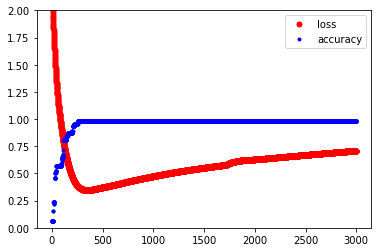

In [12]:
%matplotlib inline 

# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

# y_acc 에 학습 셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=5, label="loss")
plt.plot(x_len, y_acc, "o", c="blue", markersize=3, label="accuracy")
plt.legend()

plt.ylim(0,2)
plt.show()

In [211]:
model.fit(X_train, Y_train, epochs=250, batch_size=500)
# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Epoch 1/250
70/70 [==============================] - 0s 14us/step - loss: 0.3524 - accuracy: 0.9571
Epoch 2/250
70/70 [==============================] - 0s 28us/step - loss: 0.3442 - accuracy: 0.9571
Epoch 3/250
70/70 [==============================] - 0s 14us/step - loss: 0.3315 - accuracy: 0.9571
Epoch 4/250
70/70 [==============================] - 0s 14us/step - loss: 0.3162 - accuracy: 0.9571
Epoch 5/250
70/70 [==============================] - 0s 29us/step - loss: 0.2999 - accuracy: 0.9571
Epoch 6/250
70/70 [==============================] - 0s 14us/step - loss: 0.2837 - accuracy: 0.9571
Epoch 7/250
70/70 [==============================] - 0s 14us/step - loss: 0.2674 - accuracy: 0.9571
Epoch 8/250
70/70 [==============================] - 0s 14us/step - loss: 0.2512 - accuracy: 0.9571
Epoch 9/250
70/70 [==============================] - 0s 14us/step - loss: 0.2353 - accuracy: 0.9571
Epoch 10/250
70/70 [==============================] - 0s 29us/step - loss: 0.2196 - accuracy: 0.9571

Epoch 83/250
70/70 [==============================] - 0s 14us/step - loss: 0.0076 - accuracy: 1.0000
Epoch 84/250
70/70 [==============================] - 0s 29us/step - loss: 0.0075 - accuracy: 1.0000
Epoch 85/250
70/70 [==============================] - 0s 28us/step - loss: 0.0074 - accuracy: 1.0000
Epoch 86/250
70/70 [==============================] - 0s 28us/step - loss: 0.0073 - accuracy: 1.0000
Epoch 87/250
70/70 [==============================] - 0s 28us/step - loss: 0.0072 - accuracy: 1.0000
Epoch 88/250
70/70 [==============================] - 0s 14us/step - loss: 0.0071 - accuracy: 1.0000
Epoch 89/250
70/70 [==============================] - 0s 29us/step - loss: 0.0070 - accuracy: 1.0000
Epoch 90/250
70/70 [==============================] - 0s 14us/step - loss: 0.0069 - accuracy: 1.0000
Epoch 91/250
70/70 [==============================] - 0s 28us/step - loss: 0.0068 - accuracy: 1.0000
Epoch 92/250
70/70 [==============================] - 0s 14us/step - loss: 0.0067 - accurac

Epoch 164/250
70/70 [==============================] - 0s 28us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 165/250
70/70 [==============================] - 0s 28us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 166/250
70/70 [==============================] - 0s 14us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 167/250
70/70 [==============================] - 0s 14us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 168/250
70/70 [==============================] - 0s 14us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 169/250
70/70 [==============================] - 0s 14us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 170/250
70/70 [==============================] - 0s 28us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 171/250
70/70 [==============================] - 0s 14us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 172/250
70/70 [==============================] - 0s 14us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 173/250
70/70 [==============================] - 0s 28us/step - loss: 0.0035

Epoch 245/250
70/70 [==============================] - 0s 14us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 246/250
70/70 [==============================] - 0s 14us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 247/250
70/70 [==============================] - 0s 29us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 248/250
70/70 [==============================] - 0s 14us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 249/250
70/70 [==============================] - 0s 28us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 250/250
31/31 [==============================] - 0s 0us/step

 Accuracy: 1.0000


In [212]:
# 건드리지 말것# 
array = model.predict_classes(X_test)
Y_recovery = np.argmax(Y_test, axis = 1).reshape(-1, 1)

for i,j in zip(array,Y_recovery):
     print("[실제 값] : " , name[i],"\t\t[예측 값] : " , name[int(j)], "\t\t[성공여부] :" , str(i) == str(int(j)))

[실제 값] :  Bug 		[예측 값] :  Bug 		[성공여부] : True
[실제 값] :  Bug 		[예측 값] :  Bug 		[성공여부] : True
[실제 값] :  Mammal 		[예측 값] :  Mammal 		[성공여부] : True
[실제 값] :  Mammal 		[예측 값] :  Mammal 		[성공여부] : True
[실제 값] :  Mammal 		[예측 값] :  Mammal 		[성공여부] : True
[실제 값] :  Mammal 		[예측 값] :  Mammal 		[성공여부] : True
[실제 값] :  Bird 		[예측 값] :  Bird 		[성공여부] : True
[실제 값] :  Bug 		[예측 값] :  Bug 		[성공여부] : True
[실제 값] :  Fish 		[예측 값] :  Fish 		[성공여부] : True
[실제 값] :  Mammal 		[예측 값] :  Mammal 		[성공여부] : True
[실제 값] :  Fish 		[예측 값] :  Fish 		[성공여부] : True
[실제 값] :  Reptile 		[예측 값] :  Reptile 		[성공여부] : True
[실제 값] :  Fish 		[예측 값] :  Fish 		[성공여부] : True
[실제 값] :  Fish 		[예측 값] :  Fish 		[성공여부] : True
[실제 값] :  Mammal 		[예측 값] :  Mammal 		[성공여부] : True
[실제 값] :  Mammal 		[예측 값] :  Mammal 		[성공여부] : True
[실제 값] :  Amphibian 		[예측 값] :  Amphibian 		[성공여부] : True
[실제 값] :  Fish 		[예측 값] :  Fish 		[성공여부] : True
[실제 값] :  Mammal 		[예측 값] :  Mammal 		[성공여부] : True
[실제 값] :  Mammal 		[예측 값] :  Mammal 		[성공여부] :

In [25]:
# class와 음의 상관관계를 가지는 제거한 데이터
data = pd.read_csv('../dataset/zoo.csv', usecols = ["feathers","eggs",
        "airborne","aquatic","venomous","legs","domestic","predator", "fins",  "class_type"])
dataset = data.values
X = dataset[:,0:9]
Y_obj = dataset[:,9]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = tf.keras.utils.to_categorical(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.3)

model = Sequential()
model.add(Dense(32,  input_dim=9, activation='relu'))
model.add(Dense(7, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

# 모델 실행
history = model.fit(X_train, Y_train, validation_split=0.33, epochs=3000, batch_size=500)

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Train on 46 samples, validate on 24 samples
Epoch 1/3000
46/46 [==============================] - 0s 1ms/step - loss: 2.3042 - accuracy: 0.0652 - val_loss: 2.1782 - val_accuracy: 0.1250
Epoch 2/3000
46/46 [==============================] - 0s 43us/step - loss: 2.2810 - accuracy: 0.0652 - val_loss: 2.1617 - val_accuracy: 0.1250
Epoch 3/3000
46/46 [==============================] - 0s 44us/step - loss: 2.2613 - accuracy: 0.0652 - val_loss: 2.1427 - val_accuracy: 0.1250
Epoch 4/3000
46/46 [==============================] - 0s 43us/step - loss: 2.2385 - accuracy: 0.0652 - val_loss: 2.1239 - val_accuracy: 0.1250
Epoch 5/3000
46/46 [==============================] - 0s 43us/step - loss: 2.2159 - accuracy: 0.0652 - val_loss: 2.1053 - val_accuracy: 0.1250
Epoch 6/3000
46/46 [==============================] - 0s 43us/step - loss: 2.1937 - accuracy: 0.0652 - val_loss: 2.0869 - val_accuracy: 0.1250
Epoch 7/3000
46/46 [==============================] - 0s 43us/step - loss: 2.1717 - accuracy: 0.065

Epoch 58/3000
46/46 [==============================] - 0s 43us/step - loss: 1.3960 - accuracy: 0.5870 - val_loss: 1.4607 - val_accuracy: 0.6667
Epoch 59/3000
46/46 [==============================] - 0s 43us/step - loss: 1.3867 - accuracy: 0.5870 - val_loss: 1.4543 - val_accuracy: 0.6667
Epoch 60/3000
46/46 [==============================] - 0s 22us/step - loss: 1.3776 - accuracy: 0.5870 - val_loss: 1.4480 - val_accuracy: 0.6667
Epoch 61/3000
46/46 [==============================] - 0s 43us/step - loss: 1.3686 - accuracy: 0.5870 - val_loss: 1.4419 - val_accuracy: 0.6667
Epoch 62/3000
46/46 [==============================] - 0s 43us/step - loss: 1.3597 - accuracy: 0.5870 - val_loss: 1.4358 - val_accuracy: 0.6667
Epoch 63/3000
46/46 [==============================] - 0s 43us/step - loss: 1.3509 - accuracy: 0.5870 - val_loss: 1.4299 - val_accuracy: 0.6667
Epoch 64/3000
46/46 [==============================] - 0s 43us/step - loss: 1.3423 - accuracy: 0.6522 - val_loss: 1.4241 - val_accuracy:

Epoch 115/3000
46/46 [==============================] - 0s 43us/step - loss: 0.9865 - accuracy: 0.7391 - val_loss: 1.1950 - val_accuracy: 0.6667
Epoch 116/3000
46/46 [==============================] - 0s 65us/step - loss: 0.9807 - accuracy: 0.7391 - val_loss: 1.1912 - val_accuracy: 0.6667
Epoch 117/3000
46/46 [==============================] - 0s 43us/step - loss: 0.9750 - accuracy: 0.7391 - val_loss: 1.1875 - val_accuracy: 0.6667
Epoch 118/3000
46/46 [==============================] - 0s 43us/step - loss: 0.9693 - accuracy: 0.7391 - val_loss: 1.1837 - val_accuracy: 0.6667
Epoch 119/3000
46/46 [==============================] - 0s 43us/step - loss: 0.9637 - accuracy: 0.7391 - val_loss: 1.1800 - val_accuracy: 0.6667
Epoch 120/3000
46/46 [==============================] - 0s 22us/step - loss: 0.9580 - accuracy: 0.7391 - val_loss: 1.1763 - val_accuracy: 0.6667
Epoch 121/3000
46/46 [==============================] - 0s 43us/step - loss: 0.9524 - accuracy: 0.7391 - val_loss: 1.1726 - val_ac

Epoch 172/3000
46/46 [==============================] - 0s 43us/step - loss: 0.7228 - accuracy: 0.8261 - val_loss: 1.0052 - val_accuracy: 0.6667
Epoch 173/3000
46/46 [==============================] - 0s 43us/step - loss: 0.7191 - accuracy: 0.8261 - val_loss: 1.0023 - val_accuracy: 0.6667
Epoch 174/3000
46/46 [==============================] - 0s 43us/step - loss: 0.7154 - accuracy: 0.8261 - val_loss: 0.9994 - val_accuracy: 0.6667
Epoch 175/3000
46/46 [==============================] - 0s 43us/step - loss: 0.7117 - accuracy: 0.8261 - val_loss: 0.9965 - val_accuracy: 0.6667
Epoch 176/3000
46/46 [==============================] - 0s 22us/step - loss: 0.7080 - accuracy: 0.8261 - val_loss: 0.9936 - val_accuracy: 0.6667
Epoch 177/3000
46/46 [==============================] - 0s 43us/step - loss: 0.7044 - accuracy: 0.8261 - val_loss: 0.9908 - val_accuracy: 0.6667
Epoch 178/3000
46/46 [==============================] - 0s 43us/step - loss: 0.7008 - accuracy: 0.8261 - val_loss: 0.9880 - val_ac

Epoch 229/3000
46/46 [==============================] - 0s 43us/step - loss: 0.5467 - accuracy: 0.8913 - val_loss: 0.8648 - val_accuracy: 0.6667
Epoch 230/3000
46/46 [==============================] - 0s 43us/step - loss: 0.5441 - accuracy: 0.8913 - val_loss: 0.8627 - val_accuracy: 0.6667
Epoch 231/3000
46/46 [==============================] - 0s 43us/step - loss: 0.5416 - accuracy: 0.8913 - val_loss: 0.8605 - val_accuracy: 0.6667
Epoch 232/3000
46/46 [==============================] - 0s 43us/step - loss: 0.5391 - accuracy: 0.8913 - val_loss: 0.8583 - val_accuracy: 0.6667
Epoch 233/3000
46/46 [==============================] - 0s 22us/step - loss: 0.5366 - accuracy: 0.8913 - val_loss: 0.8562 - val_accuracy: 0.6667
Epoch 234/3000
46/46 [==============================] - 0s 43us/step - loss: 0.5341 - accuracy: 0.8913 - val_loss: 0.8540 - val_accuracy: 0.6667
Epoch 235/3000
46/46 [==============================] - 0s 22us/step - loss: 0.5316 - accuracy: 0.8913 - val_loss: 0.8518 - val_ac

Epoch 286/3000
46/46 [==============================] - 0s 43us/step - loss: 0.4219 - accuracy: 0.9130 - val_loss: 0.7537 - val_accuracy: 0.7083
Epoch 287/3000
46/46 [==============================] - 0s 22us/step - loss: 0.4201 - accuracy: 0.9130 - val_loss: 0.7520 - val_accuracy: 0.7083
Epoch 288/3000
46/46 [==============================] - 0s 43us/step - loss: 0.4182 - accuracy: 0.9130 - val_loss: 0.7503 - val_accuracy: 0.7083
Epoch 289/3000
46/46 [==============================] - 0s 43us/step - loss: 0.4164 - accuracy: 0.9130 - val_loss: 0.7485 - val_accuracy: 0.7083
Epoch 290/3000
46/46 [==============================] - 0s 22us/step - loss: 0.4145 - accuracy: 0.9130 - val_loss: 0.7468 - val_accuracy: 0.7083
Epoch 291/3000
46/46 [==============================] - 0s 43us/step - loss: 0.4127 - accuracy: 0.9130 - val_loss: 0.7450 - val_accuracy: 0.7083
Epoch 292/3000
46/46 [==============================] - 0s 43us/step - loss: 0.4108 - accuracy: 0.9130 - val_loss: 0.7432 - val_ac

Epoch 343/3000
46/46 [==============================] - 0s 44us/step - loss: 0.3267 - accuracy: 0.9348 - val_loss: 0.6674 - val_accuracy: 0.7917
Epoch 344/3000
46/46 [==============================] - 0s 43us/step - loss: 0.3253 - accuracy: 0.9348 - val_loss: 0.6662 - val_accuracy: 0.7917
Epoch 345/3000
46/46 [==============================] - 0s 43us/step - loss: 0.3239 - accuracy: 0.9348 - val_loss: 0.6652 - val_accuracy: 0.7917
Epoch 346/3000
46/46 [==============================] - 0s 22us/step - loss: 0.3225 - accuracy: 0.9348 - val_loss: 0.6641 - val_accuracy: 0.7917
Epoch 347/3000
46/46 [==============================] - 0s 43us/step - loss: 0.3211 - accuracy: 0.9348 - val_loss: 0.6631 - val_accuracy: 0.7917
Epoch 348/3000
46/46 [==============================] - 0s 43us/step - loss: 0.3198 - accuracy: 0.9348 - val_loss: 0.6620 - val_accuracy: 0.7917
Epoch 349/3000
46/46 [==============================] - 0s 22us/step - loss: 0.3184 - accuracy: 0.9348 - val_loss: 0.6610 - val_ac

Epoch 400/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2592 - accuracy: 0.9348 - val_loss: 0.6090 - val_accuracy: 0.7917
Epoch 401/3000
46/46 [==============================] - 0s 44us/step - loss: 0.2582 - accuracy: 0.9348 - val_loss: 0.6082 - val_accuracy: 0.7917
Epoch 402/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2572 - accuracy: 0.9348 - val_loss: 0.6073 - val_accuracy: 0.7917
Epoch 403/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2562 - accuracy: 0.9348 - val_loss: 0.6064 - val_accuracy: 0.7917
Epoch 404/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2552 - accuracy: 0.9348 - val_loss: 0.6056 - val_accuracy: 0.7917
Epoch 405/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2542 - accuracy: 0.9348 - val_loss: 0.6047 - val_accuracy: 0.7917
Epoch 406/3000
46/46 [==============================] - 0s 44us/step - loss: 0.2532 - accuracy: 0.9348 - val_loss: 0.6039 - val_ac

Epoch 457/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2101 - accuracy: 0.9348 - val_loss: 0.5687 - val_accuracy: 0.7917
Epoch 458/3000
46/46 [==============================] - 0s 22us/step - loss: 0.2094 - accuracy: 0.9348 - val_loss: 0.5681 - val_accuracy: 0.7917
Epoch 459/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2087 - accuracy: 0.9348 - val_loss: 0.5676 - val_accuracy: 0.7917
Epoch 460/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2079 - accuracy: 0.9348 - val_loss: 0.5670 - val_accuracy: 0.7917
Epoch 461/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2072 - accuracy: 0.9348 - val_loss: 0.5665 - val_accuracy: 0.7917
Epoch 462/3000
46/46 [==============================] - 0s 42us/step - loss: 0.2065 - accuracy: 0.9348 - val_loss: 0.5659 - val_accuracy: 0.7917
Epoch 463/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2058 - accuracy: 0.9348 - val_loss: 0.5654 - val_ac

Epoch 514/3000
46/46 [==============================] - 0s 130us/step - loss: 0.1738 - accuracy: 0.9783 - val_loss: 0.5426 - val_accuracy: 0.7917
Epoch 515/3000
46/46 [==============================] - 0s 47us/step - loss: 0.1732 - accuracy: 0.9783 - val_loss: 0.5423 - val_accuracy: 0.7917
Epoch 516/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1727 - accuracy: 0.9783 - val_loss: 0.5419 - val_accuracy: 0.7917
Epoch 517/3000
46/46 [==============================] - 0s 22us/step - loss: 0.1721 - accuracy: 0.9783 - val_loss: 0.5415 - val_accuracy: 0.7917
Epoch 518/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1716 - accuracy: 0.9783 - val_loss: 0.5412 - val_accuracy: 0.7917
Epoch 519/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1710 - accuracy: 0.9783 - val_loss: 0.5408 - val_accuracy: 0.7917
Epoch 520/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1705 - accuracy: 0.9783 - val_loss: 0.5404 - val_a

Epoch 571/3000
46/46 [==============================] - 0s 44us/step - loss: 0.1465 - accuracy: 0.9783 - val_loss: 0.5249 - val_accuracy: 0.7917
Epoch 572/3000
46/46 [==============================] - 0s 22us/step - loss: 0.1461 - accuracy: 0.9783 - val_loss: 0.5246 - val_accuracy: 0.7917
Epoch 573/3000
46/46 [==============================] - 0s 44us/step - loss: 0.1457 - accuracy: 0.9783 - val_loss: 0.5244 - val_accuracy: 0.7917
Epoch 574/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1452 - accuracy: 0.9783 - val_loss: 0.5242 - val_accuracy: 0.7917
Epoch 575/3000
46/46 [==============================] - 0s 22us/step - loss: 0.1448 - accuracy: 0.9783 - val_loss: 0.5240 - val_accuracy: 0.7917
Epoch 576/3000
46/46 [==============================] - 0s 21us/step - loss: 0.1444 - accuracy: 0.9783 - val_loss: 0.5238 - val_accuracy: 0.7917
Epoch 577/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1440 - accuracy: 0.9783 - val_loss: 0.5235 - val_ac

Epoch 628/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1257 - accuracy: 0.9783 - val_loss: 0.5136 - val_accuracy: 0.7917
Epoch 629/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1254 - accuracy: 0.9783 - val_loss: 0.5134 - val_accuracy: 0.7917
Epoch 630/3000
46/46 [==============================] - 0s 44us/step - loss: 0.1251 - accuracy: 0.9783 - val_loss: 0.5133 - val_accuracy: 0.7917
Epoch 631/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1247 - accuracy: 0.9783 - val_loss: 0.5132 - val_accuracy: 0.7917
Epoch 632/3000
46/46 [==============================] - 0s 21us/step - loss: 0.1244 - accuracy: 0.9783 - val_loss: 0.5130 - val_accuracy: 0.7917
Epoch 633/3000
46/46 [==============================] - 0s 44us/step - loss: 0.1241 - accuracy: 0.9783 - val_loss: 0.5128 - val_accuracy: 0.7917
Epoch 634/3000
46/46 [==============================] - 0s 22us/step - loss: 0.1238 - accuracy: 0.9783 - val_loss: 0.5127 - val_ac

Epoch 685/3000
46/46 [==============================] - 0s 21us/step - loss: 0.1096 - accuracy: 0.9783 - val_loss: 0.5067 - val_accuracy: 0.7917
Epoch 686/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1094 - accuracy: 0.9783 - val_loss: 0.5066 - val_accuracy: 0.7917
Epoch 687/3000
46/46 [==============================] - 0s 21us/step - loss: 0.1091 - accuracy: 0.9783 - val_loss: 0.5065 - val_accuracy: 0.7917
Epoch 688/3000
46/46 [==============================] - 0s 44us/step - loss: 0.1089 - accuracy: 0.9783 - val_loss: 0.5064 - val_accuracy: 0.7917
Epoch 689/3000
46/46 [==============================] - 0s 44us/step - loss: 0.1086 - accuracy: 0.9783 - val_loss: 0.5063 - val_accuracy: 0.7917
Epoch 690/3000
46/46 [==============================] - 0s 21us/step - loss: 0.1084 - accuracy: 0.9783 - val_loss: 0.5062 - val_accuracy: 0.7917
Epoch 691/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1082 - accuracy: 0.9783 - val_loss: 0.5062 - val_ac

Epoch 742/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0971 - accuracy: 0.9783 - val_loss: 0.5030 - val_accuracy: 0.8333
Epoch 743/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0969 - accuracy: 0.9783 - val_loss: 0.5029 - val_accuracy: 0.8333
Epoch 744/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0967 - accuracy: 0.9783 - val_loss: 0.5029 - val_accuracy: 0.8333
Epoch 745/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0965 - accuracy: 0.9783 - val_loss: 0.5029 - val_accuracy: 0.8333
Epoch 746/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0963 - accuracy: 0.9783 - val_loss: 0.5028 - val_accuracy: 0.8333
Epoch 747/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0961 - accuracy: 0.9783 - val_loss: 0.5028 - val_accuracy: 0.8333
Epoch 748/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0959 - accuracy: 0.9783 - val_loss: 0.5028 - val_ac

Epoch 799/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0871 - accuracy: 0.9783 - val_loss: 0.5017 - val_accuracy: 0.8333
Epoch 800/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0870 - accuracy: 0.9783 - val_loss: 0.5017 - val_accuracy: 0.8333
Epoch 801/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0868 - accuracy: 0.9783 - val_loss: 0.5017 - val_accuracy: 0.8333
Epoch 802/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0867 - accuracy: 0.9783 - val_loss: 0.5016 - val_accuracy: 0.8333
Epoch 803/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0865 - accuracy: 0.9783 - val_loss: 0.5016 - val_accuracy: 0.8333
Epoch 804/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0864 - accuracy: 0.9783 - val_loss: 0.5016 - val_accuracy: 0.8333
Epoch 805/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0862 - accuracy: 0.9783 - val_loss: 0.5016 - val_ac

Epoch 856/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0792 - accuracy: 0.9783 - val_loss: 0.5023 - val_accuracy: 0.8333
Epoch 857/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0790 - accuracy: 0.9783 - val_loss: 0.5023 - val_accuracy: 0.8333
Epoch 858/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0789 - accuracy: 0.9783 - val_loss: 0.5023 - val_accuracy: 0.8333
Epoch 859/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0788 - accuracy: 0.9783 - val_loss: 0.5023 - val_accuracy: 0.8333
Epoch 860/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0787 - accuracy: 0.9783 - val_loss: 0.5023 - val_accuracy: 0.8333
Epoch 861/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0785 - accuracy: 0.9783 - val_loss: 0.5023 - val_accuracy: 0.8333
Epoch 862/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0784 - accuracy: 0.9783 - val_loss: 0.5024 - val_ac

Epoch 913/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0726 - accuracy: 0.9783 - val_loss: 0.5037 - val_accuracy: 0.8333
Epoch 914/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0725 - accuracy: 0.9783 - val_loss: 0.5037 - val_accuracy: 0.8333
Epoch 915/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0724 - accuracy: 0.9783 - val_loss: 0.5037 - val_accuracy: 0.8333
Epoch 916/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0723 - accuracy: 0.9783 - val_loss: 0.5037 - val_accuracy: 0.8333
Epoch 917/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0722 - accuracy: 0.9783 - val_loss: 0.5037 - val_accuracy: 0.8333
Epoch 918/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0721 - accuracy: 0.9783 - val_loss: 0.5037 - val_accuracy: 0.8333
Epoch 919/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0719 - accuracy: 0.9783 - val_loss: 0.5038 - val_ac

Epoch 970/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0672 - accuracy: 0.9783 - val_loss: 0.5044 - val_accuracy: 0.8333
Epoch 971/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0671 - accuracy: 0.9783 - val_loss: 0.5044 - val_accuracy: 0.8333
Epoch 972/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0670 - accuracy: 0.9783 - val_loss: 0.5044 - val_accuracy: 0.8333
Epoch 973/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0669 - accuracy: 0.9783 - val_loss: 0.5044 - val_accuracy: 0.8333
Epoch 974/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0668 - accuracy: 0.9783 - val_loss: 0.5045 - val_accuracy: 0.8333
Epoch 975/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0667 - accuracy: 0.9783 - val_loss: 0.5045 - val_accuracy: 0.8333
Epoch 976/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0667 - accuracy: 0.9783 - val_loss: 0.5045 - val_ac

Epoch 1027/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0627 - accuracy: 0.9783 - val_loss: 0.5056 - val_accuracy: 0.8333
Epoch 1028/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0627 - accuracy: 0.9783 - val_loss: 0.5056 - val_accuracy: 0.8333
Epoch 1029/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0626 - accuracy: 0.9783 - val_loss: 0.5057 - val_accuracy: 0.8333
Epoch 1030/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0625 - accuracy: 0.9783 - val_loss: 0.5057 - val_accuracy: 0.8333
Epoch 1031/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0625 - accuracy: 0.9783 - val_loss: 0.5057 - val_accuracy: 0.8333
Epoch 1032/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0624 - accuracy: 0.9783 - val_loss: 0.5058 - val_accuracy: 0.8333
Epoch 1033/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0623 - accuracy: 0.9783 - val_loss: 0.5058 -

Epoch 1084/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0591 - accuracy: 0.9783 - val_loss: 0.5077 - val_accuracy: 0.8333
Epoch 1085/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0590 - accuracy: 0.9783 - val_loss: 0.5077 - val_accuracy: 0.8333
Epoch 1086/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0589 - accuracy: 0.9783 - val_loss: 0.5078 - val_accuracy: 0.8333
Epoch 1087/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0589 - accuracy: 0.9783 - val_loss: 0.5078 - val_accuracy: 0.8333
Epoch 1088/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0588 - accuracy: 0.9783 - val_loss: 0.5079 - val_accuracy: 0.8333
Epoch 1089/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0588 - accuracy: 0.9783 - val_loss: 0.5080 - val_accuracy: 0.8333
Epoch 1090/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0587 - accuracy: 0.9783 - val_loss: 0.5080 -

Epoch 1141/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0559 - accuracy: 0.9783 - val_loss: 0.5103 - val_accuracy: 0.8333
Epoch 1142/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0559 - accuracy: 0.9783 - val_loss: 0.5104 - val_accuracy: 0.8333
Epoch 1143/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0558 - accuracy: 0.9783 - val_loss: 0.5105 - val_accuracy: 0.8333
Epoch 1144/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0558 - accuracy: 0.9783 - val_loss: 0.5105 - val_accuracy: 0.8333
Epoch 1145/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0557 - accuracy: 0.9783 - val_loss: 0.5106 - val_accuracy: 0.8333
Epoch 1146/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0557 - accuracy: 0.9783 - val_loss: 0.5106 - val_accuracy: 0.8333
Epoch 1147/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0556 - accuracy: 0.9783 - val_loss: 0.5107 -

Epoch 1198/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0532 - accuracy: 0.9783 - val_loss: 0.5137 - val_accuracy: 0.8333
Epoch 1199/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0532 - accuracy: 0.9783 - val_loss: 0.5138 - val_accuracy: 0.8333
Epoch 1200/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0531 - accuracy: 0.9783 - val_loss: 0.5138 - val_accuracy: 0.8333
Epoch 1201/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0531 - accuracy: 0.9783 - val_loss: 0.5139 - val_accuracy: 0.8333
Epoch 1202/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0530 - accuracy: 0.9783 - val_loss: 0.5140 - val_accuracy: 0.8333
Epoch 1203/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0530 - accuracy: 0.9783 - val_loss: 0.5141 - val_accuracy: 0.8333
Epoch 1204/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0529 - accuracy: 0.9783 - val_loss: 0.5141 -

Epoch 1255/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0509 - accuracy: 0.9783 - val_loss: 0.5175 - val_accuracy: 0.8333
Epoch 1256/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0508 - accuracy: 0.9783 - val_loss: 0.5176 - val_accuracy: 0.8333
Epoch 1257/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0508 - accuracy: 0.9783 - val_loss: 0.5176 - val_accuracy: 0.8333
Epoch 1258/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0507 - accuracy: 0.9783 - val_loss: 0.5177 - val_accuracy: 0.8333
Epoch 1259/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0507 - accuracy: 0.9783 - val_loss: 0.5178 - val_accuracy: 0.8333
Epoch 1260/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0507 - accuracy: 0.9783 - val_loss: 0.5180 - val_accuracy: 0.8333
Epoch 1261/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0506 - accuracy: 0.9783 - val_loss: 0.5180 -

Epoch 1312/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0489 - accuracy: 0.9783 - val_loss: 0.5219 - val_accuracy: 0.8333
Epoch 1313/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0488 - accuracy: 0.9783 - val_loss: 0.5219 - val_accuracy: 0.8333
Epoch 1314/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0488 - accuracy: 0.9783 - val_loss: 0.5220 - val_accuracy: 0.8333
Epoch 1315/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0488 - accuracy: 0.9783 - val_loss: 0.5221 - val_accuracy: 0.8333
Epoch 1316/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0487 - accuracy: 0.9783 - val_loss: 0.5222 - val_accuracy: 0.8333
Epoch 1317/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0487 - accuracy: 0.9783 - val_loss: 0.5223 - val_accuracy: 0.8333
Epoch 1318/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0487 - accuracy: 0.9783 - val_loss: 0.5224 -

Epoch 1369/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0471 - accuracy: 0.9783 - val_loss: 0.5263 - val_accuracy: 0.8333
Epoch 1370/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0471 - accuracy: 0.9783 - val_loss: 0.5264 - val_accuracy: 0.8333
Epoch 1371/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0470 - accuracy: 0.9783 - val_loss: 0.5265 - val_accuracy: 0.8333
Epoch 1372/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0470 - accuracy: 0.9783 - val_loss: 0.5266 - val_accuracy: 0.8333
Epoch 1373/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0470 - accuracy: 0.9783 - val_loss: 0.5266 - val_accuracy: 0.8333
Epoch 1374/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0470 - accuracy: 0.9783 - val_loss: 0.5267 - val_accuracy: 0.8333
Epoch 1375/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0469 - accuracy: 0.9783 - val_loss: 0.5268 -

Epoch 1426/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0456 - accuracy: 0.9783 - val_loss: 0.5307 - val_accuracy: 0.8333
Epoch 1427/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0456 - accuracy: 0.9783 - val_loss: 0.5307 - val_accuracy: 0.8333
Epoch 1428/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0455 - accuracy: 0.9783 - val_loss: 0.5308 - val_accuracy: 0.8333
Epoch 1429/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0455 - accuracy: 0.9783 - val_loss: 0.5309 - val_accuracy: 0.8333
Epoch 1430/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0455 - accuracy: 0.9783 - val_loss: 0.5310 - val_accuracy: 0.8333
Epoch 1431/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0455 - accuracy: 0.9783 - val_loss: 0.5310 - val_accuracy: 0.8333
Epoch 1432/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0454 - accuracy: 0.9783 - val_loss: 0.5311 -

Epoch 1483/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0442 - accuracy: 0.9783 - val_loss: 0.5349 - val_accuracy: 0.8333
Epoch 1484/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0442 - accuracy: 0.9783 - val_loss: 0.5350 - val_accuracy: 0.8333
Epoch 1485/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0442 - accuracy: 0.9783 - val_loss: 0.5351 - val_accuracy: 0.8333
Epoch 1486/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0442 - accuracy: 0.9783 - val_loss: 0.5351 - val_accuracy: 0.8333
Epoch 1487/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0441 - accuracy: 0.9783 - val_loss: 0.5352 - val_accuracy: 0.8333
Epoch 1488/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0441 - accuracy: 0.9783 - val_loss: 0.5353 - val_accuracy: 0.8333
Epoch 1489/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0441 - accuracy: 0.9783 - val_loss: 0.5354 -

Epoch 1540/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0430 - accuracy: 0.9783 - val_loss: 0.5391 - val_accuracy: 0.7917
Epoch 1541/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0430 - accuracy: 0.9783 - val_loss: 0.5392 - val_accuracy: 0.7917
Epoch 1542/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0430 - accuracy: 0.9783 - val_loss: 0.5392 - val_accuracy: 0.7917
Epoch 1543/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0430 - accuracy: 0.9783 - val_loss: 0.5393 - val_accuracy: 0.7917
Epoch 1544/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0430 - accuracy: 0.9783 - val_loss: 0.5394 - val_accuracy: 0.7917
Epoch 1545/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0430 - accuracy: 0.9783 - val_loss: 0.5395 - val_accuracy: 0.7917
Epoch 1546/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0429 - accuracy: 0.9783 - val_loss: 0.5396 -

Epoch 1597/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0420 - accuracy: 0.9783 - val_loss: 0.5434 - val_accuracy: 0.7917
Epoch 1598/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0420 - accuracy: 0.9783 - val_loss: 0.5435 - val_accuracy: 0.7917
Epoch 1599/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0420 - accuracy: 0.9783 - val_loss: 0.5435 - val_accuracy: 0.7917
Epoch 1600/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0419 - accuracy: 0.9783 - val_loss: 0.5436 - val_accuracy: 0.7917
Epoch 1601/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0419 - accuracy: 0.9783 - val_loss: 0.5437 - val_accuracy: 0.7917
Epoch 1602/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0419 - accuracy: 0.9783 - val_loss: 0.5437 - val_accuracy: 0.7917
Epoch 1603/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0419 - accuracy: 0.9783 - val_loss: 0.5438 -

Epoch 1654/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0410 - accuracy: 0.9783 - val_loss: 0.5477 - val_accuracy: 0.7917
Epoch 1655/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0410 - accuracy: 0.9783 - val_loss: 0.5478 - val_accuracy: 0.7917
Epoch 1656/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0410 - accuracy: 0.9783 - val_loss: 0.5479 - val_accuracy: 0.7917
Epoch 1657/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0410 - accuracy: 0.9783 - val_loss: 0.5479 - val_accuracy: 0.7917
Epoch 1658/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0410 - accuracy: 0.9783 - val_loss: 0.5480 - val_accuracy: 0.7917
Epoch 1659/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0410 - accuracy: 0.9783 - val_loss: 0.5480 - val_accuracy: 0.7917
Epoch 1660/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0410 - accuracy: 0.9783 - val_loss: 0.5481 -

Epoch 1711/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0402 - accuracy: 0.9783 - val_loss: 0.5520 - val_accuracy: 0.7917
Epoch 1712/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0402 - accuracy: 0.9783 - val_loss: 0.5521 - val_accuracy: 0.7917
Epoch 1713/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0402 - accuracy: 0.9783 - val_loss: 0.5522 - val_accuracy: 0.7917
Epoch 1714/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0402 - accuracy: 0.9783 - val_loss: 0.5523 - val_accuracy: 0.7917
Epoch 1715/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0401 - accuracy: 0.9783 - val_loss: 0.5523 - val_accuracy: 0.7917
Epoch 1716/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0401 - accuracy: 0.9783 - val_loss: 0.5524 - val_accuracy: 0.7917
Epoch 1717/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0401 - accuracy: 0.9783 - val_loss: 0.5524 -

Epoch 1768/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0394 - accuracy: 0.9783 - val_loss: 0.5564 - val_accuracy: 0.7917
Epoch 1769/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0394 - accuracy: 0.9783 - val_loss: 0.5564 - val_accuracy: 0.7917
Epoch 1770/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0394 - accuracy: 0.9783 - val_loss: 0.5565 - val_accuracy: 0.7917
Epoch 1771/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0394 - accuracy: 0.9783 - val_loss: 0.5565 - val_accuracy: 0.7917
Epoch 1772/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0394 - accuracy: 0.9783 - val_loss: 0.5566 - val_accuracy: 0.7917
Epoch 1773/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0394 - accuracy: 0.9783 - val_loss: 0.5567 - val_accuracy: 0.7917
Epoch 1774/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0394 - accuracy: 0.9783 - val_loss: 0.5568 -

Epoch 1825/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0387 - accuracy: 0.9783 - val_loss: 0.5605 - val_accuracy: 0.7917
Epoch 1826/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0387 - accuracy: 0.9783 - val_loss: 0.5606 - val_accuracy: 0.7917
Epoch 1827/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0387 - accuracy: 0.9783 - val_loss: 0.5607 - val_accuracy: 0.7917
Epoch 1828/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0387 - accuracy: 0.9783 - val_loss: 0.5608 - val_accuracy: 0.7917
Epoch 1829/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0387 - accuracy: 0.9783 - val_loss: 0.5609 - val_accuracy: 0.7917
Epoch 1830/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0387 - accuracy: 0.9783 - val_loss: 0.5610 - val_accuracy: 0.7917
Epoch 1831/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0387 - accuracy: 0.9783 - val_loss: 0.5611 -

Epoch 1882/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0381 - accuracy: 0.9783 - val_loss: 0.5649 - val_accuracy: 0.7917
Epoch 1883/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0381 - accuracy: 0.9783 - val_loss: 0.5650 - val_accuracy: 0.7917
Epoch 1884/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0381 - accuracy: 0.9783 - val_loss: 0.5650 - val_accuracy: 0.7917
Epoch 1885/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0381 - accuracy: 0.9783 - val_loss: 0.5651 - val_accuracy: 0.7917
Epoch 1886/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0381 - accuracy: 0.9783 - val_loss: 0.5652 - val_accuracy: 0.7917
Epoch 1887/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0381 - accuracy: 0.9783 - val_loss: 0.5652 - val_accuracy: 0.7917
Epoch 1888/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0381 - accuracy: 0.9783 - val_loss: 0.5653 -

Epoch 1939/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0375 - accuracy: 0.9783 - val_loss: 0.5691 - val_accuracy: 0.7917
Epoch 1940/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0375 - accuracy: 0.9783 - val_loss: 0.5691 - val_accuracy: 0.7917
Epoch 1941/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0375 - accuracy: 0.9783 - val_loss: 0.5692 - val_accuracy: 0.7917
Epoch 1942/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0375 - accuracy: 0.9783 - val_loss: 0.5693 - val_accuracy: 0.7917
Epoch 1943/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0375 - accuracy: 0.9783 - val_loss: 0.5694 - val_accuracy: 0.7917
Epoch 1944/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0375 - accuracy: 0.9783 - val_loss: 0.5695 - val_accuracy: 0.7917
Epoch 1945/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0375 - accuracy: 0.9783 - val_loss: 0.5695 -

Epoch 1996/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0370 - accuracy: 0.9783 - val_loss: 0.5733 - val_accuracy: 0.7917
Epoch 1997/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0370 - accuracy: 0.9783 - val_loss: 0.5733 - val_accuracy: 0.7917
Epoch 1998/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0370 - accuracy: 0.9783 - val_loss: 0.5734 - val_accuracy: 0.7917
Epoch 1999/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0370 - accuracy: 0.9783 - val_loss: 0.5734 - val_accuracy: 0.7917
Epoch 2000/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0370 - accuracy: 0.9783 - val_loss: 0.5735 - val_accuracy: 0.7917
Epoch 2001/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0370 - accuracy: 0.9783 - val_loss: 0.5736 - val_accuracy: 0.7917
Epoch 2002/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0370 - accuracy: 0.9783 - val_loss: 0.5737 -

Epoch 2053/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0366 - accuracy: 0.9783 - val_loss: 0.5774 - val_accuracy: 0.7917
Epoch 2054/3000
46/46 [==============================] - 0s 53us/step - loss: 0.0365 - accuracy: 0.9783 - val_loss: 0.5775 - val_accuracy: 0.7917
Epoch 2055/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0365 - accuracy: 0.9783 - val_loss: 0.5776 - val_accuracy: 0.7917
Epoch 2056/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0365 - accuracy: 0.9783 - val_loss: 0.5777 - val_accuracy: 0.7917
Epoch 2057/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0365 - accuracy: 0.9783 - val_loss: 0.5777 - val_accuracy: 0.7917
Epoch 2058/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0365 - accuracy: 0.9783 - val_loss: 0.5778 - val_accuracy: 0.7917
Epoch 2059/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0365 - accuracy: 0.9783 - val_loss: 0.5779 -

Epoch 2110/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0361 - accuracy: 0.9783 - val_loss: 0.5816 - val_accuracy: 0.7917
Epoch 2111/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0361 - accuracy: 0.9783 - val_loss: 0.5817 - val_accuracy: 0.7917
Epoch 2112/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0361 - accuracy: 0.9783 - val_loss: 0.5818 - val_accuracy: 0.7917
Epoch 2113/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0361 - accuracy: 0.9783 - val_loss: 0.5819 - val_accuracy: 0.7917
Epoch 2114/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0361 - accuracy: 0.9783 - val_loss: 0.5819 - val_accuracy: 0.7917
Epoch 2115/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0361 - accuracy: 0.9783 - val_loss: 0.5820 - val_accuracy: 0.7917
Epoch 2116/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0361 - accuracy: 0.9783 - val_loss: 0.5821 -

Epoch 2167/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0357 - accuracy: 0.9783 - val_loss: 0.5857 - val_accuracy: 0.7917
Epoch 2168/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0357 - accuracy: 0.9783 - val_loss: 0.5858 - val_accuracy: 0.7917
Epoch 2169/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0357 - accuracy: 0.9783 - val_loss: 0.5859 - val_accuracy: 0.7917
Epoch 2170/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0357 - accuracy: 0.9783 - val_loss: 0.5860 - val_accuracy: 0.7917
Epoch 2171/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0357 - accuracy: 0.9783 - val_loss: 0.5860 - val_accuracy: 0.7917
Epoch 2172/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0357 - accuracy: 0.9783 - val_loss: 0.5861 - val_accuracy: 0.7917
Epoch 2173/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0357 - accuracy: 0.9783 - val_loss: 0.5862 -

Epoch 2224/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0354 - accuracy: 0.9783 - val_loss: 0.5899 - val_accuracy: 0.7917
Epoch 2225/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0354 - accuracy: 0.9783 - val_loss: 0.5899 - val_accuracy: 0.7917
Epoch 2226/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0354 - accuracy: 0.9783 - val_loss: 0.5900 - val_accuracy: 0.7917
Epoch 2227/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0354 - accuracy: 0.9783 - val_loss: 0.5900 - val_accuracy: 0.7917
Epoch 2228/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0353 - accuracy: 0.9783 - val_loss: 0.5901 - val_accuracy: 0.7917
Epoch 2229/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0353 - accuracy: 0.9783 - val_loss: 0.5901 - val_accuracy: 0.7917
Epoch 2230/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0353 - accuracy: 0.9783 - val_loss: 0.5902 -

Epoch 2281/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0350 - accuracy: 0.9783 - val_loss: 0.5938 - val_accuracy: 0.7917
Epoch 2282/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0350 - accuracy: 0.9783 - val_loss: 0.5939 - val_accuracy: 0.7917
Epoch 2283/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0350 - accuracy: 0.9783 - val_loss: 0.5940 - val_accuracy: 0.7917
Epoch 2284/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0350 - accuracy: 0.9783 - val_loss: 0.5940 - val_accuracy: 0.7917
Epoch 2285/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0350 - accuracy: 0.9783 - val_loss: 0.5941 - val_accuracy: 0.7917
Epoch 2286/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0350 - accuracy: 0.9783 - val_loss: 0.5942 - val_accuracy: 0.7917
Epoch 2287/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0350 - accuracy: 0.9783 - val_loss: 0.5943 -

Epoch 2338/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0347 - accuracy: 0.9783 - val_loss: 0.5979 - val_accuracy: 0.7917
Epoch 2339/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0347 - accuracy: 0.9783 - val_loss: 0.5979 - val_accuracy: 0.7917
Epoch 2340/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0347 - accuracy: 0.9783 - val_loss: 0.5980 - val_accuracy: 0.7917
Epoch 2341/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0347 - accuracy: 0.9783 - val_loss: 0.5981 - val_accuracy: 0.7917
Epoch 2342/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0347 - accuracy: 0.9783 - val_loss: 0.5981 - val_accuracy: 0.7917
Epoch 2343/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0347 - accuracy: 0.9783 - val_loss: 0.5982 - val_accuracy: 0.7917
Epoch 2344/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0347 - accuracy: 0.9783 - val_loss: 0.5983 -

Epoch 2395/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0344 - accuracy: 0.9783 - val_loss: 0.6019 - val_accuracy: 0.7917
Epoch 2396/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0344 - accuracy: 0.9783 - val_loss: 0.6020 - val_accuracy: 0.7917
Epoch 2397/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0344 - accuracy: 0.9783 - val_loss: 0.6021 - val_accuracy: 0.7917
Epoch 2398/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0344 - accuracy: 0.9783 - val_loss: 0.6021 - val_accuracy: 0.7917
Epoch 2399/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0344 - accuracy: 0.9783 - val_loss: 0.6022 - val_accuracy: 0.7917
Epoch 2400/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0344 - accuracy: 0.9783 - val_loss: 0.6023 - val_accuracy: 0.7917
Epoch 2401/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0344 - accuracy: 0.9783 - val_loss: 0.6023 -

Epoch 2452/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0340 - accuracy: 0.9783 - val_loss: 0.6111 - val_accuracy: 0.7917
Epoch 2453/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0339 - accuracy: 0.9783 - val_loss: 0.6113 - val_accuracy: 0.7917
Epoch 2454/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0339 - accuracy: 0.9783 - val_loss: 0.6116 - val_accuracy: 0.7917
Epoch 2455/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0339 - accuracy: 0.9783 - val_loss: 0.6118 - val_accuracy: 0.7917
Epoch 2456/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0339 - accuracy: 0.9783 - val_loss: 0.6120 - val_accuracy: 0.7917
Epoch 2457/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0339 - accuracy: 0.9783 - val_loss: 0.6122 - val_accuracy: 0.7917
Epoch 2458/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0339 - accuracy: 0.9783 - val_loss: 0.6124 -

Epoch 2509/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0337 - accuracy: 0.9783 - val_loss: 0.6193 - val_accuracy: 0.7917
Epoch 2510/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0336 - accuracy: 0.9783 - val_loss: 0.6192 - val_accuracy: 0.7917
Epoch 2511/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0336 - accuracy: 0.9783 - val_loss: 0.6193 - val_accuracy: 0.7917
Epoch 2512/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0336 - accuracy: 0.9783 - val_loss: 0.6195 - val_accuracy: 0.7917
Epoch 2513/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0336 - accuracy: 0.9783 - val_loss: 0.6197 - val_accuracy: 0.7917
Epoch 2514/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0336 - accuracy: 0.9783 - val_loss: 0.6198 - val_accuracy: 0.7917
Epoch 2515/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0336 - accuracy: 0.9783 - val_loss: 0.6199 -

Epoch 2566/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0334 - accuracy: 0.9783 - val_loss: 0.6241 - val_accuracy: 0.7917
Epoch 2567/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0334 - accuracy: 0.9783 - val_loss: 0.6241 - val_accuracy: 0.7917
Epoch 2568/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0334 - accuracy: 0.9783 - val_loss: 0.6241 - val_accuracy: 0.7917
Epoch 2569/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0334 - accuracy: 0.9783 - val_loss: 0.6241 - val_accuracy: 0.7917
Epoch 2570/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0334 - accuracy: 0.9783 - val_loss: 0.6241 - val_accuracy: 0.7917
Epoch 2571/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0334 - accuracy: 0.9783 - val_loss: 0.6242 - val_accuracy: 0.7917
Epoch 2572/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0334 - accuracy: 0.9783 - val_loss: 0.6243 -

Epoch 2623/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0332 - accuracy: 0.9783 - val_loss: 0.6307 - val_accuracy: 0.7917
Epoch 2624/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0332 - accuracy: 0.9783 - val_loss: 0.6308 - val_accuracy: 0.7917
Epoch 2625/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0332 - accuracy: 0.9783 - val_loss: 0.6309 - val_accuracy: 0.7917
Epoch 2626/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0332 - accuracy: 0.9783 - val_loss: 0.6309 - val_accuracy: 0.7917
Epoch 2627/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0332 - accuracy: 0.9783 - val_loss: 0.6310 - val_accuracy: 0.7917
Epoch 2628/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0332 - accuracy: 0.9783 - val_loss: 0.6311 - val_accuracy: 0.7917
Epoch 2629/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0332 - accuracy: 0.9783 - val_loss: 0.6312 -

Epoch 2680/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0330 - accuracy: 0.9783 - val_loss: 0.6343 - val_accuracy: 0.7917
Epoch 2681/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0330 - accuracy: 0.9783 - val_loss: 0.6344 - val_accuracy: 0.7917
Epoch 2682/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0330 - accuracy: 0.9783 - val_loss: 0.6345 - val_accuracy: 0.7917
Epoch 2683/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0330 - accuracy: 0.9783 - val_loss: 0.6345 - val_accuracy: 0.7917
Epoch 2684/3000
46/46 [==============================] - 0s 64us/step - loss: 0.0330 - accuracy: 0.9783 - val_loss: 0.6346 - val_accuracy: 0.7917
Epoch 2685/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0330 - accuracy: 0.9783 - val_loss: 0.6347 - val_accuracy: 0.7917
Epoch 2686/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0330 - accuracy: 0.9783 - val_loss: 0.6348 -

Epoch 2737/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0329 - accuracy: 0.9783 - val_loss: 0.6380 - val_accuracy: 0.7917
Epoch 2738/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0329 - accuracy: 0.9783 - val_loss: 0.6381 - val_accuracy: 0.7917
Epoch 2739/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0329 - accuracy: 0.9783 - val_loss: 0.6381 - val_accuracy: 0.7917
Epoch 2740/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0329 - accuracy: 0.9783 - val_loss: 0.6382 - val_accuracy: 0.7917
Epoch 2741/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0329 - accuracy: 0.9783 - val_loss: 0.6383 - val_accuracy: 0.7917
Epoch 2742/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0329 - accuracy: 0.9783 - val_loss: 0.6384 - val_accuracy: 0.7917
Epoch 2743/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0329 - accuracy: 0.9783 - val_loss: 0.6384 -

Epoch 2794/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0327 - accuracy: 0.9783 - val_loss: 0.6419 - val_accuracy: 0.7917
Epoch 2795/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0327 - accuracy: 0.9783 - val_loss: 0.6419 - val_accuracy: 0.7917
Epoch 2796/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0327 - accuracy: 0.9783 - val_loss: 0.6420 - val_accuracy: 0.7917
Epoch 2797/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0327 - accuracy: 0.9783 - val_loss: 0.6421 - val_accuracy: 0.7917
Epoch 2798/3000
46/46 [==============================] - 0s 42us/step - loss: 0.0327 - accuracy: 0.9783 - val_loss: 0.6421 - val_accuracy: 0.7917
Epoch 2799/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0327 - accuracy: 0.9783 - val_loss: 0.6422 - val_accuracy: 0.7917
Epoch 2800/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0327 - accuracy: 0.9783 - val_loss: 0.6423 -

Epoch 2851/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0326 - accuracy: 0.9783 - val_loss: 0.6456 - val_accuracy: 0.7917
Epoch 2852/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0326 - accuracy: 0.9783 - val_loss: 0.6457 - val_accuracy: 0.7917
Epoch 2853/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0326 - accuracy: 0.9783 - val_loss: 0.6457 - val_accuracy: 0.7917
Epoch 2854/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0326 - accuracy: 0.9783 - val_loss: 0.6458 - val_accuracy: 0.7917
Epoch 2855/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0326 - accuracy: 0.9783 - val_loss: 0.6458 - val_accuracy: 0.7917
Epoch 2856/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0326 - accuracy: 0.9783 - val_loss: 0.6459 - val_accuracy: 0.7917
Epoch 2857/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0326 - accuracy: 0.9783 - val_loss: 0.6459 -

Epoch 2908/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0325 - accuracy: 0.9783 - val_loss: 0.6492 - val_accuracy: 0.7917
Epoch 2909/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0325 - accuracy: 0.9783 - val_loss: 0.6492 - val_accuracy: 0.7917
Epoch 2910/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0324 - accuracy: 0.9783 - val_loss: 0.6493 - val_accuracy: 0.7917
Epoch 2911/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0324 - accuracy: 0.9783 - val_loss: 0.6494 - val_accuracy: 0.7917
Epoch 2912/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0324 - accuracy: 0.9783 - val_loss: 0.6494 - val_accuracy: 0.7917
Epoch 2913/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0324 - accuracy: 0.9783 - val_loss: 0.6495 - val_accuracy: 0.7917
Epoch 2914/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0324 - accuracy: 0.9783 - val_loss: 0.6496 -

Epoch 2965/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0323 - accuracy: 0.9783 - val_loss: 0.6527 - val_accuracy: 0.7917
Epoch 2966/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0323 - accuracy: 0.9783 - val_loss: 0.6527 - val_accuracy: 0.7917
Epoch 2967/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0323 - accuracy: 0.9783 - val_loss: 0.6528 - val_accuracy: 0.7917
Epoch 2968/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0323 - accuracy: 0.9783 - val_loss: 0.6528 - val_accuracy: 0.7917
Epoch 2969/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0323 - accuracy: 0.9783 - val_loss: 0.6529 - val_accuracy: 0.7917
Epoch 2970/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0323 - accuracy: 0.9783 - val_loss: 0.6530 - val_accuracy: 0.7917
Epoch 2971/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0323 - accuracy: 0.9783 - val_loss: 0.6530 -

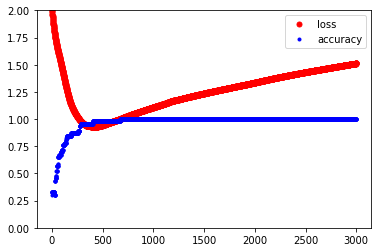

In [22]:
%matplotlib inline 

# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

# y_acc 에 학습 셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=5, label="loss")
plt.plot(x_len, y_acc, "o", c="blue", markersize=3, label="accuracy")
plt.legend()

plt.ylim(0,2)
plt.show()

In [24]:
# class와 음의 상관관계를 가지는 제거한 데이터
data = pd.read_csv('../dataset/zoo.csv', usecols = ["feathers","eggs",
        "airborne","aquatic","venomous","legs","domestic","predator", "fins",  "class_type"])
dataset = data.values
X = dataset[:,0:9]
Y_obj = dataset[:,9]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = tf.keras.utils.to_categorical(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.3)

model = Sequential()
model.add(Dense(32,  input_dim=9, activation='relu'))
model.add(Dense(7, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

# 모델 실행
history = model.fit(X_train, Y_train, validation_split=0.33, epochs=400, batch_size=500)

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Train on 46 samples, validate on 24 samples
Epoch 1/400
46/46 [==============================] - 0s 1ms/step - loss: 2.1074 - accuracy: 0.0652 - val_loss: 2.1216 - val_accuracy: 0.0417
Epoch 2/400
46/46 [==============================] - 0s 44us/step - loss: 2.0847 - accuracy: 0.0652 - val_loss: 2.1013 - val_accuracy: 0.0417
Epoch 3/400
46/46 [==============================] - 0s 43us/step - loss: 2.0623 - accuracy: 0.0652 - val_loss: 2.0812 - val_accuracy: 0.0417
Epoch 4/400
46/46 [==============================] - 0s 43us/step - loss: 2.0402 - accuracy: 0.0652 - val_loss: 2.0613 - val_accuracy: 0.0417
Epoch 5/400
46/46 [==============================] - 0s 43us/step - loss: 2.0185 - accuracy: 0.0652 - val_loss: 2.0417 - val_accuracy: 0.0417
Epoch 6/400
46/46 [==============================] - 0s 43us/step - loss: 1.9971 - accuracy: 0.0652 - val_loss: 2.0225 - val_accuracy: 0.0417
Epoch 7/400
46/46 [==============================] - 0s 43us/step - loss: 1.9761 - accuracy: 0.0652 - val

Epoch 59/400
46/46 [==============================] - 0s 43us/step - loss: 1.2799 - accuracy: 0.7609 - val_loss: 1.3553 - val_accuracy: 0.7083
Epoch 60/400
46/46 [==============================] - 0s 22us/step - loss: 1.2721 - accuracy: 0.7609 - val_loss: 1.3474 - val_accuracy: 0.7083
Epoch 61/400
46/46 [==============================] - 0s 43us/step - loss: 1.2644 - accuracy: 0.7609 - val_loss: 1.3395 - val_accuracy: 0.7083
Epoch 62/400
46/46 [==============================] - 0s 43us/step - loss: 1.2568 - accuracy: 0.7609 - val_loss: 1.3318 - val_accuracy: 0.7083
Epoch 63/400
46/46 [==============================] - 0s 43us/step - loss: 1.2492 - accuracy: 0.7609 - val_loss: 1.3242 - val_accuracy: 0.7083
Epoch 64/400
46/46 [==============================] - 0s 43us/step - loss: 1.2418 - accuracy: 0.7609 - val_loss: 1.3167 - val_accuracy: 0.7083
Epoch 65/400
46/46 [==============================] - 0s 65us/step - loss: 1.2344 - accuracy: 0.7609 - val_loss: 1.3093 - val_accuracy: 0.7083

Epoch 117/400
46/46 [==============================] - 0s 43us/step - loss: 0.9270 - accuracy: 0.8043 - val_loss: 1.0308 - val_accuracy: 0.7500
Epoch 118/400
46/46 [==============================] - 0s 21us/step - loss: 0.9221 - accuracy: 0.8043 - val_loss: 1.0269 - val_accuracy: 0.7500
Epoch 119/400
46/46 [==============================] - 0s 43us/step - loss: 0.9173 - accuracy: 0.8043 - val_loss: 1.0231 - val_accuracy: 0.7500
Epoch 120/400
46/46 [==============================] - 0s 43us/step - loss: 0.9125 - accuracy: 0.8043 - val_loss: 1.0192 - val_accuracy: 0.7500
Epoch 121/400
46/46 [==============================] - 0s 21us/step - loss: 0.9077 - accuracy: 0.8043 - val_loss: 1.0154 - val_accuracy: 0.7500
Epoch 122/400
46/46 [==============================] - 0s 43us/step - loss: 0.9030 - accuracy: 0.8043 - val_loss: 1.0116 - val_accuracy: 0.7500
Epoch 123/400
46/46 [==============================] - 0s 21us/step - loss: 0.8982 - accuracy: 0.8043 - val_loss: 1.0078 - val_accuracy:

Epoch 174/400
46/46 [==============================] - 0s 43us/step - loss: 0.7035 - accuracy: 0.8043 - val_loss: 0.8640 - val_accuracy: 0.7500
Epoch 175/400
46/46 [==============================] - 0s 43us/step - loss: 0.7003 - accuracy: 0.8043 - val_loss: 0.8620 - val_accuracy: 0.7500
Epoch 176/400
46/46 [==============================] - 0s 43us/step - loss: 0.6971 - accuracy: 0.8043 - val_loss: 0.8600 - val_accuracy: 0.7500
Epoch 177/400
46/46 [==============================] - 0s 22us/step - loss: 0.6940 - accuracy: 0.8043 - val_loss: 0.8580 - val_accuracy: 0.7500
Epoch 178/400
46/46 [==============================] - 0s 43us/step - loss: 0.6908 - accuracy: 0.8043 - val_loss: 0.8561 - val_accuracy: 0.7500
Epoch 179/400
46/46 [==============================] - 0s 43us/step - loss: 0.6877 - accuracy: 0.8043 - val_loss: 0.8542 - val_accuracy: 0.7500
Epoch 180/400
46/46 [==============================] - 0s 22us/step - loss: 0.6847 - accuracy: 0.8043 - val_loss: 0.8523 - val_accuracy:

Epoch 231/400
46/46 [==============================] - 0s 43us/step - loss: 0.5518 - accuracy: 0.8261 - val_loss: 0.7736 - val_accuracy: 0.7917
Epoch 232/400
46/46 [==============================] - 0s 43us/step - loss: 0.5496 - accuracy: 0.8261 - val_loss: 0.7723 - val_accuracy: 0.7917
Epoch 233/400
46/46 [==============================] - 0s 43us/step - loss: 0.5474 - accuracy: 0.8261 - val_loss: 0.7710 - val_accuracy: 0.7917
Epoch 234/400
46/46 [==============================] - 0s 22us/step - loss: 0.5451 - accuracy: 0.8261 - val_loss: 0.7697 - val_accuracy: 0.7917
Epoch 235/400
46/46 [==============================] - 0s 43us/step - loss: 0.5429 - accuracy: 0.8696 - val_loss: 0.7684 - val_accuracy: 0.7917
Epoch 236/400
46/46 [==============================] - 0s 43us/step - loss: 0.5408 - accuracy: 0.8696 - val_loss: 0.7671 - val_accuracy: 0.7917
Epoch 237/400
46/46 [==============================] - 0s 43us/step - loss: 0.5386 - accuracy: 0.8696 - val_loss: 0.7658 - val_accuracy:

Epoch 288/400
46/46 [==============================] - 0s 22us/step - loss: 0.4381 - accuracy: 0.8696 - val_loss: 0.7103 - val_accuracy: 0.7917
Epoch 289/400
46/46 [==============================] - 0s 43us/step - loss: 0.4363 - accuracy: 0.8696 - val_loss: 0.7094 - val_accuracy: 0.7917
Epoch 290/400
46/46 [==============================] - 0s 22us/step - loss: 0.4346 - accuracy: 0.8696 - val_loss: 0.7085 - val_accuracy: 0.7917
Epoch 291/400
46/46 [==============================] - 0s 43us/step - loss: 0.4328 - accuracy: 0.8696 - val_loss: 0.7076 - val_accuracy: 0.7917
Epoch 292/400
46/46 [==============================] - 0s 43us/step - loss: 0.4311 - accuracy: 0.8696 - val_loss: 0.7068 - val_accuracy: 0.7917
Epoch 293/400
46/46 [==============================] - 0s 43us/step - loss: 0.4293 - accuracy: 0.8696 - val_loss: 0.7060 - val_accuracy: 0.7917
Epoch 294/400
46/46 [==============================] - 0s 43us/step - loss: 0.4276 - accuracy: 0.8696 - val_loss: 0.7052 - val_accuracy:

Epoch 345/400
46/46 [==============================] - 0s 43us/step - loss: 0.3390 - accuracy: 0.9130 - val_loss: 0.6657 - val_accuracy: 0.7917
Epoch 346/400
46/46 [==============================] - 0s 43us/step - loss: 0.3375 - accuracy: 0.9348 - val_loss: 0.6649 - val_accuracy: 0.7917
Epoch 347/400
46/46 [==============================] - 0s 43us/step - loss: 0.3361 - accuracy: 0.9348 - val_loss: 0.6642 - val_accuracy: 0.7917
Epoch 348/400
46/46 [==============================] - 0s 22us/step - loss: 0.3346 - accuracy: 0.9348 - val_loss: 0.6634 - val_accuracy: 0.7917
Epoch 349/400
46/46 [==============================] - 0s 43us/step - loss: 0.3331 - accuracy: 0.9348 - val_loss: 0.6627 - val_accuracy: 0.7917
Epoch 350/400
46/46 [==============================] - 0s 43us/step - loss: 0.3317 - accuracy: 0.9348 - val_loss: 0.6620 - val_accuracy: 0.7917
Epoch 351/400
46/46 [==============================] - 0s 43us/step - loss: 0.3302 - accuracy: 0.9348 - val_loss: 0.6612 - val_accuracy:

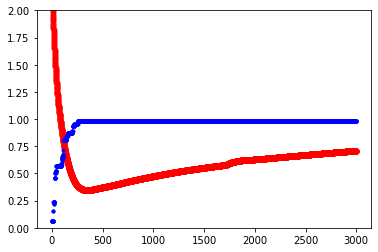

In [10]:
%matplotlib inline 

# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

# y_acc 에 학습 셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=5, label="loss")
plt.plot(x_len, y_acc, "o", c="blue", markersize=3, label="accuracy")

plt.ylim(0,2)
plt.show()

In [224]:
model.fit(X_train, Y_train, epochs=300, batch_size=500)
# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Epoch 1/300
70/70 [==============================] - 0s 38us/step - loss: 0.4822 - accuracy: 0.9429
Epoch 2/300
70/70 [==============================] - 0s 14us/step - loss: 0.4700 - accuracy: 0.9429
Epoch 3/300
70/70 [==============================] - 0s 28us/step - loss: 0.4507 - accuracy: 0.9429
Epoch 4/300
70/70 [==============================] - 0s 14us/step - loss: 0.4265 - accuracy: 0.9429
Epoch 5/300
70/70 [==============================] - 0s 28us/step - loss: 0.3989 - accuracy: 0.9429
Epoch 6/300
70/70 [==============================] - 0s 14us/step - loss: 0.3691 - accuracy: 0.9429
Epoch 7/300
70/70 [==============================] - 0s 14us/step - loss: 0.3378 - accuracy: 0.9429
Epoch 8/300
70/70 [==============================] - 0s 14us/step - loss: 0.3062 - accuracy: 0.9429
Epoch 9/300
70/70 [==============================] - 0s 28us/step - loss: 0.2754 - accuracy: 0.9429
Epoch 10/300
70/70 [==============================] - 0s 14us/step - loss: 0.2471 - accuracy: 0.9429

Epoch 83/300
70/70 [==============================] - 0s 14us/step - loss: 0.0152 - accuracy: 1.0000
Epoch 84/300
70/70 [==============================] - 0s 14us/step - loss: 0.0151 - accuracy: 1.0000
Epoch 85/300
70/70 [==============================] - 0s 14us/step - loss: 0.0149 - accuracy: 1.0000
Epoch 86/300
70/70 [==============================] - 0s 14us/step - loss: 0.0147 - accuracy: 1.0000
Epoch 87/300
70/70 [==============================] - 0s 14us/step - loss: 0.0145 - accuracy: 1.0000
Epoch 88/300
70/70 [==============================] - 0s 0us/step - loss: 0.0144 - accuracy: 1.0000
Epoch 89/300
70/70 [==============================] - 0s 14us/step - loss: 0.0142 - accuracy: 1.0000
Epoch 90/300
70/70 [==============================] - 0s 15us/step - loss: 0.0141 - accuracy: 1.0000
Epoch 91/300
70/70 [==============================] - 0s 14us/step - loss: 0.0139 - accuracy: 1.0000
Epoch 92/300
70/70 [==============================] - 0s 28us/step - loss: 0.0138 - accuracy

Epoch 164/300
70/70 [==============================] - 0s 14us/step - loss: 0.0079 - accuracy: 1.0000
Epoch 165/300
70/70 [==============================] - 0s 14us/step - loss: 0.0079 - accuracy: 1.0000
Epoch 166/300
70/70 [==============================] - 0s 28us/step - loss: 0.0078 - accuracy: 1.0000
Epoch 167/300
70/70 [==============================] - 0s 14us/step - loss: 0.0078 - accuracy: 1.0000
Epoch 168/300
70/70 [==============================] - 0s 14us/step - loss: 0.0078 - accuracy: 1.0000
Epoch 169/300
70/70 [==============================] - 0s 14us/step - loss: 0.0077 - accuracy: 1.0000
Epoch 170/300
70/70 [==============================] - 0s 14us/step - loss: 0.0077 - accuracy: 1.0000
Epoch 171/300
70/70 [==============================] - 0s 0us/step - loss: 0.0076 - accuracy: 1.0000
Epoch 172/300
70/70 [==============================] - 0s 0us/step - loss: 0.0076 - accuracy: 1.0000
Epoch 173/300
70/70 [==============================] - 0s 14us/step - loss: 0.0075 -

Epoch 245/300
70/70 [==============================] - 0s 14us/step - loss: 0.0053 - accuracy: 1.0000
Epoch 246/300
70/70 [==============================] - 0s 0us/step - loss: 0.0053 - accuracy: 1.0000
Epoch 247/300
70/70 [==============================] - 0s 14us/step - loss: 0.0053 - accuracy: 1.0000
Epoch 248/300
70/70 [==============================] - 0s 14us/step - loss: 0.0053 - accuracy: 1.0000
Epoch 249/300
70/70 [==============================] - 0s 14us/step - loss: 0.0053 - accuracy: 1.0000
Epoch 250/300
70/70 [==============================] - 0s 14us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 251/300
70/70 [==============================] - 0s 28us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 252/300
70/70 [==============================] - 0s 14us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 253/300
70/70 [==============================] - 0s 29us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 254/300
70/70 [==============================] - 0s 14us/step - loss: 0.0052 

In [225]:
# class와 양의 상관관계를 가지는 칼럼
data = pd.read_csv('../dataset/zoo.csv', usecols = ["eggs","airborne","aquatic","fins",
                                                    "venomous","legs","class_type"])
dataset = data.values
X = dataset[:,0:6]
Y_obj = dataset[:,6]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = tf.keras.utils.to_categorical(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.3)

model = Sequential()
model.add(Dense(32,  input_dim=6, activation='relu'))
model.add(Dense(7, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

# 모델 실행
history = model.fit(X_train, Y_train, validation_split=0.33, epochs=3000, batch_size=500)

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Train on 46 samples, validate on 24 samples
Epoch 1/3000
46/46 [==============================] - 0s 2ms/step - loss: 2.2075 - accuracy: 0.1957 - val_loss: 2.3924 - val_accuracy: 0.0833
Epoch 2/3000
46/46 [==============================] - 0s 43us/step - loss: 2.1854 - accuracy: 0.1957 - val_loss: 2.3673 - val_accuracy: 0.0833
Epoch 3/3000
46/46 [==============================] - 0s 43us/step - loss: 2.1635 - accuracy: 0.1957 - val_loss: 2.3447 - val_accuracy: 0.0833
Epoch 4/3000
46/46 [==============================] - 0s 43us/step - loss: 2.1439 - accuracy: 0.1957 - val_loss: 2.3216 - val_accuracy: 0.0833
Epoch 5/3000
46/46 [==============================] - 0s 43us/step - loss: 2.1239 - accuracy: 0.1957 - val_loss: 2.2982 - val_accuracy: 0.0833
Epoch 6/3000
46/46 [==============================] - 0s 44us/step - loss: 2.1037 - accuracy: 0.1957 - val_loss: 2.2741 - val_accuracy: 0.0833
Epoch 7/3000
46/46 [==============================] - 0s 43us/step - loss: 2.0829 - accuracy: 0.195

Epoch 58/3000
46/46 [==============================] - 0s 65us/step - loss: 1.4302 - accuracy: 0.6522 - val_loss: 1.4993 - val_accuracy: 0.7083
Epoch 59/3000
46/46 [==============================] - 0s 43us/step - loss: 1.4238 - accuracy: 0.6522 - val_loss: 1.4929 - val_accuracy: 0.7083
Epoch 60/3000
46/46 [==============================] - 0s 43us/step - loss: 1.4175 - accuracy: 0.6522 - val_loss: 1.4866 - val_accuracy: 0.7083
Epoch 61/3000
46/46 [==============================] - 0s 65us/step - loss: 1.4113 - accuracy: 0.6522 - val_loss: 1.4805 - val_accuracy: 0.7083
Epoch 62/3000
46/46 [==============================] - 0s 65us/step - loss: 1.4051 - accuracy: 0.6522 - val_loss: 1.4746 - val_accuracy: 0.7083
Epoch 63/3000
46/46 [==============================] - 0s 43us/step - loss: 1.3990 - accuracy: 0.6522 - val_loss: 1.4688 - val_accuracy: 0.7083
Epoch 64/3000
46/46 [==============================] - 0s 43us/step - loss: 1.3930 - accuracy: 0.6739 - val_loss: 1.4631 - val_accuracy:

Epoch 115/3000
46/46 [==============================] - 0s 22us/step - loss: 1.1285 - accuracy: 0.7174 - val_loss: 1.2623 - val_accuracy: 0.6667
Epoch 116/3000
46/46 [==============================] - 0s 44us/step - loss: 1.1239 - accuracy: 0.7174 - val_loss: 1.2592 - val_accuracy: 0.6667
Epoch 117/3000
46/46 [==============================] - 0s 43us/step - loss: 1.1193 - accuracy: 0.7174 - val_loss: 1.2561 - val_accuracy: 0.6667
Epoch 118/3000
46/46 [==============================] - 0s 43us/step - loss: 1.1148 - accuracy: 0.7174 - val_loss: 1.2529 - val_accuracy: 0.6667
Epoch 119/3000
46/46 [==============================] - 0s 44us/step - loss: 1.1102 - accuracy: 0.7174 - val_loss: 1.2498 - val_accuracy: 0.6667
Epoch 120/3000
46/46 [==============================] - 0s 43us/step - loss: 1.1056 - accuracy: 0.7174 - val_loss: 1.2466 - val_accuracy: 0.6667
Epoch 121/3000
46/46 [==============================] - 0s 43us/step - loss: 1.1011 - accuracy: 0.7174 - val_loss: 1.2435 - val_ac

Epoch 172/3000
46/46 [==============================] - 0s 43us/step - loss: 0.8774 - accuracy: 0.8261 - val_loss: 1.0880 - val_accuracy: 0.7083
Epoch 173/3000
46/46 [==============================] - 0s 22us/step - loss: 0.8732 - accuracy: 0.8261 - val_loss: 1.0850 - val_accuracy: 0.7083
Epoch 174/3000
46/46 [==============================] - 0s 43us/step - loss: 0.8690 - accuracy: 0.8261 - val_loss: 1.0820 - val_accuracy: 0.7083
Epoch 175/3000
46/46 [==============================] - 0s 21us/step - loss: 0.8648 - accuracy: 0.8261 - val_loss: 1.0791 - val_accuracy: 0.7083
Epoch 176/3000
46/46 [==============================] - 0s 43us/step - loss: 0.8605 - accuracy: 0.8261 - val_loss: 1.0763 - val_accuracy: 0.7083
Epoch 177/3000
46/46 [==============================] - 0s 43us/step - loss: 0.8563 - accuracy: 0.8261 - val_loss: 1.0734 - val_accuracy: 0.7083
Epoch 178/3000
46/46 [==============================] - 0s 30us/step - loss: 0.8521 - accuracy: 0.8261 - val_loss: 1.0700 - val_ac

Epoch 229/3000
46/46 [==============================] - 0s 21us/step - loss: 0.6527 - accuracy: 0.8261 - val_loss: 0.9428 - val_accuracy: 0.7083
Epoch 230/3000
46/46 [==============================] - 0s 43us/step - loss: 0.6496 - accuracy: 0.8261 - val_loss: 0.9412 - val_accuracy: 0.7083
Epoch 231/3000
46/46 [==============================] - 0s 43us/step - loss: 0.6465 - accuracy: 0.8261 - val_loss: 0.9396 - val_accuracy: 0.7083
Epoch 232/3000
46/46 [==============================] - 0s 43us/step - loss: 0.6434 - accuracy: 0.8261 - val_loss: 0.9380 - val_accuracy: 0.7083
Epoch 233/3000
46/46 [==============================] - 0s 43us/step - loss: 0.6404 - accuracy: 0.8261 - val_loss: 0.9364 - val_accuracy: 0.7083
Epoch 234/3000
46/46 [==============================] - 0s 22us/step - loss: 0.6374 - accuracy: 0.8261 - val_loss: 0.9349 - val_accuracy: 0.7083
Epoch 235/3000
46/46 [==============================] - 0s 43us/step - loss: 0.6344 - accuracy: 0.8261 - val_loss: 0.9334 - val_ac

Epoch 286/3000
46/46 [==============================] - 0s 44us/step - loss: 0.5055 - accuracy: 0.8478 - val_loss: 0.8793 - val_accuracy: 0.7083
Epoch 287/3000
46/46 [==============================] - 0s 22us/step - loss: 0.5034 - accuracy: 0.8478 - val_loss: 0.8786 - val_accuracy: 0.7083
Epoch 288/3000
46/46 [==============================] - 0s 44us/step - loss: 0.5013 - accuracy: 0.8478 - val_loss: 0.8779 - val_accuracy: 0.7500
Epoch 289/3000
46/46 [==============================] - 0s 43us/step - loss: 0.4992 - accuracy: 0.8696 - val_loss: 0.8773 - val_accuracy: 0.7500
Epoch 290/3000
46/46 [==============================] - 0s 43us/step - loss: 0.4972 - accuracy: 0.8696 - val_loss: 0.8766 - val_accuracy: 0.7500
Epoch 291/3000
46/46 [==============================] - 0s 44us/step - loss: 0.4951 - accuracy: 0.8696 - val_loss: 0.8759 - val_accuracy: 0.7500
Epoch 292/3000
46/46 [==============================] - 0s 21us/step - loss: 0.4930 - accuracy: 0.8696 - val_loss: 0.8752 - val_ac

Epoch 343/3000
46/46 [==============================] - 0s 43us/step - loss: 0.4047 - accuracy: 0.9130 - val_loss: 0.8568 - val_accuracy: 0.7917
Epoch 344/3000
46/46 [==============================] - 0s 43us/step - loss: 0.4032 - accuracy: 0.9130 - val_loss: 0.8567 - val_accuracy: 0.7917
Epoch 345/3000
46/46 [==============================] - 0s 43us/step - loss: 0.4018 - accuracy: 0.9130 - val_loss: 0.8567 - val_accuracy: 0.7917
Epoch 346/3000
46/46 [==============================] - 0s 22us/step - loss: 0.4003 - accuracy: 0.9130 - val_loss: 0.8566 - val_accuracy: 0.7917
Epoch 347/3000
46/46 [==============================] - 0s 65us/step - loss: 0.3989 - accuracy: 0.9130 - val_loss: 0.8565 - val_accuracy: 0.7917
Epoch 348/3000
46/46 [==============================] - 0s 43us/step - loss: 0.3974 - accuracy: 0.9130 - val_loss: 0.8565 - val_accuracy: 0.7917
Epoch 349/3000
46/46 [==============================] - 0s 65us/step - loss: 0.3960 - accuracy: 0.9130 - val_loss: 0.8564 - val_ac

Epoch 400/3000
46/46 [==============================] - 0s 43us/step - loss: 0.3248 - accuracy: 0.9130 - val_loss: 0.8465 - val_accuracy: 0.8333
Epoch 401/3000
46/46 [==============================] - 0s 43us/step - loss: 0.3231 - accuracy: 0.9130 - val_loss: 0.8460 - val_accuracy: 0.8333
Epoch 402/3000
46/46 [==============================] - 0s 43us/step - loss: 0.3215 - accuracy: 0.9130 - val_loss: 0.8456 - val_accuracy: 0.8333
Epoch 403/3000
46/46 [==============================] - 0s 43us/step - loss: 0.3198 - accuracy: 0.9130 - val_loss: 0.8451 - val_accuracy: 0.8333
Epoch 404/3000
46/46 [==============================] - 0s 43us/step - loss: 0.3183 - accuracy: 0.9348 - val_loss: 0.8448 - val_accuracy: 0.8333
Epoch 405/3000
46/46 [==============================] - 0s 43us/step - loss: 0.3167 - accuracy: 0.9348 - val_loss: 0.8445 - val_accuracy: 0.8333
Epoch 406/3000
46/46 [==============================] - 0s 43us/step - loss: 0.3153 - accuracy: 0.9348 - val_loss: 0.8444 - val_ac

Epoch 457/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2623 - accuracy: 0.9565 - val_loss: 0.8508 - val_accuracy: 0.8333
Epoch 458/3000
46/46 [==============================] - 0s 21us/step - loss: 0.2614 - accuracy: 0.9565 - val_loss: 0.8510 - val_accuracy: 0.8333
Epoch 459/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2605 - accuracy: 0.9565 - val_loss: 0.8511 - val_accuracy: 0.8333
Epoch 460/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2596 - accuracy: 0.9565 - val_loss: 0.8513 - val_accuracy: 0.8333
Epoch 461/3000
46/46 [==============================] - 0s 21us/step - loss: 0.2588 - accuracy: 0.9565 - val_loss: 0.8514 - val_accuracy: 0.8333
Epoch 462/3000
46/46 [==============================] - 0s 44us/step - loss: 0.2579 - accuracy: 0.9565 - val_loss: 0.8516 - val_accuracy: 0.8333
Epoch 463/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2571 - accuracy: 0.9565 - val_loss: 0.8518 - val_ac

Epoch 514/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2209 - accuracy: 0.9565 - val_loss: 0.8616 - val_accuracy: 0.8333
Epoch 515/3000
46/46 [==============================] - 0s 22us/step - loss: 0.2203 - accuracy: 0.9565 - val_loss: 0.8618 - val_accuracy: 0.8333
Epoch 516/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2197 - accuracy: 0.9565 - val_loss: 0.8619 - val_accuracy: 0.8333
Epoch 517/3000
46/46 [==============================] - 0s 22us/step - loss: 0.2191 - accuracy: 0.9565 - val_loss: 0.8621 - val_accuracy: 0.8333
Epoch 518/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2185 - accuracy: 0.9565 - val_loss: 0.8623 - val_accuracy: 0.8333
Epoch 519/3000
46/46 [==============================] - 0s 44us/step - loss: 0.2180 - accuracy: 0.9565 - val_loss: 0.8625 - val_accuracy: 0.8333
Epoch 520/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2174 - accuracy: 0.9565 - val_loss: 0.8627 - val_ac

Epoch 571/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1917 - accuracy: 0.9565 - val_loss: 0.8780 - val_accuracy: 0.8333
Epoch 572/3000
46/46 [==============================] - 0s 44us/step - loss: 0.1912 - accuracy: 0.9565 - val_loss: 0.8783 - val_accuracy: 0.8333
Epoch 573/3000
46/46 [==============================] - 0s 22us/step - loss: 0.1908 - accuracy: 0.9565 - val_loss: 0.8787 - val_accuracy: 0.8333
Epoch 574/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1904 - accuracy: 0.9565 - val_loss: 0.8790 - val_accuracy: 0.8333
Epoch 575/3000
46/46 [==============================] - 0s 22us/step - loss: 0.1899 - accuracy: 0.9565 - val_loss: 0.8794 - val_accuracy: 0.8333
Epoch 576/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1895 - accuracy: 0.9565 - val_loss: 0.8798 - val_accuracy: 0.8333
Epoch 577/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1891 - accuracy: 0.9565 - val_loss: 0.8802 - val_ac

Epoch 628/3000
46/46 [==============================] - 0s 44us/step - loss: 0.1695 - accuracy: 0.9783 - val_loss: 0.9037 - val_accuracy: 0.8750
Epoch 629/3000
46/46 [==============================] - 0s 44us/step - loss: 0.1691 - accuracy: 0.9783 - val_loss: 0.9042 - val_accuracy: 0.8750
Epoch 630/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1688 - accuracy: 0.9783 - val_loss: 0.9047 - val_accuracy: 0.8750
Epoch 631/3000
46/46 [==============================] - 0s 21us/step - loss: 0.1685 - accuracy: 0.9783 - val_loss: 0.9052 - val_accuracy: 0.8750
Epoch 632/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1681 - accuracy: 0.9783 - val_loss: 0.9056 - val_accuracy: 0.8750
Epoch 633/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1678 - accuracy: 0.9783 - val_loss: 0.9061 - val_accuracy: 0.8750
Epoch 634/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1674 - accuracy: 0.9783 - val_loss: 0.9066 - val_ac

Epoch 685/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1525 - accuracy: 0.9783 - val_loss: 0.9332 - val_accuracy: 0.8750
Epoch 686/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1522 - accuracy: 0.9783 - val_loss: 0.9337 - val_accuracy: 0.8750
Epoch 687/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1519 - accuracy: 0.9783 - val_loss: 0.9343 - val_accuracy: 0.8750
Epoch 688/3000
46/46 [==============================] - 0s 22us/step - loss: 0.1517 - accuracy: 0.9783 - val_loss: 0.9348 - val_accuracy: 0.8750
Epoch 689/3000
46/46 [==============================] - 0s 44us/step - loss: 0.1514 - accuracy: 0.9783 - val_loss: 0.9354 - val_accuracy: 0.8750
Epoch 690/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1512 - accuracy: 0.9783 - val_loss: 0.9359 - val_accuracy: 0.8750
Epoch 691/3000
46/46 [==============================] - 0s 44us/step - loss: 0.1509 - accuracy: 0.9783 - val_loss: 0.9365 - val_ac

Epoch 742/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1389 - accuracy: 0.9783 - val_loss: 0.9660 - val_accuracy: 0.8750
Epoch 743/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1387 - accuracy: 0.9783 - val_loss: 0.9666 - val_accuracy: 0.8750
Epoch 744/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1385 - accuracy: 0.9783 - val_loss: 0.9672 - val_accuracy: 0.8750
Epoch 745/3000
46/46 [==============================] - 0s 22us/step - loss: 0.1383 - accuracy: 0.9783 - val_loss: 0.9678 - val_accuracy: 0.8750
Epoch 746/3000
46/46 [==============================] - 0s 44us/step - loss: 0.1381 - accuracy: 0.9783 - val_loss: 0.9684 - val_accuracy: 0.8750
Epoch 747/3000
46/46 [==============================] - 0s 21us/step - loss: 0.1379 - accuracy: 0.9783 - val_loss: 0.9690 - val_accuracy: 0.8750
Epoch 748/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1377 - accuracy: 0.9783 - val_loss: 0.9695 - val_ac

Epoch 799/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1278 - accuracy: 0.9783 - val_loss: 1.0007 - val_accuracy: 0.8750
Epoch 800/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1277 - accuracy: 0.9783 - val_loss: 1.0013 - val_accuracy: 0.8750
Epoch 801/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1275 - accuracy: 0.9783 - val_loss: 1.0019 - val_accuracy: 0.8750
Epoch 802/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1273 - accuracy: 0.9783 - val_loss: 1.0025 - val_accuracy: 0.8750
Epoch 803/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1271 - accuracy: 0.9783 - val_loss: 1.0031 - val_accuracy: 0.8750
Epoch 804/3000
46/46 [==============================] - 0s 22us/step - loss: 0.1270 - accuracy: 0.9783 - val_loss: 1.0037 - val_accuracy: 0.8750
Epoch 805/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1268 - accuracy: 0.9783 - val_loss: 1.0043 - val_ac

Epoch 856/3000
46/46 [==============================] - 0s 44us/step - loss: 0.1186 - accuracy: 0.9783 - val_loss: 1.0365 - val_accuracy: 0.9167
Epoch 857/3000
46/46 [==============================] - 0s 21us/step - loss: 0.1184 - accuracy: 0.9783 - val_loss: 1.0372 - val_accuracy: 0.9167
Epoch 858/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1183 - accuracy: 0.9783 - val_loss: 1.0380 - val_accuracy: 0.9167
Epoch 859/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1181 - accuracy: 0.9783 - val_loss: 1.0387 - val_accuracy: 0.9167
Epoch 860/3000
46/46 [==============================] - 0s 44us/step - loss: 0.1180 - accuracy: 0.9783 - val_loss: 1.0393 - val_accuracy: 0.9167
Epoch 861/3000
46/46 [==============================] - 0s 44us/step - loss: 0.1178 - accuracy: 0.9783 - val_loss: 1.0399 - val_accuracy: 0.9167
Epoch 862/3000
46/46 [==============================] - 0s 21us/step - loss: 0.1177 - accuracy: 0.9783 - val_loss: 1.0405 - val_ac

Epoch 913/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1107 - accuracy: 0.9783 - val_loss: 1.0747 - val_accuracy: 0.9167
Epoch 914/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1105 - accuracy: 0.9783 - val_loss: 1.0753 - val_accuracy: 0.9167
Epoch 915/3000
46/46 [==============================] - 0s 22us/step - loss: 0.1104 - accuracy: 0.9783 - val_loss: 1.0760 - val_accuracy: 0.9167
Epoch 916/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1103 - accuracy: 0.9783 - val_loss: 1.0767 - val_accuracy: 0.9167
Epoch 917/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1101 - accuracy: 0.9783 - val_loss: 1.0773 - val_accuracy: 0.9167
Epoch 918/3000
46/46 [==============================] - 0s 65us/step - loss: 0.1100 - accuracy: 0.9783 - val_loss: 1.0780 - val_accuracy: 0.9167
Epoch 919/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1099 - accuracy: 0.9783 - val_loss: 1.0787 - val_ac

Epoch 970/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1038 - accuracy: 0.9783 - val_loss: 1.1136 - val_accuracy: 0.9167
Epoch 971/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1037 - accuracy: 0.9783 - val_loss: 1.1143 - val_accuracy: 0.9167
Epoch 972/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1036 - accuracy: 0.9783 - val_loss: 1.1150 - val_accuracy: 0.9167
Epoch 973/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1035 - accuracy: 0.9783 - val_loss: 1.1157 - val_accuracy: 0.9167
Epoch 974/3000
46/46 [==============================] - 0s 44us/step - loss: 0.1034 - accuracy: 0.9783 - val_loss: 1.1164 - val_accuracy: 0.9167
Epoch 975/3000
46/46 [==============================] - 0s 65us/step - loss: 0.1033 - accuracy: 0.9783 - val_loss: 1.1171 - val_accuracy: 0.9167
Epoch 976/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1032 - accuracy: 0.9783 - val_loss: 1.1178 - val_ac

Epoch 1027/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0979 - accuracy: 0.9783 - val_loss: 1.1537 - val_accuracy: 0.9167
Epoch 1028/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0978 - accuracy: 0.9783 - val_loss: 1.1544 - val_accuracy: 0.9167
Epoch 1029/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0977 - accuracy: 0.9783 - val_loss: 1.1551 - val_accuracy: 0.9167
Epoch 1030/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0976 - accuracy: 0.9783 - val_loss: 1.1559 - val_accuracy: 0.9167
Epoch 1031/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0975 - accuracy: 0.9783 - val_loss: 1.1566 - val_accuracy: 0.9167
Epoch 1032/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0974 - accuracy: 0.9783 - val_loss: 1.1573 - val_accuracy: 0.9167
Epoch 1033/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0973 - accuracy: 0.9783 - val_loss: 1.1581 -

Epoch 1084/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0927 - accuracy: 0.9783 - val_loss: 1.1949 - val_accuracy: 0.9167
Epoch 1085/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0926 - accuracy: 0.9783 - val_loss: 1.1957 - val_accuracy: 0.9167
Epoch 1086/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0925 - accuracy: 0.9783 - val_loss: 1.1964 - val_accuracy: 0.9167
Epoch 1087/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0924 - accuracy: 0.9783 - val_loss: 1.1971 - val_accuracy: 0.9167
Epoch 1088/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0923 - accuracy: 0.9783 - val_loss: 1.1979 - val_accuracy: 0.9167
Epoch 1089/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0923 - accuracy: 0.9783 - val_loss: 1.1986 - val_accuracy: 0.9167
Epoch 1090/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0922 - accuracy: 0.9783 - val_loss: 1.1993 -

Epoch 1141/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0881 - accuracy: 0.9783 - val_loss: 1.2368 - val_accuracy: 0.9167
Epoch 1142/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0880 - accuracy: 0.9783 - val_loss: 1.2375 - val_accuracy: 0.9167
Epoch 1143/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0879 - accuracy: 0.9783 - val_loss: 1.2382 - val_accuracy: 0.9167
Epoch 1144/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0878 - accuracy: 0.9783 - val_loss: 1.2389 - val_accuracy: 0.9167
Epoch 1145/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0878 - accuracy: 0.9783 - val_loss: 1.2397 - val_accuracy: 0.9167
Epoch 1146/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0877 - accuracy: 0.9783 - val_loss: 1.2404 - val_accuracy: 0.9167
Epoch 1147/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0876 - accuracy: 0.9783 - val_loss: 1.2412 -

Epoch 1198/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0840 - accuracy: 0.9783 - val_loss: 1.2791 - val_accuracy: 0.9167
Epoch 1199/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0839 - accuracy: 0.9783 - val_loss: 1.2798 - val_accuracy: 0.9167
Epoch 1200/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0839 - accuracy: 0.9783 - val_loss: 1.2806 - val_accuracy: 0.9167
Epoch 1201/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0838 - accuracy: 0.9783 - val_loss: 1.2813 - val_accuracy: 0.9167
Epoch 1202/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0837 - accuracy: 0.9783 - val_loss: 1.2821 - val_accuracy: 0.9167
Epoch 1203/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0837 - accuracy: 0.9783 - val_loss: 1.2828 - val_accuracy: 0.9167
Epoch 1204/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0836 - accuracy: 0.9783 - val_loss: 1.2835 -

Epoch 1255/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0804 - accuracy: 0.9783 - val_loss: 1.3214 - val_accuracy: 0.9167
Epoch 1256/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0803 - accuracy: 0.9783 - val_loss: 1.3222 - val_accuracy: 0.9167
Epoch 1257/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0803 - accuracy: 0.9783 - val_loss: 1.3229 - val_accuracy: 0.9167
Epoch 1258/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0802 - accuracy: 0.9783 - val_loss: 1.3236 - val_accuracy: 0.9167
Epoch 1259/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0801 - accuracy: 0.9783 - val_loss: 1.3244 - val_accuracy: 0.9167
Epoch 1260/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0801 - accuracy: 0.9783 - val_loss: 1.3252 - val_accuracy: 0.9167
Epoch 1261/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0800 - accuracy: 0.9783 - val_loss: 1.3259 -

Epoch 1312/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0771 - accuracy: 0.9783 - val_loss: 1.3642 - val_accuracy: 0.9167
Epoch 1313/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0771 - accuracy: 0.9783 - val_loss: 1.3650 - val_accuracy: 0.9167
Epoch 1314/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0770 - accuracy: 0.9783 - val_loss: 1.3657 - val_accuracy: 0.9167
Epoch 1315/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0770 - accuracy: 0.9783 - val_loss: 1.3664 - val_accuracy: 0.9167
Epoch 1316/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0769 - accuracy: 0.9783 - val_loss: 1.3671 - val_accuracy: 0.9167
Epoch 1317/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0769 - accuracy: 0.9783 - val_loss: 1.3679 - val_accuracy: 0.9167
Epoch 1318/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0768 - accuracy: 0.9783 - val_loss: 1.3686 -

Epoch 1369/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0742 - accuracy: 0.9783 - val_loss: 1.4073 - val_accuracy: 0.9167
Epoch 1370/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0741 - accuracy: 0.9783 - val_loss: 1.4081 - val_accuracy: 0.9167
Epoch 1371/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0741 - accuracy: 0.9783 - val_loss: 1.4089 - val_accuracy: 0.9167
Epoch 1372/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0740 - accuracy: 0.9783 - val_loss: 1.4096 - val_accuracy: 0.9167
Epoch 1373/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0740 - accuracy: 0.9783 - val_loss: 1.4104 - val_accuracy: 0.9167
Epoch 1374/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0739 - accuracy: 0.9783 - val_loss: 1.4112 - val_accuracy: 0.9167
Epoch 1375/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0739 - accuracy: 0.9783 - val_loss: 1.4119 -

46/46 [==============================] - 0s 43us/step - loss: 0.0716 - accuracy: 0.9783 - val_loss: 1.4502 - val_accuracy: 0.9167
Epoch 1426/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0715 - accuracy: 0.9783 - val_loss: 1.4509 - val_accuracy: 0.9167
Epoch 1427/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0715 - accuracy: 0.9783 - val_loss: 1.4517 - val_accuracy: 0.9167
Epoch 1428/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0714 - accuracy: 0.9783 - val_loss: 1.4525 - val_accuracy: 0.9167
Epoch 1429/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0714 - accuracy: 0.9783 - val_loss: 1.4532 - val_accuracy: 0.9167
Epoch 1430/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0713 - accuracy: 0.9783 - val_loss: 1.4540 - val_accuracy: 0.9167
Epoch 1431/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0713 - accuracy: 0.9783 - val_loss: 1.4547 - val_accuracy: 0

Epoch 1482/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0691 - accuracy: 0.9783 - val_loss: 1.4938 - val_accuracy: 0.9167
Epoch 1483/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0691 - accuracy: 0.9783 - val_loss: 1.4946 - val_accuracy: 0.9167
Epoch 1484/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0690 - accuracy: 0.9783 - val_loss: 1.4954 - val_accuracy: 0.9167
Epoch 1485/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0690 - accuracy: 0.9783 - val_loss: 1.4962 - val_accuracy: 0.9167
Epoch 1486/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0690 - accuracy: 0.9783 - val_loss: 1.4969 - val_accuracy: 0.9167
Epoch 1487/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0689 - accuracy: 0.9783 - val_loss: 1.4977 - val_accuracy: 0.9167
Epoch 1488/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0689 - accuracy: 0.9783 - val_loss: 1.4985 -

Epoch 1539/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0669 - accuracy: 0.9783 - val_loss: 1.5376 - val_accuracy: 0.9167
Epoch 1540/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0669 - accuracy: 0.9783 - val_loss: 1.5384 - val_accuracy: 0.9167
Epoch 1541/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0668 - accuracy: 0.9783 - val_loss: 1.5391 - val_accuracy: 0.9167
Epoch 1542/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0668 - accuracy: 0.9783 - val_loss: 1.5399 - val_accuracy: 0.9167
Epoch 1543/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0668 - accuracy: 0.9783 - val_loss: 1.5406 - val_accuracy: 0.9167
Epoch 1544/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0667 - accuracy: 0.9783 - val_loss: 1.5414 - val_accuracy: 0.9167
Epoch 1545/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0667 - accuracy: 0.9783 - val_loss: 1.5422 -

Epoch 1596/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0649 - accuracy: 0.9783 - val_loss: 1.5812 - val_accuracy: 0.9167
Epoch 1597/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0648 - accuracy: 0.9783 - val_loss: 1.5819 - val_accuracy: 0.9167
Epoch 1598/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0648 - accuracy: 0.9783 - val_loss: 1.5827 - val_accuracy: 0.9167
Epoch 1599/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0648 - accuracy: 0.9783 - val_loss: 1.5835 - val_accuracy: 0.9167
Epoch 1600/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0647 - accuracy: 0.9783 - val_loss: 1.5842 - val_accuracy: 0.9167
Epoch 1601/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0647 - accuracy: 0.9783 - val_loss: 1.5850 - val_accuracy: 0.9167
Epoch 1602/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0647 - accuracy: 0.9783 - val_loss: 1.5858 -

Epoch 1653/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0630 - accuracy: 0.9783 - val_loss: 1.6246 - val_accuracy: 0.9167
Epoch 1654/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0630 - accuracy: 0.9783 - val_loss: 1.6253 - val_accuracy: 0.9167
Epoch 1655/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0630 - accuracy: 0.9783 - val_loss: 1.6261 - val_accuracy: 0.9167
Epoch 1656/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0629 - accuracy: 0.9783 - val_loss: 1.6268 - val_accuracy: 0.9167
Epoch 1657/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0629 - accuracy: 0.9783 - val_loss: 1.6276 - val_accuracy: 0.9167
Epoch 1658/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0629 - accuracy: 0.9783 - val_loss: 1.6283 - val_accuracy: 0.9167
Epoch 1659/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0628 - accuracy: 0.9783 - val_loss: 1.6291 -

Epoch 1710/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0613 - accuracy: 0.9783 - val_loss: 1.6676 - val_accuracy: 0.9167
Epoch 1711/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0613 - accuracy: 0.9783 - val_loss: 1.6683 - val_accuracy: 0.9167
Epoch 1712/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0613 - accuracy: 0.9783 - val_loss: 1.6690 - val_accuracy: 0.9167
Epoch 1713/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0612 - accuracy: 0.9783 - val_loss: 1.6698 - val_accuracy: 0.9167
Epoch 1714/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0612 - accuracy: 0.9783 - val_loss: 1.6706 - val_accuracy: 0.9167
Epoch 1715/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0612 - accuracy: 0.9783 - val_loss: 1.6713 - val_accuracy: 0.9167
Epoch 1716/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0612 - accuracy: 0.9783 - val_loss: 1.6721 -

Epoch 1767/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0598 - accuracy: 0.9783 - val_loss: 1.7101 - val_accuracy: 0.9167
Epoch 1768/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0598 - accuracy: 0.9783 - val_loss: 1.7109 - val_accuracy: 0.9167
Epoch 1769/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0597 - accuracy: 0.9783 - val_loss: 1.7116 - val_accuracy: 0.9167
Epoch 1770/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0597 - accuracy: 0.9783 - val_loss: 1.7123 - val_accuracy: 0.9167
Epoch 1771/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0597 - accuracy: 0.9783 - val_loss: 1.7131 - val_accuracy: 0.9167
Epoch 1772/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0597 - accuracy: 0.9783 - val_loss: 1.7139 - val_accuracy: 0.9167
Epoch 1773/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0596 - accuracy: 0.9783 - val_loss: 1.7146 -

Epoch 1824/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0584 - accuracy: 0.9783 - val_loss: 1.7518 - val_accuracy: 0.9167
Epoch 1825/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0584 - accuracy: 0.9783 - val_loss: 1.7525 - val_accuracy: 0.9167
Epoch 1826/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0584 - accuracy: 0.9783 - val_loss: 1.7533 - val_accuracy: 0.9167
Epoch 1827/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0583 - accuracy: 0.9783 - val_loss: 1.7540 - val_accuracy: 0.9167
Epoch 1828/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0583 - accuracy: 0.9783 - val_loss: 1.7547 - val_accuracy: 0.9167
Epoch 1829/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0583 - accuracy: 0.9783 - val_loss: 1.7555 - val_accuracy: 0.9167
Epoch 1830/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0583 - accuracy: 0.9783 - val_loss: 1.7562 -

Epoch 1881/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0571 - accuracy: 0.9783 - val_loss: 1.7928 - val_accuracy: 0.9167
Epoch 1882/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0571 - accuracy: 0.9783 - val_loss: 1.7935 - val_accuracy: 0.9167
Epoch 1883/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0571 - accuracy: 0.9783 - val_loss: 1.7942 - val_accuracy: 0.9167
Epoch 1884/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0571 - accuracy: 0.9783 - val_loss: 1.7949 - val_accuracy: 0.9167
Epoch 1885/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0571 - accuracy: 0.9783 - val_loss: 1.7956 - val_accuracy: 0.9167
Epoch 1886/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0570 - accuracy: 0.9783 - val_loss: 1.7963 - val_accuracy: 0.9167
Epoch 1887/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0570 - accuracy: 0.9783 - val_loss: 1.7970 -

Epoch 1938/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0560 - accuracy: 0.9783 - val_loss: 1.8332 - val_accuracy: 0.9167
Epoch 1939/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0560 - accuracy: 0.9783 - val_loss: 1.8339 - val_accuracy: 0.9167
Epoch 1940/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0559 - accuracy: 0.9783 - val_loss: 1.8346 - val_accuracy: 0.9167
Epoch 1941/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0559 - accuracy: 0.9783 - val_loss: 1.8353 - val_accuracy: 0.9167
Epoch 1942/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0559 - accuracy: 0.9783 - val_loss: 1.8360 - val_accuracy: 0.9167
Epoch 1943/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0559 - accuracy: 0.9783 - val_loss: 1.8367 - val_accuracy: 0.9167
Epoch 1944/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0559 - accuracy: 0.9783 - val_loss: 1.8374 -

Epoch 1995/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0549 - accuracy: 0.9783 - val_loss: 1.8731 - val_accuracy: 0.9167
Epoch 1996/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0549 - accuracy: 0.9783 - val_loss: 1.8738 - val_accuracy: 0.9167
Epoch 1997/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0549 - accuracy: 0.9783 - val_loss: 1.8745 - val_accuracy: 0.9167
Epoch 1998/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0549 - accuracy: 0.9783 - val_loss: 1.8752 - val_accuracy: 0.9167
Epoch 1999/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0549 - accuracy: 0.9783 - val_loss: 1.8759 - val_accuracy: 0.9167
Epoch 2000/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0548 - accuracy: 0.9783 - val_loss: 1.8766 - val_accuracy: 0.9167
Epoch 2001/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0548 - accuracy: 0.9783 - val_loss: 1.8773 -

Epoch 2052/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0540 - accuracy: 0.9783 - val_loss: 1.9125 - val_accuracy: 0.9167
Epoch 2053/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0539 - accuracy: 0.9783 - val_loss: 1.9132 - val_accuracy: 0.9167
Epoch 2054/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0539 - accuracy: 0.9783 - val_loss: 1.9139 - val_accuracy: 0.9167
Epoch 2055/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0539 - accuracy: 0.9783 - val_loss: 1.9146 - val_accuracy: 0.9167
Epoch 2056/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0539 - accuracy: 0.9783 - val_loss: 1.9153 - val_accuracy: 0.9167
Epoch 2057/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0539 - accuracy: 0.9783 - val_loss: 1.9160 - val_accuracy: 0.9167
Epoch 2058/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0539 - accuracy: 0.9783 - val_loss: 1.9167 -

Epoch 2109/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0531 - accuracy: 0.9783 - val_loss: 1.9515 - val_accuracy: 0.9167
Epoch 2110/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0530 - accuracy: 0.9783 - val_loss: 1.9522 - val_accuracy: 0.9167
Epoch 2111/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0530 - accuracy: 0.9783 - val_loss: 1.9528 - val_accuracy: 0.9167
Epoch 2112/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0530 - accuracy: 0.9783 - val_loss: 1.9535 - val_accuracy: 0.9167
Epoch 2113/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0530 - accuracy: 0.9783 - val_loss: 1.9542 - val_accuracy: 0.9167
Epoch 2114/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0530 - accuracy: 0.9783 - val_loss: 1.9548 - val_accuracy: 0.9167
Epoch 2115/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0530 - accuracy: 0.9783 - val_loss: 1.9555 -

Epoch 2166/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0522 - accuracy: 0.9783 - val_loss: 1.9899 - val_accuracy: 0.9167
Epoch 2167/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0522 - accuracy: 0.9783 - val_loss: 1.9905 - val_accuracy: 0.9167
Epoch 2168/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0522 - accuracy: 0.9783 - val_loss: 1.9912 - val_accuracy: 0.9167
Epoch 2169/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0522 - accuracy: 0.9783 - val_loss: 1.9919 - val_accuracy: 0.9167
Epoch 2170/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0522 - accuracy: 0.9783 - val_loss: 1.9925 - val_accuracy: 0.9167
Epoch 2171/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0522 - accuracy: 0.9783 - val_loss: 1.9932 - val_accuracy: 0.9167
Epoch 2172/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0522 - accuracy: 0.9783 - val_loss: 1.9939 -

Epoch 2223/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0515 - accuracy: 0.9783 - val_loss: 2.0273 - val_accuracy: 0.9167
Epoch 2224/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0515 - accuracy: 0.9783 - val_loss: 2.0280 - val_accuracy: 0.9167
Epoch 2225/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0515 - accuracy: 0.9783 - val_loss: 2.0286 - val_accuracy: 0.9167
Epoch 2226/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0515 - accuracy: 0.9783 - val_loss: 2.0292 - val_accuracy: 0.9167
Epoch 2227/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0515 - accuracy: 0.9783 - val_loss: 2.0299 - val_accuracy: 0.9167
Epoch 2228/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0514 - accuracy: 0.9783 - val_loss: 2.0305 - val_accuracy: 0.9167
Epoch 2229/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0514 - accuracy: 0.9783 - val_loss: 2.0311 -

Epoch 2280/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0508 - accuracy: 0.9783 - val_loss: 2.0638 - val_accuracy: 0.9167
Epoch 2281/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0508 - accuracy: 0.9783 - val_loss: 2.0645 - val_accuracy: 0.9167
Epoch 2282/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0508 - accuracy: 0.9783 - val_loss: 2.0651 - val_accuracy: 0.9167
Epoch 2283/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0508 - accuracy: 0.9783 - val_loss: 2.0657 - val_accuracy: 0.9167
Epoch 2284/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0508 - accuracy: 0.9783 - val_loss: 2.0663 - val_accuracy: 0.9167
Epoch 2285/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0508 - accuracy: 0.9783 - val_loss: 2.0669 - val_accuracy: 0.9167
Epoch 2286/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0508 - accuracy: 0.9783 - val_loss: 2.0675 -

Epoch 2337/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0502 - accuracy: 0.9783 - val_loss: 2.0992 - val_accuracy: 0.9167
Epoch 2338/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0502 - accuracy: 0.9783 - val_loss: 2.0998 - val_accuracy: 0.9167
Epoch 2339/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0502 - accuracy: 0.9783 - val_loss: 2.1004 - val_accuracy: 0.9167
Epoch 2340/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0502 - accuracy: 0.9783 - val_loss: 2.1010 - val_accuracy: 0.9167
Epoch 2341/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0502 - accuracy: 0.9783 - val_loss: 2.1016 - val_accuracy: 0.9167
Epoch 2342/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0502 - accuracy: 0.9783 - val_loss: 2.1023 - val_accuracy: 0.9167
Epoch 2343/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0502 - accuracy: 0.9783 - val_loss: 2.1029 -

Epoch 2394/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0496 - accuracy: 0.9783 - val_loss: 2.1337 - val_accuracy: 0.9167
Epoch 2395/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0496 - accuracy: 0.9783 - val_loss: 2.1343 - val_accuracy: 0.9167
Epoch 2396/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0496 - accuracy: 0.9783 - val_loss: 2.1349 - val_accuracy: 0.9167
Epoch 2397/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0496 - accuracy: 0.9783 - val_loss: 2.1355 - val_accuracy: 0.9167
Epoch 2398/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0496 - accuracy: 0.9783 - val_loss: 2.1361 - val_accuracy: 0.9167
Epoch 2399/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0496 - accuracy: 0.9783 - val_loss: 2.1367 - val_accuracy: 0.9167
Epoch 2400/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0496 - accuracy: 0.9783 - val_loss: 2.1374 -

Epoch 2451/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0491 - accuracy: 0.9783 - val_loss: 2.1675 - val_accuracy: 0.9167
Epoch 2452/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0491 - accuracy: 0.9783 - val_loss: 2.1681 - val_accuracy: 0.9167
Epoch 2453/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0491 - accuracy: 0.9783 - val_loss: 2.1687 - val_accuracy: 0.9167
Epoch 2454/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0491 - accuracy: 0.9783 - val_loss: 2.1693 - val_accuracy: 0.9167
Epoch 2455/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0491 - accuracy: 0.9783 - val_loss: 2.1699 - val_accuracy: 0.9167
Epoch 2456/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0491 - accuracy: 0.9783 - val_loss: 2.1705 - val_accuracy: 0.9167
Epoch 2457/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0491 - accuracy: 0.9783 - val_loss: 2.1711 -

Epoch 2508/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0487 - accuracy: 0.9783 - val_loss: 2.2006 - val_accuracy: 0.9167
Epoch 2509/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0486 - accuracy: 0.9783 - val_loss: 2.2012 - val_accuracy: 0.9167
Epoch 2510/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0486 - accuracy: 0.9783 - val_loss: 2.2018 - val_accuracy: 0.9167
Epoch 2511/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0486 - accuracy: 0.9783 - val_loss: 2.2023 - val_accuracy: 0.9167
Epoch 2512/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0486 - accuracy: 0.9783 - val_loss: 2.2029 - val_accuracy: 0.9167
Epoch 2513/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0486 - accuracy: 0.9783 - val_loss: 2.2034 - val_accuracy: 0.9167
Epoch 2514/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0486 - accuracy: 0.9783 - val_loss: 2.2040 -

Epoch 2565/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0482 - accuracy: 0.9783 - val_loss: 2.2331 - val_accuracy: 0.9167
Epoch 2566/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0482 - accuracy: 0.9783 - val_loss: 2.2337 - val_accuracy: 0.9167
Epoch 2567/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0482 - accuracy: 0.9783 - val_loss: 2.2343 - val_accuracy: 0.9167
Epoch 2568/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0482 - accuracy: 0.9783 - val_loss: 2.2348 - val_accuracy: 0.9167
Epoch 2569/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0482 - accuracy: 0.9783 - val_loss: 2.2354 - val_accuracy: 0.9167
Epoch 2570/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0482 - accuracy: 0.9783 - val_loss: 2.2359 - val_accuracy: 0.9167
Epoch 2571/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0482 - accuracy: 0.9783 - val_loss: 2.2365 -

Epoch 2622/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0478 - accuracy: 0.9783 - val_loss: 2.2653 - val_accuracy: 0.9167
Epoch 2623/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0478 - accuracy: 0.9783 - val_loss: 2.2658 - val_accuracy: 0.9167
Epoch 2624/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0478 - accuracy: 0.9783 - val_loss: 2.2664 - val_accuracy: 0.9167
Epoch 2625/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0478 - accuracy: 0.9783 - val_loss: 2.2670 - val_accuracy: 0.9167
Epoch 2626/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0478 - accuracy: 0.9783 - val_loss: 2.2676 - val_accuracy: 0.9167
Epoch 2627/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0478 - accuracy: 0.9783 - val_loss: 2.2682 - val_accuracy: 0.9167
Epoch 2628/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0478 - accuracy: 0.9783 - val_loss: 2.2687 -

Epoch 2679/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0475 - accuracy: 0.9783 - val_loss: 2.2971 - val_accuracy: 0.9167
Epoch 2680/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0474 - accuracy: 0.9783 - val_loss: 2.2976 - val_accuracy: 0.9167
Epoch 2681/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0474 - accuracy: 0.9783 - val_loss: 2.2981 - val_accuracy: 0.9167
Epoch 2682/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0474 - accuracy: 0.9783 - val_loss: 2.2987 - val_accuracy: 0.9167
Epoch 2683/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0474 - accuracy: 0.9783 - val_loss: 2.2993 - val_accuracy: 0.9167
Epoch 2684/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0474 - accuracy: 0.9783 - val_loss: 2.2998 - val_accuracy: 0.9167
Epoch 2685/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0474 - accuracy: 0.9783 - val_loss: 2.3004 -

Epoch 2736/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0471 - accuracy: 0.9783 - val_loss: 2.3282 - val_accuracy: 0.9167
Epoch 2737/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0471 - accuracy: 0.9783 - val_loss: 2.3288 - val_accuracy: 0.9167
Epoch 2738/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0471 - accuracy: 0.9783 - val_loss: 2.3293 - val_accuracy: 0.9167
Epoch 2739/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0471 - accuracy: 0.9783 - val_loss: 2.3298 - val_accuracy: 0.9167
Epoch 2740/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0471 - accuracy: 0.9783 - val_loss: 2.3303 - val_accuracy: 0.9167
Epoch 2741/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0471 - accuracy: 0.9783 - val_loss: 2.3309 - val_accuracy: 0.9167
Epoch 2742/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0471 - accuracy: 0.9783 - val_loss: 2.3314 -

Epoch 2793/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0468 - accuracy: 0.9783 - val_loss: 2.3589 - val_accuracy: 0.9167
Epoch 2794/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0468 - accuracy: 0.9783 - val_loss: 2.3595 - val_accuracy: 0.9167
Epoch 2795/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0468 - accuracy: 0.9783 - val_loss: 2.3600 - val_accuracy: 0.9167
Epoch 2796/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0468 - accuracy: 0.9783 - val_loss: 2.3605 - val_accuracy: 0.9167
Epoch 2797/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0468 - accuracy: 0.9783 - val_loss: 2.3610 - val_accuracy: 0.9167
Epoch 2798/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0468 - accuracy: 0.9783 - val_loss: 2.3615 - val_accuracy: 0.9167
Epoch 2799/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0468 - accuracy: 0.9783 - val_loss: 2.3620 -

Epoch 2850/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0465 - accuracy: 0.9783 - val_loss: 2.3892 - val_accuracy: 0.9167
Epoch 2851/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0465 - accuracy: 0.9783 - val_loss: 2.3897 - val_accuracy: 0.9167
Epoch 2852/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0465 - accuracy: 0.9783 - val_loss: 2.3902 - val_accuracy: 0.9167
Epoch 2853/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0465 - accuracy: 0.9783 - val_loss: 2.3907 - val_accuracy: 0.9167
Epoch 2854/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0465 - accuracy: 0.9783 - val_loss: 2.3912 - val_accuracy: 0.9167
Epoch 2855/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0465 - accuracy: 0.9783 - val_loss: 2.3918 - val_accuracy: 0.9167
Epoch 2856/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0465 - accuracy: 0.9783 - val_loss: 2.3923 -

Epoch 2907/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0462 - accuracy: 0.9783 - val_loss: 2.4190 - val_accuracy: 0.9167
Epoch 2908/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0462 - accuracy: 0.9783 - val_loss: 2.4196 - val_accuracy: 0.9167
Epoch 2909/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0462 - accuracy: 0.9783 - val_loss: 2.4201 - val_accuracy: 0.9167
Epoch 2910/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0462 - accuracy: 0.9783 - val_loss: 2.4206 - val_accuracy: 0.9167
Epoch 2911/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0462 - accuracy: 0.9783 - val_loss: 2.4211 - val_accuracy: 0.9167
Epoch 2912/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0462 - accuracy: 0.9783 - val_loss: 2.4216 - val_accuracy: 0.9167
Epoch 2913/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0462 - accuracy: 0.9783 - val_loss: 2.4221 -

Epoch 2964/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0460 - accuracy: 0.9783 - val_loss: 2.4487 - val_accuracy: 0.9167
Epoch 2965/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0460 - accuracy: 0.9783 - val_loss: 2.4492 - val_accuracy: 0.9167
Epoch 2966/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0460 - accuracy: 0.9783 - val_loss: 2.4497 - val_accuracy: 0.9167
Epoch 2967/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0460 - accuracy: 0.9783 - val_loss: 2.4502 - val_accuracy: 0.9167
Epoch 2968/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0460 - accuracy: 0.9783 - val_loss: 2.4508 - val_accuracy: 0.9167
Epoch 2969/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0460 - accuracy: 0.9783 - val_loss: 2.4513 - val_accuracy: 0.9167
Epoch 2970/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0459 - accuracy: 0.9783 - val_loss: 2.4519 -

In [30]:
# class 와 낮은 상관관계를 가지는 feature 제거
data = pd.read_csv('../dataset/zoo.csv', usecols = ["hair","eggs","milk","backbone","aquatic","toothed",
    "breathes","airborne","venomous","tail","catsize","class_type"])
dataset = data.values
X = dataset[:,0:11]
Y_obj = dataset[:,11]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = tf.keras.utils.to_categorical(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.3)

model = Sequential()
model.add(Dense(32,  input_dim=11, activation='relu'))
model.add(Dropout(0.2)) #오버피팅 방지를 위한 Dropout
model.add(Dense(7, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

# 모델 실행
history = model.fit(X_train, Y_train, validation_split=0.33, epochs=3000, batch_size=500)

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Train on 46 samples, validate on 24 samples
Epoch 1/3000
46/46 [==============================] - 0s 2ms/step - loss: 2.1571 - accuracy: 0.0652 - val_loss: 2.3064 - val_accuracy: 0.0000e+00
Epoch 2/3000
46/46 [==============================] - 0s 43us/step - loss: 2.1619 - accuracy: 0.0652 - val_loss: 2.2923 - val_accuracy: 0.0000e+00
Epoch 3/3000
46/46 [==============================] - 0s 43us/step - loss: 2.1570 - accuracy: 0.0652 - val_loss: 2.2784 - val_accuracy: 0.0000e+00
Epoch 4/3000
46/46 [==============================] - 0s 43us/step - loss: 2.1485 - accuracy: 0.0435 - val_loss: 2.2646 - val_accuracy: 0.0000e+00
Epoch 5/3000
46/46 [==============================] - 0s 43us/step - loss: 2.1267 - accuracy: 0.0652 - val_loss: 2.2508 - val_accuracy: 0.0000e+00
Epoch 6/3000
46/46 [==============================] - 0s 43us/step - loss: 2.0713 - accuracy: 0.0870 - val_loss: 2.2370 - val_accuracy: 0.0000e+00
Epoch 7/3000
46/46 [==============================] - 0s 43us/step - loss: 

Epoch 58/3000
46/46 [==============================] - 0s 43us/step - loss: 1.5760 - accuracy: 0.4783 - val_loss: 1.6596 - val_accuracy: 0.1250
Epoch 59/3000
46/46 [==============================] - 0s 43us/step - loss: 1.5593 - accuracy: 0.4348 - val_loss: 1.6498 - val_accuracy: 0.1250
Epoch 60/3000
46/46 [==============================] - 0s 43us/step - loss: 1.5671 - accuracy: 0.3913 - val_loss: 1.6401 - val_accuracy: 0.1250
Epoch 61/3000
46/46 [==============================] - 0s 43us/step - loss: 1.5130 - accuracy: 0.5217 - val_loss: 1.6303 - val_accuracy: 0.3750
Epoch 62/3000
46/46 [==============================] - 0s 43us/step - loss: 1.4902 - accuracy: 0.4783 - val_loss: 1.6207 - val_accuracy: 0.4583
Epoch 63/3000
46/46 [==============================] - 0s 43us/step - loss: 1.4921 - accuracy: 0.6087 - val_loss: 1.6112 - val_accuracy: 0.5417
Epoch 64/3000
46/46 [==============================] - 0s 44us/step - loss: 1.5261 - accuracy: 0.5870 - val_loss: 1.6017 - val_accuracy:

Epoch 115/3000
46/46 [==============================] - 0s 43us/step - loss: 1.0513 - accuracy: 0.7609 - val_loss: 1.1265 - val_accuracy: 0.6667
Epoch 116/3000
46/46 [==============================] - 0s 21us/step - loss: 1.0612 - accuracy: 0.6739 - val_loss: 1.1179 - val_accuracy: 0.6667
Epoch 117/3000
46/46 [==============================] - 0s 43us/step - loss: 1.0457 - accuracy: 0.7391 - val_loss: 1.1096 - val_accuracy: 0.6667
Epoch 118/3000
46/46 [==============================] - 0s 43us/step - loss: 1.0472 - accuracy: 0.7391 - val_loss: 1.1012 - val_accuracy: 0.6667
Epoch 119/3000
46/46 [==============================] - 0s 43us/step - loss: 1.0338 - accuracy: 0.7826 - val_loss: 1.0927 - val_accuracy: 0.6667
Epoch 120/3000
46/46 [==============================] - 0s 22us/step - loss: 1.0213 - accuracy: 0.7826 - val_loss: 1.0844 - val_accuracy: 0.6667
Epoch 121/3000
46/46 [==============================] - 0s 65us/step - loss: 1.0615 - accuracy: 0.7609 - val_loss: 1.0761 - val_ac

Epoch 172/3000
46/46 [==============================] - 0s 43us/step - loss: 0.7326 - accuracy: 0.8261 - val_loss: 0.7572 - val_accuracy: 0.8750
Epoch 173/3000
46/46 [==============================] - 0s 43us/step - loss: 0.7581 - accuracy: 0.8261 - val_loss: 0.7523 - val_accuracy: 0.8750
Epoch 174/3000
46/46 [==============================] - 0s 43us/step - loss: 0.7861 - accuracy: 0.8261 - val_loss: 0.7475 - val_accuracy: 0.9167
Epoch 175/3000
46/46 [==============================] - 0s 43us/step - loss: 0.7777 - accuracy: 0.8478 - val_loss: 0.7427 - val_accuracy: 0.9167
Epoch 176/3000
46/46 [==============================] - 0s 43us/step - loss: 0.6830 - accuracy: 0.8478 - val_loss: 0.7380 - val_accuracy: 0.9167
Epoch 177/3000
46/46 [==============================] - 0s 57us/step - loss: 0.7852 - accuracy: 0.8043 - val_loss: 0.7335 - val_accuracy: 0.9167
Epoch 178/3000
46/46 [==============================] - 0s 43us/step - loss: 0.7277 - accuracy: 0.8478 - val_loss: 0.7292 - val_ac

Epoch 229/3000
46/46 [==============================] - 0s 43us/step - loss: 0.5765 - accuracy: 0.8696 - val_loss: 0.5629 - val_accuracy: 0.9167
Epoch 230/3000
46/46 [==============================] - 0s 43us/step - loss: 0.5798 - accuracy: 0.9130 - val_loss: 0.5602 - val_accuracy: 0.9167
Epoch 231/3000
46/46 [==============================] - 0s 47us/step - loss: 0.6363 - accuracy: 0.8261 - val_loss: 0.5575 - val_accuracy: 0.9167
Epoch 232/3000
46/46 [==============================] - 0s 43us/step - loss: 0.5747 - accuracy: 0.8696 - val_loss: 0.5550 - val_accuracy: 0.9167
Epoch 233/3000
46/46 [==============================] - 0s 43us/step - loss: 0.6151 - accuracy: 0.8478 - val_loss: 0.5522 - val_accuracy: 0.9167
Epoch 234/3000
46/46 [==============================] - 0s 43us/step - loss: 0.5073 - accuracy: 0.8913 - val_loss: 0.5497 - val_accuracy: 0.9167
Epoch 235/3000
46/46 [==============================] - 0s 42us/step - loss: 0.5368 - accuracy: 0.8913 - val_loss: 0.5472 - val_ac

Epoch 286/3000
46/46 [==============================] - 0s 43us/step - loss: 0.3980 - accuracy: 0.9130 - val_loss: 0.4489 - val_accuracy: 0.9167
Epoch 287/3000
46/46 [==============================] - 0s 43us/step - loss: 0.4364 - accuracy: 0.8913 - val_loss: 0.4471 - val_accuracy: 0.9167
Epoch 288/3000
46/46 [==============================] - 0s 44us/step - loss: 0.4023 - accuracy: 0.8913 - val_loss: 0.4453 - val_accuracy: 0.9167
Epoch 289/3000
46/46 [==============================] - 0s 64us/step - loss: 0.4083 - accuracy: 0.9130 - val_loss: 0.4435 - val_accuracy: 0.9167
Epoch 290/3000
46/46 [==============================] - 0s 43us/step - loss: 0.4752 - accuracy: 0.8478 - val_loss: 0.4418 - val_accuracy: 0.9167
Epoch 291/3000
46/46 [==============================] - 0s 43us/step - loss: 0.4047 - accuracy: 0.8478 - val_loss: 0.4402 - val_accuracy: 0.9167
Epoch 292/3000
46/46 [==============================] - 0s 43us/step - loss: 0.4401 - accuracy: 0.8696 - val_loss: 0.4387 - val_ac

Epoch 343/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2959 - accuracy: 0.9348 - val_loss: 0.3644 - val_accuracy: 0.9167
Epoch 344/3000
46/46 [==============================] - 0s 43us/step - loss: 0.3410 - accuracy: 0.8478 - val_loss: 0.3630 - val_accuracy: 0.9167
Epoch 345/3000
46/46 [==============================] - 0s 44us/step - loss: 0.3756 - accuracy: 0.9130 - val_loss: 0.3617 - val_accuracy: 0.9167
Epoch 346/3000
46/46 [==============================] - 0s 43us/step - loss: 0.3821 - accuracy: 0.9348 - val_loss: 0.3605 - val_accuracy: 0.9167
Epoch 347/3000
46/46 [==============================] - 0s 44us/step - loss: 0.3348 - accuracy: 0.8913 - val_loss: 0.3593 - val_accuracy: 0.9167
Epoch 348/3000
46/46 [==============================] - 0s 43us/step - loss: 0.3345 - accuracy: 0.9130 - val_loss: 0.3582 - val_accuracy: 0.9167
Epoch 349/3000
46/46 [==============================] - 0s 21us/step - loss: 0.3838 - accuracy: 0.9348 - val_loss: 0.3570 - val_ac

Epoch 400/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2551 - accuracy: 0.9565 - val_loss: 0.3064 - val_accuracy: 0.9167
Epoch 401/3000
46/46 [==============================] - 0s 43us/step - loss: 0.3010 - accuracy: 0.9348 - val_loss: 0.3058 - val_accuracy: 0.9167
Epoch 402/3000
46/46 [==============================] - 0s 44us/step - loss: 0.2822 - accuracy: 0.9565 - val_loss: 0.3050 - val_accuracy: 0.9167
Epoch 403/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2752 - accuracy: 0.9130 - val_loss: 0.3041 - val_accuracy: 0.9167
Epoch 404/3000
46/46 [==============================] - 0s 43us/step - loss: 0.3047 - accuracy: 0.8913 - val_loss: 0.3031 - val_accuracy: 0.9167
Epoch 405/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2869 - accuracy: 0.9348 - val_loss: 0.3022 - val_accuracy: 0.9167
Epoch 406/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2776 - accuracy: 0.9348 - val_loss: 0.3012 - val_ac

Epoch 457/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2556 - accuracy: 0.9130 - val_loss: 0.2507 - val_accuracy: 0.9167
Epoch 458/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2209 - accuracy: 0.9565 - val_loss: 0.2501 - val_accuracy: 0.9167
Epoch 459/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2306 - accuracy: 0.9783 - val_loss: 0.2495 - val_accuracy: 0.9167
Epoch 460/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2151 - accuracy: 0.9130 - val_loss: 0.2491 - val_accuracy: 0.9167
Epoch 461/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2326 - accuracy: 0.9348 - val_loss: 0.2485 - val_accuracy: 0.9167
Epoch 462/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2449 - accuracy: 0.9348 - val_loss: 0.2480 - val_accuracy: 0.9167
Epoch 463/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2529 - accuracy: 0.9130 - val_loss: 0.2474 - val_ac

Epoch 514/3000
46/46 [==============================] - 0s 44us/step - loss: 0.2566 - accuracy: 0.9348 - val_loss: 0.2191 - val_accuracy: 0.9167
Epoch 515/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2195 - accuracy: 0.8913 - val_loss: 0.2184 - val_accuracy: 0.9167
Epoch 516/3000
46/46 [==============================] - 0s 45us/step - loss: 0.2441 - accuracy: 0.9783 - val_loss: 0.2175 - val_accuracy: 0.9167
Epoch 517/3000
46/46 [==============================] - 0s 42us/step - loss: 0.2188 - accuracy: 0.9348 - val_loss: 0.2165 - val_accuracy: 0.9167
Epoch 518/3000
46/46 [==============================] - 0s 44us/step - loss: 0.2076 - accuracy: 0.9130 - val_loss: 0.2155 - val_accuracy: 0.9167
Epoch 519/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2148 - accuracy: 0.9130 - val_loss: 0.2145 - val_accuracy: 0.9167
Epoch 520/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2248 - accuracy: 0.9348 - val_loss: 0.2137 - val_ac

Epoch 571/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2023 - accuracy: 0.8913 - val_loss: 0.1857 - val_accuracy: 0.9167
Epoch 572/3000
46/46 [==============================] - 0s 22us/step - loss: 0.1762 - accuracy: 0.9565 - val_loss: 0.1854 - val_accuracy: 0.9167
Epoch 573/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1831 - accuracy: 0.9565 - val_loss: 0.1849 - val_accuracy: 0.9167
Epoch 574/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1975 - accuracy: 0.9565 - val_loss: 0.1845 - val_accuracy: 0.9167
Epoch 575/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1916 - accuracy: 0.9130 - val_loss: 0.1840 - val_accuracy: 0.9167
Epoch 576/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2187 - accuracy: 0.9348 - val_loss: 0.1837 - val_accuracy: 0.9167
Epoch 577/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1568 - accuracy: 0.9565 - val_loss: 0.1832 - val_ac

Epoch 628/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1847 - accuracy: 0.9348 - val_loss: 0.1613 - val_accuracy: 0.9167
Epoch 629/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1798 - accuracy: 0.9348 - val_loss: 0.1608 - val_accuracy: 0.9167
Epoch 630/3000
46/46 [==============================] - 0s 36us/step - loss: 0.1557 - accuracy: 0.9348 - val_loss: 0.1603 - val_accuracy: 0.9167
Epoch 631/3000
46/46 [==============================] - 0s 44us/step - loss: 0.1689 - accuracy: 0.9565 - val_loss: 0.1599 - val_accuracy: 0.9167
Epoch 632/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1903 - accuracy: 0.9783 - val_loss: 0.1596 - val_accuracy: 0.9167
Epoch 633/3000
46/46 [==============================] - 0s 44us/step - loss: 0.1699 - accuracy: 0.9565 - val_loss: 0.1594 - val_accuracy: 0.9167
Epoch 634/3000
46/46 [==============================] - 0s 44us/step - loss: 0.2001 - accuracy: 0.9348 - val_loss: 0.1592 - val_ac

Epoch 685/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1473 - accuracy: 0.9565 - val_loss: 0.1520 - val_accuracy: 0.9167
Epoch 686/3000
46/46 [==============================] - 0s 44us/step - loss: 0.1588 - accuracy: 0.9348 - val_loss: 0.1517 - val_accuracy: 0.9167
Epoch 687/3000
46/46 [==============================] - 0s 44us/step - loss: 0.1592 - accuracy: 0.9130 - val_loss: 0.1513 - val_accuracy: 0.9167
Epoch 688/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1431 - accuracy: 0.9565 - val_loss: 0.1511 - val_accuracy: 0.9167
Epoch 689/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1951 - accuracy: 0.9130 - val_loss: 0.1507 - val_accuracy: 0.9167
Epoch 690/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1451 - accuracy: 0.9565 - val_loss: 0.1503 - val_accuracy: 0.9167
Epoch 691/3000
46/46 [==============================] - 0s 21us/step - loss: 0.1644 - accuracy: 0.9348 - val_loss: 0.1499 - val_ac

Epoch 742/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1309 - accuracy: 0.9783 - val_loss: 0.1395 - val_accuracy: 0.9167
Epoch 743/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1233 - accuracy: 0.9783 - val_loss: 0.1392 - val_accuracy: 0.9167
Epoch 744/3000
46/46 [==============================] - 0s 44us/step - loss: 0.1442 - accuracy: 0.9348 - val_loss: 0.1389 - val_accuracy: 0.9167
Epoch 745/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1648 - accuracy: 0.9565 - val_loss: 0.1384 - val_accuracy: 0.9167
Epoch 746/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1876 - accuracy: 0.9348 - val_loss: 0.1379 - val_accuracy: 0.9583
Epoch 747/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1380 - accuracy: 0.9565 - val_loss: 0.1375 - val_accuracy: 0.9583
Epoch 748/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1594 - accuracy: 0.9348 - val_loss: 0.1371 - val_ac

Epoch 799/3000
46/46 [==============================] - 0s 44us/step - loss: 0.1426 - accuracy: 0.9565 - val_loss: 0.1297 - val_accuracy: 0.9583
Epoch 800/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1494 - accuracy: 0.9348 - val_loss: 0.1296 - val_accuracy: 0.9583
Epoch 801/3000
46/46 [==============================] - 0s 44us/step - loss: 0.1034 - accuracy: 0.9565 - val_loss: 0.1295 - val_accuracy: 0.9583
Epoch 802/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1392 - accuracy: 0.9348 - val_loss: 0.1295 - val_accuracy: 0.9583
Epoch 803/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1218 - accuracy: 0.9565 - val_loss: 0.1295 - val_accuracy: 0.9583
Epoch 804/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1477 - accuracy: 0.9348 - val_loss: 0.1295 - val_accuracy: 0.9583
Epoch 805/3000
46/46 [==============================] - 0s 21us/step - loss: 0.1475 - accuracy: 0.9348 - val_loss: 0.1295 - val_ac

Epoch 856/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1607 - accuracy: 0.9565 - val_loss: 0.1181 - val_accuracy: 0.9583
Epoch 857/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1397 - accuracy: 0.9565 - val_loss: 0.1179 - val_accuracy: 0.9583
Epoch 858/3000
46/46 [==============================] - 0s 44us/step - loss: 0.1410 - accuracy: 0.9565 - val_loss: 0.1177 - val_accuracy: 0.9583
Epoch 859/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1630 - accuracy: 0.9565 - val_loss: 0.1175 - val_accuracy: 0.9583
Epoch 860/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1628 - accuracy: 0.9565 - val_loss: 0.1172 - val_accuracy: 0.9583
Epoch 861/3000
46/46 [==============================] - 0s 22us/step - loss: 0.1404 - accuracy: 0.9783 - val_loss: 0.1169 - val_accuracy: 0.9583
Epoch 862/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1426 - accuracy: 0.9348 - val_loss: 0.1167 - val_ac

Epoch 913/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1275 - accuracy: 0.9348 - val_loss: 0.1091 - val_accuracy: 0.9583
Epoch 914/3000
46/46 [==============================] - 0s 65us/step - loss: 0.1359 - accuracy: 0.9348 - val_loss: 0.1091 - val_accuracy: 0.9583
Epoch 915/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1487 - accuracy: 0.9348 - val_loss: 0.1088 - val_accuracy: 0.9583
Epoch 916/3000
46/46 [==============================] - 0s 44us/step - loss: 0.1498 - accuracy: 0.9565 - val_loss: 0.1086 - val_accuracy: 0.9583
Epoch 917/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1022 - accuracy: 1.0000 - val_loss: 0.1084 - val_accuracy: 0.9583
Epoch 918/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1611 - accuracy: 0.9348 - val_loss: 0.1082 - val_accuracy: 0.9583
Epoch 919/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1284 - accuracy: 0.9130 - val_loss: 0.1082 - val_ac

Epoch 970/3000
46/46 [==============================] - 0s 22us/step - loss: 0.1409 - accuracy: 0.9783 - val_loss: 0.1040 - val_accuracy: 0.9583
Epoch 971/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1201 - accuracy: 0.9565 - val_loss: 0.1036 - val_accuracy: 0.9583
Epoch 972/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1326 - accuracy: 0.9348 - val_loss: 0.1033 - val_accuracy: 0.9583
Epoch 973/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1000 - accuracy: 0.9783 - val_loss: 0.1031 - val_accuracy: 0.9583
Epoch 974/3000
46/46 [==============================] - 0s 44us/step - loss: 0.1280 - accuracy: 0.9565 - val_loss: 0.1029 - val_accuracy: 0.9583
Epoch 975/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1055 - accuracy: 0.9565 - val_loss: 0.1027 - val_accuracy: 0.9583
Epoch 976/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0771 - accuracy: 0.9783 - val_loss: 0.1025 - val_ac

Epoch 1027/3000
46/46 [==============================] - 0s 49us/step - loss: 0.1330 - accuracy: 0.9348 - val_loss: 0.1002 - val_accuracy: 0.9583
Epoch 1028/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1699 - accuracy: 0.9130 - val_loss: 0.1000 - val_accuracy: 0.9583
Epoch 1029/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1266 - accuracy: 0.9565 - val_loss: 0.0998 - val_accuracy: 0.9583
Epoch 1030/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0930 - accuracy: 0.9783 - val_loss: 0.0997 - val_accuracy: 0.9583
Epoch 1031/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1639 - accuracy: 0.9565 - val_loss: 0.0997 - val_accuracy: 0.9583
Epoch 1032/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0646 - accuracy: 1.0000 - val_loss: 0.0997 - val_accuracy: 0.9583
Epoch 1033/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0881 - accuracy: 0.9783 - val_loss: 0.0995 -

Epoch 1084/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1219 - accuracy: 0.9348 - val_loss: 0.0956 - val_accuracy: 0.9583
Epoch 1085/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0991 - accuracy: 0.9783 - val_loss: 0.0957 - val_accuracy: 0.9583
Epoch 1086/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1124 - accuracy: 0.9348 - val_loss: 0.0957 - val_accuracy: 0.9583
Epoch 1087/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1060 - accuracy: 0.9565 - val_loss: 0.0956 - val_accuracy: 0.9583
Epoch 1088/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1248 - accuracy: 0.9565 - val_loss: 0.0955 - val_accuracy: 0.9583
Epoch 1089/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0941 - accuracy: 0.9348 - val_loss: 0.0953 - val_accuracy: 0.9583
Epoch 1090/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1507 - accuracy: 0.9565 - val_loss: 0.0951 -

Epoch 1141/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1360 - accuracy: 0.9348 - val_loss: 0.0922 - val_accuracy: 0.9583
Epoch 1142/3000
46/46 [==============================] - 0s 44us/step - loss: 0.1115 - accuracy: 0.9348 - val_loss: 0.0925 - val_accuracy: 0.9583
Epoch 1143/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1025 - accuracy: 0.9565 - val_loss: 0.0927 - val_accuracy: 0.9583
Epoch 1144/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1289 - accuracy: 0.9565 - val_loss: 0.0928 - val_accuracy: 0.9583
Epoch 1145/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1233 - accuracy: 0.9130 - val_loss: 0.0928 - val_accuracy: 0.9583
Epoch 1146/3000
46/46 [==============================] - 0s 22us/step - loss: 0.1171 - accuracy: 0.9348 - val_loss: 0.0928 - val_accuracy: 0.9583
Epoch 1147/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1208 - accuracy: 0.9565 - val_loss: 0.0928 -

Epoch 1198/3000
46/46 [==============================] - 0s 22us/step - loss: 0.1078 - accuracy: 0.9348 - val_loss: 0.0911 - val_accuracy: 0.9583
Epoch 1199/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1115 - accuracy: 0.9565 - val_loss: 0.0907 - val_accuracy: 0.9583
Epoch 1200/3000
46/46 [==============================] - 0s 65us/step - loss: 0.1377 - accuracy: 0.9130 - val_loss: 0.0904 - val_accuracy: 0.9583
Epoch 1201/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0870 - accuracy: 0.9783 - val_loss: 0.0902 - val_accuracy: 0.9583
Epoch 1202/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1212 - accuracy: 0.9130 - val_loss: 0.0900 - val_accuracy: 0.9583
Epoch 1203/3000
46/46 [==============================] - 0s 22us/step - loss: 0.1139 - accuracy: 0.9565 - val_loss: 0.0898 - val_accuracy: 0.9583
Epoch 1204/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0855 - accuracy: 0.9565 - val_loss: 0.0897 -

Epoch 1255/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0666 - accuracy: 0.9783 - val_loss: 0.0888 - val_accuracy: 0.9583
Epoch 1256/3000
46/46 [==============================] - 0s 22us/step - loss: 0.1061 - accuracy: 0.9565 - val_loss: 0.0887 - val_accuracy: 0.9583
Epoch 1257/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0785 - accuracy: 0.9783 - val_loss: 0.0887 - val_accuracy: 0.9583
Epoch 1258/3000
46/46 [==============================] - 0s 64us/step - loss: 0.0749 - accuracy: 0.9783 - val_loss: 0.0887 - val_accuracy: 0.9583
Epoch 1259/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0818 - accuracy: 0.9783 - val_loss: 0.0887 - val_accuracy: 0.9583
Epoch 1260/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1077 - accuracy: 0.9348 - val_loss: 0.0887 - val_accuracy: 0.9583
Epoch 1261/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1239 - accuracy: 0.9565 - val_loss: 0.0887 -

Epoch 1312/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0714 - accuracy: 0.9565 - val_loss: 0.0887 - val_accuracy: 0.9583
Epoch 1313/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0665 - accuracy: 0.9783 - val_loss: 0.0886 - val_accuracy: 0.9583
Epoch 1314/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0879 - accuracy: 0.9348 - val_loss: 0.0884 - val_accuracy: 0.9583
Epoch 1315/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0812 - accuracy: 0.9783 - val_loss: 0.0883 - val_accuracy: 0.9583
Epoch 1316/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1241 - accuracy: 0.9348 - val_loss: 0.0883 - val_accuracy: 0.9583
Epoch 1317/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0894 - accuracy: 0.9565 - val_loss: 0.0882 - val_accuracy: 0.9583
Epoch 1318/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0559 - accuracy: 0.9783 - val_loss: 0.0883 -

Epoch 1369/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0919 - accuracy: 0.9565 - val_loss: 0.0866 - val_accuracy: 0.9583
Epoch 1370/3000
46/46 [==============================] - 0s 44us/step - loss: 0.1300 - accuracy: 0.9130 - val_loss: 0.0864 - val_accuracy: 0.9583
Epoch 1371/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1041 - accuracy: 0.9565 - val_loss: 0.0863 - val_accuracy: 0.9583
Epoch 1372/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0728 - accuracy: 0.9783 - val_loss: 0.0862 - val_accuracy: 0.9583
Epoch 1373/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0924 - accuracy: 0.9348 - val_loss: 0.0859 - val_accuracy: 0.9583
Epoch 1374/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0927 - accuracy: 0.9565 - val_loss: 0.0856 - val_accuracy: 0.9583
Epoch 1375/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1176 - accuracy: 0.9565 - val_loss: 0.0854 -

Epoch 1426/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1004 - accuracy: 0.9783 - val_loss: 0.0807 - val_accuracy: 0.9583
Epoch 1427/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0848 - accuracy: 0.9783 - val_loss: 0.0806 - val_accuracy: 0.9583
Epoch 1428/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0673 - accuracy: 0.9783 - val_loss: 0.0805 - val_accuracy: 0.9583
Epoch 1429/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1064 - accuracy: 0.9783 - val_loss: 0.0805 - val_accuracy: 0.9583
Epoch 1430/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0945 - accuracy: 0.9565 - val_loss: 0.0805 - val_accuracy: 0.9583
Epoch 1431/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0889 - accuracy: 0.9783 - val_loss: 0.0803 - val_accuracy: 0.9583
Epoch 1432/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0795 - accuracy: 1.0000 - val_loss: 0.0801 -

Epoch 1483/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0947 - accuracy: 0.9783 - val_loss: 0.0778 - val_accuracy: 0.9583
Epoch 1484/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0652 - accuracy: 1.0000 - val_loss: 0.0776 - val_accuracy: 0.9583
Epoch 1485/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1119 - accuracy: 0.9565 - val_loss: 0.0773 - val_accuracy: 0.9583
Epoch 1486/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1063 - accuracy: 0.9565 - val_loss: 0.0772 - val_accuracy: 0.9583
Epoch 1487/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1021 - accuracy: 0.9348 - val_loss: 0.0771 - val_accuracy: 0.9583
Epoch 1488/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1004 - accuracy: 0.9783 - val_loss: 0.0770 - val_accuracy: 0.9583
Epoch 1489/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0770 - accuracy: 0.9565 - val_loss: 0.0770 -

Epoch 1540/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0710 - accuracy: 0.9565 - val_loss: 0.0729 - val_accuracy: 0.9583
Epoch 1541/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0666 - accuracy: 0.9783 - val_loss: 0.0730 - val_accuracy: 0.9583
Epoch 1542/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0870 - accuracy: 0.9565 - val_loss: 0.0731 - val_accuracy: 0.9583
Epoch 1543/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0790 - accuracy: 0.9348 - val_loss: 0.0732 - val_accuracy: 0.9583
Epoch 1544/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0809 - accuracy: 0.9783 - val_loss: 0.0732 - val_accuracy: 0.9583
Epoch 1545/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0997 - accuracy: 0.9348 - val_loss: 0.0732 - val_accuracy: 0.9583
Epoch 1546/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0872 - accuracy: 0.9565 - val_loss: 0.0732 -

Epoch 1597/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0915 - accuracy: 0.9565 - val_loss: 0.0707 - val_accuracy: 0.9583
Epoch 1598/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0902 - accuracy: 0.9565 - val_loss: 0.0707 - val_accuracy: 0.9583
Epoch 1599/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0905 - accuracy: 0.9565 - val_loss: 0.0708 - val_accuracy: 0.9583
Epoch 1600/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1003 - accuracy: 0.9130 - val_loss: 0.0708 - val_accuracy: 0.9583
Epoch 1601/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0669 - accuracy: 0.9783 - val_loss: 0.0708 - val_accuracy: 0.9583
Epoch 1602/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0865 - accuracy: 0.9565 - val_loss: 0.0709 - val_accuracy: 0.9583
Epoch 1603/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1013 - accuracy: 0.9783 - val_loss: 0.0711 -

Epoch 1654/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0871 - accuracy: 0.9565 - val_loss: 0.0692 - val_accuracy: 1.0000
Epoch 1655/3000
46/46 [==============================] - 0s 49us/step - loss: 0.0784 - accuracy: 0.9565 - val_loss: 0.0694 - val_accuracy: 1.0000
Epoch 1656/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0836 - accuracy: 0.9565 - val_loss: 0.0696 - val_accuracy: 0.9583
Epoch 1657/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0812 - accuracy: 0.9565 - val_loss: 0.0696 - val_accuracy: 0.9583
Epoch 1658/3000
46/46 [==============================] - 0s 65us/step - loss: 0.1102 - accuracy: 0.9348 - val_loss: 0.0696 - val_accuracy: 0.9583
Epoch 1659/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0990 - accuracy: 0.9565 - val_loss: 0.0697 - val_accuracy: 1.0000
Epoch 1660/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0856 - accuracy: 0.9565 - val_loss: 0.0697 -

Epoch 1711/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0989 - accuracy: 0.9130 - val_loss: 0.0695 - val_accuracy: 1.0000
Epoch 1712/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1045 - accuracy: 0.9565 - val_loss: 0.0696 - val_accuracy: 1.0000
Epoch 1713/3000
46/46 [==============================] - 0s 21us/step - loss: 0.1236 - accuracy: 0.9130 - val_loss: 0.0696 - val_accuracy: 1.0000
Epoch 1714/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1087 - accuracy: 0.9348 - val_loss: 0.0697 - val_accuracy: 1.0000
Epoch 1715/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0934 - accuracy: 0.9565 - val_loss: 0.0697 - val_accuracy: 1.0000
Epoch 1716/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0825 - accuracy: 0.9348 - val_loss: 0.0697 - val_accuracy: 0.9583
Epoch 1717/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0722 - accuracy: 0.9783 - val_loss: 0.0697 -

Epoch 1768/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0532 - accuracy: 0.9783 - val_loss: 0.0669 - val_accuracy: 1.0000
Epoch 1769/3000
46/46 [==============================] - 0s 64us/step - loss: 0.0769 - accuracy: 0.9565 - val_loss: 0.0667 - val_accuracy: 1.0000
Epoch 1770/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0706 - accuracy: 0.9565 - val_loss: 0.0664 - val_accuracy: 1.0000
Epoch 1771/3000
46/46 [==============================] - 0s 44us/step - loss: 0.1276 - accuracy: 0.9130 - val_loss: 0.0662 - val_accuracy: 1.0000
Epoch 1772/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0670 - accuracy: 0.9783 - val_loss: 0.0660 - val_accuracy: 1.0000
Epoch 1773/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0543 - accuracy: 1.0000 - val_loss: 0.0659 - val_accuracy: 1.0000
Epoch 1774/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0778 - accuracy: 0.9565 - val_loss: 0.0658 -

Epoch 1825/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0609 - accuracy: 0.9783 - val_loss: 0.0673 - val_accuracy: 1.0000
Epoch 1826/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0804 - accuracy: 0.9348 - val_loss: 0.0673 - val_accuracy: 1.0000
Epoch 1827/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0581 - accuracy: 1.0000 - val_loss: 0.0673 - val_accuracy: 1.0000
Epoch 1828/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0919 - accuracy: 0.9783 - val_loss: 0.0674 - val_accuracy: 1.0000
Epoch 1829/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0973 - accuracy: 0.9565 - val_loss: 0.0674 - val_accuracy: 1.0000
Epoch 1830/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0746 - accuracy: 1.0000 - val_loss: 0.0674 - val_accuracy: 1.0000
Epoch 1831/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0586 - accuracy: 0.9783 - val_loss: 0.0673 -

Epoch 1882/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0939 - accuracy: 0.9348 - val_loss: 0.0647 - val_accuracy: 1.0000
Epoch 1883/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1203 - accuracy: 0.9565 - val_loss: 0.0643 - val_accuracy: 1.0000
Epoch 1884/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0869 - accuracy: 0.9348 - val_loss: 0.0641 - val_accuracy: 1.0000
Epoch 1885/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0617 - accuracy: 0.9783 - val_loss: 0.0638 - val_accuracy: 1.0000
Epoch 1886/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0919 - accuracy: 0.9348 - val_loss: 0.0636 - val_accuracy: 1.0000
Epoch 1887/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0759 - accuracy: 0.9783 - val_loss: 0.0634 - val_accuracy: 1.0000
Epoch 1888/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0891 - accuracy: 0.9565 - val_loss: 0.0633 -

Epoch 1939/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0744 - accuracy: 0.9565 - val_loss: 0.0614 - val_accuracy: 1.0000
Epoch 1940/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0891 - accuracy: 0.9348 - val_loss: 0.0613 - val_accuracy: 1.0000
Epoch 1941/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0747 - accuracy: 0.9565 - val_loss: 0.0611 - val_accuracy: 1.0000
Epoch 1942/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0954 - accuracy: 0.9348 - val_loss: 0.0610 - val_accuracy: 1.0000
Epoch 1943/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0594 - accuracy: 1.0000 - val_loss: 0.0609 - val_accuracy: 1.0000
Epoch 1944/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0786 - accuracy: 0.9348 - val_loss: 0.0608 - val_accuracy: 1.0000
Epoch 1945/3000
46/46 [==============================] - 0s 45us/step - loss: 0.1136 - accuracy: 0.9565 - val_loss: 0.0607 -

Epoch 1996/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0589 - accuracy: 0.9783 - val_loss: 0.0590 - val_accuracy: 1.0000
Epoch 1997/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0807 - accuracy: 0.9565 - val_loss: 0.0589 - val_accuracy: 1.0000
Epoch 1998/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1026 - accuracy: 0.9565 - val_loss: 0.0587 - val_accuracy: 1.0000
Epoch 1999/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0839 - accuracy: 0.9348 - val_loss: 0.0585 - val_accuracy: 1.0000
Epoch 2000/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0671 - accuracy: 0.9783 - val_loss: 0.0584 - val_accuracy: 1.0000
Epoch 2001/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0694 - accuracy: 0.9783 - val_loss: 0.0583 - val_accuracy: 1.0000
Epoch 2002/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0922 - accuracy: 0.9348 - val_loss: 0.0581 -

Epoch 2053/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0904 - accuracy: 0.9565 - val_loss: 0.0604 - val_accuracy: 1.0000
Epoch 2054/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0983 - accuracy: 0.9348 - val_loss: 0.0603 - val_accuracy: 1.0000
Epoch 2055/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0689 - accuracy: 0.9783 - val_loss: 0.0603 - val_accuracy: 1.0000
Epoch 2056/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0966 - accuracy: 0.9565 - val_loss: 0.0603 - val_accuracy: 1.0000
Epoch 2057/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0800 - accuracy: 0.9565 - val_loss: 0.0602 - val_accuracy: 1.0000
Epoch 2058/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0806 - accuracy: 0.9783 - val_loss: 0.0602 - val_accuracy: 1.0000
Epoch 2059/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0568 - accuracy: 0.9783 - val_loss: 0.0602 -

Epoch 2110/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0707 - accuracy: 0.9565 - val_loss: 0.0620 - val_accuracy: 1.0000
Epoch 2111/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0656 - accuracy: 0.9783 - val_loss: 0.0618 - val_accuracy: 1.0000
Epoch 2112/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0828 - accuracy: 0.9783 - val_loss: 0.0616 - val_accuracy: 1.0000
Epoch 2113/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1158 - accuracy: 0.9348 - val_loss: 0.0614 - val_accuracy: 1.0000
Epoch 2114/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0823 - accuracy: 0.9348 - val_loss: 0.0613 - val_accuracy: 1.0000
Epoch 2115/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0819 - accuracy: 0.9565 - val_loss: 0.0612 - val_accuracy: 1.0000
Epoch 2116/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0696 - accuracy: 0.9783 - val_loss: 0.0611 -

Epoch 2167/3000
46/46 [==============================] - 0s 22us/step - loss: 0.1050 - accuracy: 0.9130 - val_loss: 0.0577 - val_accuracy: 1.0000
Epoch 2168/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0723 - accuracy: 0.9565 - val_loss: 0.0577 - val_accuracy: 1.0000
Epoch 2169/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0874 - accuracy: 0.9565 - val_loss: 0.0577 - val_accuracy: 1.0000
Epoch 2170/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0731 - accuracy: 0.9565 - val_loss: 0.0577 - val_accuracy: 1.0000
Epoch 2171/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0924 - accuracy: 0.9565 - val_loss: 0.0576 - val_accuracy: 1.0000
Epoch 2172/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0927 - accuracy: 0.9565 - val_loss: 0.0576 - val_accuracy: 1.0000
Epoch 2173/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0688 - accuracy: 0.9565 - val_loss: 0.0576 -

Epoch 2224/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0839 - accuracy: 0.9348 - val_loss: 0.0581 - val_accuracy: 1.0000
Epoch 2225/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0637 - accuracy: 0.9565 - val_loss: 0.0582 - val_accuracy: 1.0000
Epoch 2226/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0649 - accuracy: 0.9565 - val_loss: 0.0582 - val_accuracy: 1.0000
Epoch 2227/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0591 - accuracy: 0.9783 - val_loss: 0.0582 - val_accuracy: 1.0000
Epoch 2228/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0714 - accuracy: 0.9783 - val_loss: 0.0583 - val_accuracy: 1.0000
Epoch 2229/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0728 - accuracy: 0.9783 - val_loss: 0.0583 - val_accuracy: 1.0000
Epoch 2230/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0772 - accuracy: 0.9348 - val_loss: 0.0584 -

Epoch 2281/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0970 - accuracy: 0.9130 - val_loss: 0.0601 - val_accuracy: 1.0000
Epoch 2282/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0662 - accuracy: 0.9783 - val_loss: 0.0601 - val_accuracy: 1.0000
Epoch 2283/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0888 - accuracy: 0.9565 - val_loss: 0.0600 - val_accuracy: 1.0000
Epoch 2284/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0696 - accuracy: 0.9565 - val_loss: 0.0599 - val_accuracy: 1.0000
Epoch 2285/3000
46/46 [==============================] - 0s 21us/step - loss: 0.1073 - accuracy: 0.9130 - val_loss: 0.0598 - val_accuracy: 1.0000
Epoch 2286/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1084 - accuracy: 0.9130 - val_loss: 0.0597 - val_accuracy: 1.0000
Epoch 2287/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0910 - accuracy: 0.9565 - val_loss: 0.0596 -

Epoch 2338/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0836 - accuracy: 0.9348 - val_loss: 0.0619 - val_accuracy: 1.0000
Epoch 2339/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0879 - accuracy: 0.9348 - val_loss: 0.0621 - val_accuracy: 1.0000
Epoch 2340/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1053 - accuracy: 0.9130 - val_loss: 0.0621 - val_accuracy: 1.0000
Epoch 2341/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0627 - accuracy: 0.9565 - val_loss: 0.0622 - val_accuracy: 1.0000
Epoch 2342/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0850 - accuracy: 0.9348 - val_loss: 0.0623 - val_accuracy: 1.0000
Epoch 2343/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1166 - accuracy: 0.9348 - val_loss: 0.0623 - val_accuracy: 1.0000
Epoch 2344/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0861 - accuracy: 0.9565 - val_loss: 0.0622 -

Epoch 2395/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0837 - accuracy: 0.9565 - val_loss: 0.0620 - val_accuracy: 1.0000
Epoch 2396/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0645 - accuracy: 0.9565 - val_loss: 0.0620 - val_accuracy: 1.0000
Epoch 2397/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0527 - accuracy: 0.9783 - val_loss: 0.0621 - val_accuracy: 1.0000
Epoch 2398/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0659 - accuracy: 0.9565 - val_loss: 0.0621 - val_accuracy: 1.0000
Epoch 2399/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0752 - accuracy: 0.9565 - val_loss: 0.0620 - val_accuracy: 1.0000
Epoch 2400/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0584 - accuracy: 1.0000 - val_loss: 0.0619 - val_accuracy: 1.0000
Epoch 2401/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0578 - accuracy: 0.9783 - val_loss: 0.0619 -

Epoch 2452/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0660 - accuracy: 0.9783 - val_loss: 0.0534 - val_accuracy: 1.0000
Epoch 2453/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0568 - accuracy: 0.9783 - val_loss: 0.0532 - val_accuracy: 1.0000
Epoch 2454/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0564 - accuracy: 0.9783 - val_loss: 0.0530 - val_accuracy: 1.0000
Epoch 2455/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0794 - accuracy: 0.9565 - val_loss: 0.0528 - val_accuracy: 1.0000
Epoch 2456/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0584 - accuracy: 0.9565 - val_loss: 0.0525 - val_accuracy: 1.0000
Epoch 2457/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0590 - accuracy: 0.9783 - val_loss: 0.0523 - val_accuracy: 1.0000
Epoch 2458/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0851 - accuracy: 0.9565 - val_loss: 0.0520 -

Epoch 2509/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0873 - accuracy: 0.9130 - val_loss: 0.0531 - val_accuracy: 1.0000
Epoch 2510/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0712 - accuracy: 0.9783 - val_loss: 0.0532 - val_accuracy: 1.0000
Epoch 2511/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0675 - accuracy: 0.9783 - val_loss: 0.0532 - val_accuracy: 1.0000
Epoch 2512/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1106 - accuracy: 0.9348 - val_loss: 0.0532 - val_accuracy: 1.0000
Epoch 2513/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0646 - accuracy: 0.9783 - val_loss: 0.0533 - val_accuracy: 1.0000
Epoch 2514/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0734 - accuracy: 0.9348 - val_loss: 0.0534 - val_accuracy: 1.0000
Epoch 2515/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0759 - accuracy: 0.9783 - val_loss: 0.0534 -

Epoch 2566/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0760 - accuracy: 0.9783 - val_loss: 0.0513 - val_accuracy: 1.0000
Epoch 2567/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0612 - accuracy: 0.9565 - val_loss: 0.0512 - val_accuracy: 1.0000
Epoch 2568/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0585 - accuracy: 0.9783 - val_loss: 0.0511 - val_accuracy: 1.0000
Epoch 2569/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0591 - accuracy: 0.9783 - val_loss: 0.0511 - val_accuracy: 1.0000
Epoch 2570/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1072 - accuracy: 0.9130 - val_loss: 0.0511 - val_accuracy: 1.0000
Epoch 2571/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0928 - accuracy: 0.9348 - val_loss: 0.0512 - val_accuracy: 1.0000
Epoch 2572/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0851 - accuracy: 0.9565 - val_loss: 0.0513 -

Epoch 2623/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0670 - accuracy: 0.9348 - val_loss: 0.0520 - val_accuracy: 1.0000
Epoch 2624/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0830 - accuracy: 0.9565 - val_loss: 0.0520 - val_accuracy: 1.0000
Epoch 2625/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0749 - accuracy: 0.9565 - val_loss: 0.0520 - val_accuracy: 1.0000
Epoch 2626/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0695 - accuracy: 0.9565 - val_loss: 0.0521 - val_accuracy: 1.0000
Epoch 2627/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0661 - accuracy: 0.9565 - val_loss: 0.0520 - val_accuracy: 1.0000
Epoch 2628/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0888 - accuracy: 0.9348 - val_loss: 0.0518 - val_accuracy: 1.0000
Epoch 2629/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0658 - accuracy: 0.9783 - val_loss: 0.0518 -

Epoch 2680/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0878 - accuracy: 0.9348 - val_loss: 0.0527 - val_accuracy: 1.0000
Epoch 2681/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0593 - accuracy: 1.0000 - val_loss: 0.0528 - val_accuracy: 1.0000
Epoch 2682/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0803 - accuracy: 0.9565 - val_loss: 0.0527 - val_accuracy: 1.0000
Epoch 2683/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0661 - accuracy: 0.9565 - val_loss: 0.0527 - val_accuracy: 1.0000
Epoch 2684/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0944 - accuracy: 0.9348 - val_loss: 0.0528 - val_accuracy: 1.0000
Epoch 2685/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0571 - accuracy: 0.9783 - val_loss: 0.0529 - val_accuracy: 1.0000
Epoch 2686/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0566 - accuracy: 0.9783 - val_loss: 0.0529 -

Epoch 2737/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0919 - accuracy: 0.9130 - val_loss: 0.0541 - val_accuracy: 1.0000
Epoch 2738/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1002 - accuracy: 0.9348 - val_loss: 0.0541 - val_accuracy: 1.0000
Epoch 2739/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0570 - accuracy: 0.9565 - val_loss: 0.0542 - val_accuracy: 1.0000
Epoch 2740/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0905 - accuracy: 0.9348 - val_loss: 0.0542 - val_accuracy: 1.0000
Epoch 2741/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0729 - accuracy: 0.9783 - val_loss: 0.0543 - val_accuracy: 1.0000
Epoch 2742/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0614 - accuracy: 0.9565 - val_loss: 0.0544 - val_accuracy: 1.0000
Epoch 2743/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0801 - accuracy: 0.9565 - val_loss: 0.0544 -

Epoch 2794/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0833 - accuracy: 0.9348 - val_loss: 0.0528 - val_accuracy: 1.0000
Epoch 2795/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0554 - accuracy: 0.9783 - val_loss: 0.0528 - val_accuracy: 1.0000
Epoch 2796/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0533 - accuracy: 1.0000 - val_loss: 0.0529 - val_accuracy: 1.0000
Epoch 2797/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0698 - accuracy: 0.9783 - val_loss: 0.0530 - val_accuracy: 1.0000
Epoch 2798/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0760 - accuracy: 0.9565 - val_loss: 0.0531 - val_accuracy: 1.0000
Epoch 2799/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0666 - accuracy: 0.9783 - val_loss: 0.0530 - val_accuracy: 1.0000
Epoch 2800/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0777 - accuracy: 0.9565 - val_loss: 0.0530 -

Epoch 2851/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0792 - accuracy: 0.9130 - val_loss: 0.0542 - val_accuracy: 1.0000
Epoch 2852/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0711 - accuracy: 0.9565 - val_loss: 0.0544 - val_accuracy: 1.0000
Epoch 2853/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0596 - accuracy: 0.9783 - val_loss: 0.0546 - val_accuracy: 1.0000
Epoch 2854/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0663 - accuracy: 0.9783 - val_loss: 0.0547 - val_accuracy: 1.0000
Epoch 2855/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0730 - accuracy: 0.9348 - val_loss: 0.0549 - val_accuracy: 1.0000
Epoch 2856/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0717 - accuracy: 0.9565 - val_loss: 0.0549 - val_accuracy: 1.0000
Epoch 2857/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0785 - accuracy: 0.9565 - val_loss: 0.0550 -

Epoch 2908/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0642 - accuracy: 0.9783 - val_loss: 0.0500 - val_accuracy: 1.0000
Epoch 2909/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0679 - accuracy: 0.9565 - val_loss: 0.0500 - val_accuracy: 1.0000
Epoch 2910/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0442 - accuracy: 0.9783 - val_loss: 0.0500 - val_accuracy: 1.0000
Epoch 2911/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0582 - accuracy: 1.0000 - val_loss: 0.0500 - val_accuracy: 1.0000
Epoch 2912/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0623 - accuracy: 0.9565 - val_loss: 0.0500 - val_accuracy: 1.0000
Epoch 2913/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0708 - accuracy: 0.9565 - val_loss: 0.0501 - val_accuracy: 1.0000
Epoch 2914/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0605 - accuracy: 0.9565 - val_loss: 0.0501 -

Epoch 2965/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0827 - accuracy: 0.9130 - val_loss: 0.0473 - val_accuracy: 1.0000
Epoch 2966/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0669 - accuracy: 0.9565 - val_loss: 0.0473 - val_accuracy: 1.0000
Epoch 2967/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0641 - accuracy: 0.9783 - val_loss: 0.0473 - val_accuracy: 1.0000
Epoch 2968/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0640 - accuracy: 0.9565 - val_loss: 0.0473 - val_accuracy: 1.0000
Epoch 2969/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0824 - accuracy: 0.9348 - val_loss: 0.0473 - val_accuracy: 1.0000
Epoch 2970/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0642 - accuracy: 0.9565 - val_loss: 0.0474 - val_accuracy: 1.0000
Epoch 2971/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0801 - accuracy: 0.9348 - val_loss: 0.0474 -

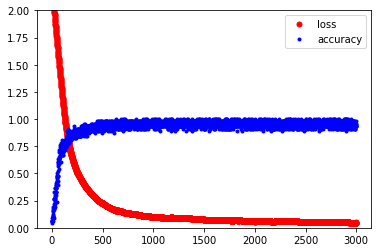

In [32]:
%matplotlib inline 

# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

# y_acc 에 학습 셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=5, label="loss")
plt.plot(x_len, y_acc, "o", c="blue", markersize=3, label="accuracy")
plt.legend()
plt.ylim(0,2)
plt.show()
# 복잡한 모델이 아니기때문에 드랍아웃이 오히려 정확도를 감소시켰다

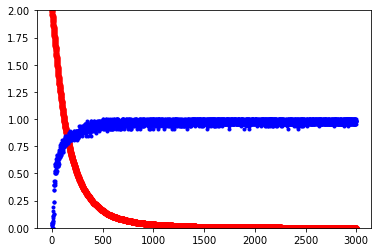

In [29]:
%matplotlib inline 

# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

# y_acc 에 학습 셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=5, label="loss")
plt.plot(x_len, y_acc, "o", c="blue", markersize=3, label="accuracy")

plt.ylim(0,2)
plt.show()
# 복잡한 모델이 아니기때문에 드랍아웃이 오히려 정확도를 감소시켰다

In [235]:
# class 와 음의 상관관계를 가지는 칼럼
data = pd.read_csv('../dataset/zoo.csv', usecols = ["hair","feathers","milk","toothed","backbone",
    "breathes","tail","domestic","catsize","class_type"])
dataset = data.values
X = dataset[:,0:9]
Y_obj = dataset[:,9]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = tf.keras.utils.to_categorical(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.3)

model = Sequential()
model.add(Dense(32,  input_dim=9, activation='relu'))
model.add(Dense(7, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

# 모델 실행
history = model.fit(X_train, Y_train, validation_split=0.33, epochs=3000, batch_size=500)

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Train on 46 samples, validate on 24 samples
Epoch 1/3000
46/46 [==============================] - 0s 1ms/step - loss: 1.9313 - accuracy: 0.0870 - val_loss: 1.8879 - val_accuracy: 0.0833
Epoch 2/3000
46/46 [==============================] - 0s 22us/step - loss: 1.9203 - accuracy: 0.0870 - val_loss: 1.8743 - val_accuracy: 0.0833
Epoch 3/3000
46/46 [==============================] - 0s 43us/step - loss: 1.9056 - accuracy: 0.0870 - val_loss: 1.8609 - val_accuracy: 0.0833
Epoch 4/3000
46/46 [==============================] - 0s 43us/step - loss: 1.8911 - accuracy: 0.0870 - val_loss: 1.8476 - val_accuracy: 0.3333
Epoch 5/3000
46/46 [==============================] - 0s 44us/step - loss: 1.8767 - accuracy: 0.2174 - val_loss: 1.8343 - val_accuracy: 0.3333
Epoch 6/3000
46/46 [==============================] - 0s 43us/step - loss: 1.8624 - accuracy: 0.2174 - val_loss: 1.8213 - val_accuracy: 0.3750
Epoch 7/3000
46/46 [==============================] - 0s 65us/step - loss: 1.8483 - accuracy: 0.282

Epoch 58/3000
46/46 [==============================] - 0s 43us/step - loss: 1.2657 - accuracy: 0.5652 - val_loss: 1.2773 - val_accuracy: 0.5833
Epoch 59/3000
46/46 [==============================] - 0s 43us/step - loss: 1.2566 - accuracy: 0.5652 - val_loss: 1.2695 - val_accuracy: 0.5833
Epoch 60/3000
46/46 [==============================] - 0s 43us/step - loss: 1.2475 - accuracy: 0.5652 - val_loss: 1.2619 - val_accuracy: 0.5833
Epoch 61/3000
46/46 [==============================] - 0s 65us/step - loss: 1.2386 - accuracy: 0.5652 - val_loss: 1.2544 - val_accuracy: 0.5833
Epoch 62/3000
46/46 [==============================] - 0s 43us/step - loss: 1.2297 - accuracy: 0.5652 - val_loss: 1.2471 - val_accuracy: 0.5833
Epoch 63/3000
46/46 [==============================] - 0s 43us/step - loss: 1.2210 - accuracy: 0.5652 - val_loss: 1.2399 - val_accuracy: 0.5833
Epoch 64/3000
46/46 [==============================] - 0s 43us/step - loss: 1.2124 - accuracy: 0.5652 - val_loss: 1.2329 - val_accuracy:

Epoch 115/3000
46/46 [==============================] - 0s 43us/step - loss: 0.8429 - accuracy: 0.7609 - val_loss: 0.9688 - val_accuracy: 0.6667
Epoch 116/3000
46/46 [==============================] - 0s 65us/step - loss: 0.8372 - accuracy: 0.7609 - val_loss: 0.9649 - val_accuracy: 0.6667
Epoch 117/3000
46/46 [==============================] - 0s 43us/step - loss: 0.8316 - accuracy: 0.7609 - val_loss: 0.9610 - val_accuracy: 0.6667
Epoch 118/3000
46/46 [==============================] - 0s 43us/step - loss: 0.8261 - accuracy: 0.7609 - val_loss: 0.9571 - val_accuracy: 0.6667
Epoch 119/3000
46/46 [==============================] - 0s 43us/step - loss: 0.8207 - accuracy: 0.7609 - val_loss: 0.9532 - val_accuracy: 0.6667
Epoch 120/3000
46/46 [==============================] - 0s 43us/step - loss: 0.8153 - accuracy: 0.7609 - val_loss: 0.9493 - val_accuracy: 0.6667
Epoch 121/3000
46/46 [==============================] - 0s 43us/step - loss: 0.8099 - accuracy: 0.7609 - val_loss: 0.9455 - val_ac

Epoch 172/3000
46/46 [==============================] - 0s 43us/step - loss: 0.5808 - accuracy: 0.8913 - val_loss: 0.7785 - val_accuracy: 0.7083
Epoch 173/3000
46/46 [==============================] - 0s 21us/step - loss: 0.5773 - accuracy: 0.8913 - val_loss: 0.7757 - val_accuracy: 0.7083
Epoch 174/3000
46/46 [==============================] - 0s 43us/step - loss: 0.5738 - accuracy: 0.8913 - val_loss: 0.7729 - val_accuracy: 0.7083
Epoch 175/3000
46/46 [==============================] - 0s 43us/step - loss: 0.5703 - accuracy: 0.8913 - val_loss: 0.7701 - val_accuracy: 0.7083
Epoch 176/3000
46/46 [==============================] - 0s 43us/step - loss: 0.5668 - accuracy: 0.8913 - val_loss: 0.7673 - val_accuracy: 0.7500
Epoch 177/3000
46/46 [==============================] - 0s 44us/step - loss: 0.5634 - accuracy: 0.8913 - val_loss: 0.7645 - val_accuracy: 0.7500
Epoch 178/3000
46/46 [==============================] - 0s 43us/step - loss: 0.5600 - accuracy: 0.8913 - val_loss: 0.7617 - val_ac

Epoch 229/3000
46/46 [==============================] - 0s 22us/step - loss: 0.4145 - accuracy: 0.9348 - val_loss: 0.6361 - val_accuracy: 0.7917
Epoch 230/3000
46/46 [==============================] - 0s 43us/step - loss: 0.4121 - accuracy: 0.9348 - val_loss: 0.6340 - val_accuracy: 0.7917
Epoch 231/3000
46/46 [==============================] - 0s 43us/step - loss: 0.4097 - accuracy: 0.9348 - val_loss: 0.6319 - val_accuracy: 0.7917
Epoch 232/3000
46/46 [==============================] - 0s 43us/step - loss: 0.4074 - accuracy: 0.9348 - val_loss: 0.6298 - val_accuracy: 0.7917
Epoch 233/3000
46/46 [==============================] - 0s 22us/step - loss: 0.4051 - accuracy: 0.9348 - val_loss: 0.6277 - val_accuracy: 0.7917
Epoch 234/3000
46/46 [==============================] - 0s 43us/step - loss: 0.4028 - accuracy: 0.9348 - val_loss: 0.6256 - val_accuracy: 0.7917
Epoch 235/3000
46/46 [==============================] - 0s 43us/step - loss: 0.4005 - accuracy: 0.9348 - val_loss: 0.6235 - val_ac

Epoch 286/3000
46/46 [==============================] - 0s 44us/step - loss: 0.2995 - accuracy: 0.9783 - val_loss: 0.5327 - val_accuracy: 0.8333
Epoch 287/3000
46/46 [==============================] - 0s 44us/step - loss: 0.2978 - accuracy: 0.9783 - val_loss: 0.5312 - val_accuracy: 0.8333
Epoch 288/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2961 - accuracy: 0.9783 - val_loss: 0.5298 - val_accuracy: 0.8333
Epoch 289/3000
46/46 [==============================] - 0s 21us/step - loss: 0.2945 - accuracy: 0.9783 - val_loss: 0.5284 - val_accuracy: 0.8333
Epoch 290/3000
46/46 [==============================] - 0s 44us/step - loss: 0.2928 - accuracy: 0.9783 - val_loss: 0.5270 - val_accuracy: 0.8333
Epoch 291/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2912 - accuracy: 0.9783 - val_loss: 0.5256 - val_accuracy: 0.8333
Epoch 292/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2895 - accuracy: 0.9783 - val_loss: 0.5242 - val_ac

Epoch 343/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2184 - accuracy: 0.9783 - val_loss: 0.4718 - val_accuracy: 0.8333
Epoch 344/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2172 - accuracy: 0.9783 - val_loss: 0.4711 - val_accuracy: 0.8333
Epoch 345/3000
46/46 [==============================] - 0s 44us/step - loss: 0.2161 - accuracy: 0.9783 - val_loss: 0.4704 - val_accuracy: 0.8333
Epoch 346/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2149 - accuracy: 0.9783 - val_loss: 0.4697 - val_accuracy: 0.8333
Epoch 347/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2138 - accuracy: 0.9783 - val_loss: 0.4690 - val_accuracy: 0.8333
Epoch 348/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2126 - accuracy: 0.9783 - val_loss: 0.4683 - val_accuracy: 0.8333
Epoch 349/3000
46/46 [==============================] - 0s 43us/step - loss: 0.2115 - accuracy: 0.9783 - val_loss: 0.4676 - val_ac

Epoch 400/3000
46/46 [==============================] - 0s 22us/step - loss: 0.1635 - accuracy: 0.9783 - val_loss: 0.4415 - val_accuracy: 0.8333
Epoch 401/3000
46/46 [==============================] - 0s 65us/step - loss: 0.1628 - accuracy: 0.9783 - val_loss: 0.4412 - val_accuracy: 0.8333
Epoch 402/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1620 - accuracy: 0.9783 - val_loss: 0.4409 - val_accuracy: 0.8333
Epoch 403/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1612 - accuracy: 0.9783 - val_loss: 0.4406 - val_accuracy: 0.8333
Epoch 404/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1605 - accuracy: 0.9783 - val_loss: 0.4403 - val_accuracy: 0.8333
Epoch 405/3000
46/46 [==============================] - 0s 21us/step - loss: 0.1597 - accuracy: 0.9783 - val_loss: 0.4400 - val_accuracy: 0.8333
Epoch 406/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1590 - accuracy: 0.9783 - val_loss: 0.4397 - val_ac

Epoch 457/3000
46/46 [==============================] - 0s 22us/step - loss: 0.1278 - accuracy: 0.9783 - val_loss: 0.4315 - val_accuracy: 0.8333
Epoch 458/3000
46/46 [==============================] - 0s 44us/step - loss: 0.1273 - accuracy: 0.9783 - val_loss: 0.4314 - val_accuracy: 0.8333
Epoch 459/3000
46/46 [==============================] - 0s 22us/step - loss: 0.1268 - accuracy: 0.9783 - val_loss: 0.4314 - val_accuracy: 0.8333
Epoch 460/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1263 - accuracy: 0.9783 - val_loss: 0.4313 - val_accuracy: 0.8333
Epoch 461/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1258 - accuracy: 0.9783 - val_loss: 0.4313 - val_accuracy: 0.8333
Epoch 462/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1253 - accuracy: 0.9783 - val_loss: 0.4312 - val_accuracy: 0.8333
Epoch 463/3000
46/46 [==============================] - 0s 44us/step - loss: 0.1248 - accuracy: 0.9783 - val_loss: 0.4312 - val_ac

Epoch 514/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1046 - accuracy: 0.9783 - val_loss: 0.4304 - val_accuracy: 0.8333
Epoch 515/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1043 - accuracy: 0.9783 - val_loss: 0.4305 - val_accuracy: 0.8333
Epoch 516/3000
46/46 [==============================] - 0s 22us/step - loss: 0.1040 - accuracy: 0.9783 - val_loss: 0.4305 - val_accuracy: 0.8333
Epoch 517/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1037 - accuracy: 0.9783 - val_loss: 0.4305 - val_accuracy: 0.8333
Epoch 518/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1033 - accuracy: 0.9783 - val_loss: 0.4306 - val_accuracy: 0.8333
Epoch 519/3000
46/46 [==============================] - 0s 22us/step - loss: 0.1030 - accuracy: 0.9783 - val_loss: 0.4306 - val_accuracy: 0.8333
Epoch 520/3000
46/46 [==============================] - 0s 43us/step - loss: 0.1027 - accuracy: 0.9783 - val_loss: 0.4307 - val_ac

Epoch 571/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0894 - accuracy: 0.9783 - val_loss: 0.4340 - val_accuracy: 0.8333
Epoch 572/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0892 - accuracy: 0.9783 - val_loss: 0.4340 - val_accuracy: 0.8333
Epoch 573/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0890 - accuracy: 0.9783 - val_loss: 0.4341 - val_accuracy: 0.8333
Epoch 574/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0887 - accuracy: 0.9783 - val_loss: 0.4342 - val_accuracy: 0.8333
Epoch 575/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0885 - accuracy: 0.9783 - val_loss: 0.4343 - val_accuracy: 0.8333
Epoch 576/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0883 - accuracy: 0.9783 - val_loss: 0.4345 - val_accuracy: 0.8333
Epoch 577/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0881 - accuracy: 0.9783 - val_loss: 0.4346 - val_ac

Epoch 628/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0790 - accuracy: 0.9783 - val_loss: 0.4409 - val_accuracy: 0.8333
Epoch 629/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0788 - accuracy: 0.9783 - val_loss: 0.4411 - val_accuracy: 0.8333
Epoch 630/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0787 - accuracy: 0.9783 - val_loss: 0.4412 - val_accuracy: 0.8333
Epoch 631/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0785 - accuracy: 0.9783 - val_loss: 0.4414 - val_accuracy: 0.8333
Epoch 632/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0784 - accuracy: 0.9783 - val_loss: 0.4415 - val_accuracy: 0.8333
Epoch 633/3000
46/46 [==============================] - 0s 28us/step - loss: 0.0782 - accuracy: 0.9783 - val_loss: 0.4416 - val_accuracy: 0.8333
Epoch 634/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0781 - accuracy: 0.9783 - val_loss: 0.4418 - val_ac

Epoch 685/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0716 - accuracy: 0.9783 - val_loss: 0.4498 - val_accuracy: 0.8333
Epoch 686/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0714 - accuracy: 0.9783 - val_loss: 0.4500 - val_accuracy: 0.8333
Epoch 687/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0713 - accuracy: 0.9783 - val_loss: 0.4502 - val_accuracy: 0.8333
Epoch 688/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0712 - accuracy: 0.9783 - val_loss: 0.4503 - val_accuracy: 0.8333
Epoch 689/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0711 - accuracy: 0.9783 - val_loss: 0.4505 - val_accuracy: 0.8333
Epoch 690/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0710 - accuracy: 0.9783 - val_loss: 0.4507 - val_accuracy: 0.8333
Epoch 691/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0709 - accuracy: 0.9783 - val_loss: 0.4508 - val_ac

Epoch 742/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0661 - accuracy: 0.9783 - val_loss: 0.4590 - val_accuracy: 0.8333
Epoch 743/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0660 - accuracy: 0.9783 - val_loss: 0.4592 - val_accuracy: 0.8333
Epoch 744/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0660 - accuracy: 0.9783 - val_loss: 0.4594 - val_accuracy: 0.8333
Epoch 745/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0659 - accuracy: 0.9783 - val_loss: 0.4595 - val_accuracy: 0.8333
Epoch 746/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0658 - accuracy: 0.9783 - val_loss: 0.4597 - val_accuracy: 0.8333
Epoch 747/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0657 - accuracy: 0.9783 - val_loss: 0.4599 - val_accuracy: 0.8333
Epoch 748/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0656 - accuracy: 0.9783 - val_loss: 0.4600 - val_ac

Epoch 799/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0620 - accuracy: 0.9783 - val_loss: 0.4691 - val_accuracy: 0.8333
Epoch 800/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0620 - accuracy: 0.9783 - val_loss: 0.4692 - val_accuracy: 0.8333
Epoch 801/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0619 - accuracy: 0.9783 - val_loss: 0.4694 - val_accuracy: 0.8333
Epoch 802/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0618 - accuracy: 0.9783 - val_loss: 0.4696 - val_accuracy: 0.8333
Epoch 803/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0618 - accuracy: 0.9783 - val_loss: 0.4698 - val_accuracy: 0.8333
Epoch 804/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0617 - accuracy: 0.9783 - val_loss: 0.4700 - val_accuracy: 0.8333
Epoch 805/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0617 - accuracy: 0.9783 - val_loss: 0.4701 - val_ac

Epoch 856/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0589 - accuracy: 0.9783 - val_loss: 0.4795 - val_accuracy: 0.8333
Epoch 857/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0588 - accuracy: 0.9783 - val_loss: 0.4797 - val_accuracy: 0.8333
Epoch 858/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0588 - accuracy: 0.9783 - val_loss: 0.4799 - val_accuracy: 0.8333
Epoch 859/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0587 - accuracy: 0.9783 - val_loss: 0.4801 - val_accuracy: 0.8333
Epoch 860/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0587 - accuracy: 0.9783 - val_loss: 0.4802 - val_accuracy: 0.8333
Epoch 861/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0586 - accuracy: 0.9783 - val_loss: 0.4804 - val_accuracy: 0.8333
Epoch 862/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0586 - accuracy: 0.9783 - val_loss: 0.4806 - val_ac

Epoch 913/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0564 - accuracy: 0.9783 - val_loss: 0.4897 - val_accuracy: 0.8333
Epoch 914/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0563 - accuracy: 0.9783 - val_loss: 0.4899 - val_accuracy: 0.8333
Epoch 915/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0563 - accuracy: 0.9783 - val_loss: 0.4901 - val_accuracy: 0.8333
Epoch 916/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0562 - accuracy: 0.9783 - val_loss: 0.4903 - val_accuracy: 0.8333
Epoch 917/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0562 - accuracy: 0.9783 - val_loss: 0.4904 - val_accuracy: 0.8333
Epoch 918/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0562 - accuracy: 0.9783 - val_loss: 0.4906 - val_accuracy: 0.8333
Epoch 919/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0561 - accuracy: 0.9783 - val_loss: 0.4908 - val_ac

Epoch 970/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0544 - accuracy: 0.9783 - val_loss: 0.4995 - val_accuracy: 0.8333
Epoch 971/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0543 - accuracy: 0.9783 - val_loss: 0.4997 - val_accuracy: 0.8333
Epoch 972/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0543 - accuracy: 0.9783 - val_loss: 0.4999 - val_accuracy: 0.8333
Epoch 973/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0543 - accuracy: 0.9783 - val_loss: 0.5000 - val_accuracy: 0.8333
Epoch 974/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0542 - accuracy: 0.9783 - val_loss: 0.5002 - val_accuracy: 0.8333
Epoch 975/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0542 - accuracy: 0.9783 - val_loss: 0.5004 - val_accuracy: 0.8333
Epoch 976/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0542 - accuracy: 0.9783 - val_loss: 0.5006 - val_ac

Epoch 1027/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0527 - accuracy: 0.9783 - val_loss: 0.5092 - val_accuracy: 0.8333
Epoch 1028/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0527 - accuracy: 0.9783 - val_loss: 0.5094 - val_accuracy: 0.8333
Epoch 1029/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0527 - accuracy: 0.9783 - val_loss: 0.5095 - val_accuracy: 0.8333
Epoch 1030/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0527 - accuracy: 0.9783 - val_loss: 0.5097 - val_accuracy: 0.8333
Epoch 1031/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0526 - accuracy: 0.9783 - val_loss: 0.5099 - val_accuracy: 0.8333
Epoch 1032/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0526 - accuracy: 0.9783 - val_loss: 0.5100 - val_accuracy: 0.8333
Epoch 1033/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0526 - accuracy: 0.9783 - val_loss: 0.5102 -

Epoch 1084/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0514 - accuracy: 0.9783 - val_loss: 0.5187 - val_accuracy: 0.8333
Epoch 1085/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0514 - accuracy: 0.9783 - val_loss: 0.5189 - val_accuracy: 0.8333
Epoch 1086/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0513 - accuracy: 0.9783 - val_loss: 0.5190 - val_accuracy: 0.8333
Epoch 1087/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0513 - accuracy: 0.9783 - val_loss: 0.5192 - val_accuracy: 0.8333
Epoch 1088/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0513 - accuracy: 0.9783 - val_loss: 0.5194 - val_accuracy: 0.8333
Epoch 1089/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0513 - accuracy: 0.9783 - val_loss: 0.5195 - val_accuracy: 0.8333
Epoch 1090/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0513 - accuracy: 0.9783 - val_loss: 0.5197 -

Epoch 1141/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0503 - accuracy: 0.9783 - val_loss: 0.5280 - val_accuracy: 0.8333
Epoch 1142/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0502 - accuracy: 0.9783 - val_loss: 0.5282 - val_accuracy: 0.8333
Epoch 1143/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0502 - accuracy: 0.9783 - val_loss: 0.5284 - val_accuracy: 0.8333
Epoch 1144/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0502 - accuracy: 0.9783 - val_loss: 0.5285 - val_accuracy: 0.8333
Epoch 1145/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0502 - accuracy: 0.9783 - val_loss: 0.5287 - val_accuracy: 0.8333
Epoch 1146/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0502 - accuracy: 0.9783 - val_loss: 0.5289 - val_accuracy: 0.8333
Epoch 1147/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0501 - accuracy: 0.9783 - val_loss: 0.5290 -

Epoch 1198/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0493 - accuracy: 0.9783 - val_loss: 0.5372 - val_accuracy: 0.8333
Epoch 1199/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0493 - accuracy: 0.9783 - val_loss: 0.5374 - val_accuracy: 0.8333
Epoch 1200/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0493 - accuracy: 0.9783 - val_loss: 0.5375 - val_accuracy: 0.8333
Epoch 1201/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0493 - accuracy: 0.9783 - val_loss: 0.5377 - val_accuracy: 0.8333
Epoch 1202/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0492 - accuracy: 0.9783 - val_loss: 0.5379 - val_accuracy: 0.8333
Epoch 1203/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0492 - accuracy: 0.9783 - val_loss: 0.5380 - val_accuracy: 0.8333
Epoch 1204/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0492 - accuracy: 0.9783 - val_loss: 0.5382 -

Epoch 1255/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0485 - accuracy: 0.9783 - val_loss: 0.5464 - val_accuracy: 0.8333
Epoch 1256/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0485 - accuracy: 0.9783 - val_loss: 0.5465 - val_accuracy: 0.8333
Epoch 1257/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0485 - accuracy: 0.9783 - val_loss: 0.5467 - val_accuracy: 0.8333
Epoch 1258/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0485 - accuracy: 0.9783 - val_loss: 0.5468 - val_accuracy: 0.8333
Epoch 1259/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0484 - accuracy: 0.9783 - val_loss: 0.5470 - val_accuracy: 0.8333
Epoch 1260/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0484 - accuracy: 0.9783 - val_loss: 0.5472 - val_accuracy: 0.8333
Epoch 1261/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0484 - accuracy: 0.9783 - val_loss: 0.5473 -

Epoch 1312/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0478 - accuracy: 0.9783 - val_loss: 0.5553 - val_accuracy: 0.8333
Epoch 1313/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0478 - accuracy: 0.9783 - val_loss: 0.5554 - val_accuracy: 0.8333
Epoch 1314/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0478 - accuracy: 0.9783 - val_loss: 0.5556 - val_accuracy: 0.8333
Epoch 1315/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0478 - accuracy: 0.9783 - val_loss: 0.5557 - val_accuracy: 0.8333
Epoch 1316/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0478 - accuracy: 0.9783 - val_loss: 0.5559 - val_accuracy: 0.8333
Epoch 1317/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0477 - accuracy: 0.9783 - val_loss: 0.5560 - val_accuracy: 0.8333
Epoch 1318/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0477 - accuracy: 0.9783 - val_loss: 0.5562 -

Epoch 1369/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0472 - accuracy: 0.9783 - val_loss: 0.5639 - val_accuracy: 0.8333
Epoch 1370/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0472 - accuracy: 0.9783 - val_loss: 0.5641 - val_accuracy: 0.8333
Epoch 1371/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0472 - accuracy: 0.9783 - val_loss: 0.5642 - val_accuracy: 0.8333
Epoch 1372/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0472 - accuracy: 0.9783 - val_loss: 0.5644 - val_accuracy: 0.8333
Epoch 1373/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0472 - accuracy: 0.9783 - val_loss: 0.5646 - val_accuracy: 0.8333
Epoch 1374/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0472 - accuracy: 0.9783 - val_loss: 0.5647 - val_accuracy: 0.8333
Epoch 1375/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0471 - accuracy: 0.9783 - val_loss: 0.5649 -

Epoch 1426/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0467 - accuracy: 0.9783 - val_loss: 0.5725 - val_accuracy: 0.8333
Epoch 1427/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0467 - accuracy: 0.9783 - val_loss: 0.5726 - val_accuracy: 0.8333
Epoch 1428/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0467 - accuracy: 0.9783 - val_loss: 0.5728 - val_accuracy: 0.8333
Epoch 1429/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0467 - accuracy: 0.9783 - val_loss: 0.5729 - val_accuracy: 0.8333
Epoch 1430/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0466 - accuracy: 0.9783 - val_loss: 0.5731 - val_accuracy: 0.8333
Epoch 1431/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0466 - accuracy: 0.9783 - val_loss: 0.5732 - val_accuracy: 0.8333
Epoch 1432/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0466 - accuracy: 0.9783 - val_loss: 0.5734 -

Epoch 1483/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0462 - accuracy: 0.9783 - val_loss: 0.5808 - val_accuracy: 0.8333
Epoch 1484/3000
46/46 [==============================] - 0s 64us/step - loss: 0.0462 - accuracy: 0.9783 - val_loss: 0.5810 - val_accuracy: 0.8333
Epoch 1485/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0462 - accuracy: 0.9783 - val_loss: 0.5811 - val_accuracy: 0.8333
Epoch 1486/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0462 - accuracy: 0.9783 - val_loss: 0.5813 - val_accuracy: 0.8333
Epoch 1487/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0462 - accuracy: 0.9783 - val_loss: 0.5814 - val_accuracy: 0.8333
Epoch 1488/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0462 - accuracy: 0.9783 - val_loss: 0.5815 - val_accuracy: 0.8333
Epoch 1489/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0462 - accuracy: 0.9783 - val_loss: 0.5817 -

Epoch 1540/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0458 - accuracy: 0.9783 - val_loss: 0.5890 - val_accuracy: 0.8333
Epoch 1541/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0458 - accuracy: 0.9783 - val_loss: 0.5891 - val_accuracy: 0.8333
Epoch 1542/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0458 - accuracy: 0.9783 - val_loss: 0.5893 - val_accuracy: 0.8333
Epoch 1543/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0458 - accuracy: 0.9783 - val_loss: 0.5894 - val_accuracy: 0.8333
Epoch 1544/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0458 - accuracy: 0.9783 - val_loss: 0.5895 - val_accuracy: 0.8333
Epoch 1545/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0458 - accuracy: 0.9783 - val_loss: 0.5897 - val_accuracy: 0.8333
Epoch 1546/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0458 - accuracy: 0.9783 - val_loss: 0.5898 -

Epoch 1597/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0455 - accuracy: 0.9783 - val_loss: 0.5969 - val_accuracy: 0.8333
Epoch 1598/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0455 - accuracy: 0.9783 - val_loss: 0.5971 - val_accuracy: 0.8333
Epoch 1599/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0455 - accuracy: 0.9783 - val_loss: 0.5972 - val_accuracy: 0.8333
Epoch 1600/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0455 - accuracy: 0.9783 - val_loss: 0.5974 - val_accuracy: 0.8333
Epoch 1601/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0454 - accuracy: 0.9783 - val_loss: 0.5975 - val_accuracy: 0.8333
Epoch 1602/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0454 - accuracy: 0.9783 - val_loss: 0.5976 - val_accuracy: 0.8333
Epoch 1603/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0454 - accuracy: 0.9783 - val_loss: 0.5978 -

Epoch 1654/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0452 - accuracy: 0.9783 - val_loss: 0.6048 - val_accuracy: 0.8333
Epoch 1655/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0451 - accuracy: 0.9783 - val_loss: 0.6049 - val_accuracy: 0.8333
Epoch 1656/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0451 - accuracy: 0.9783 - val_loss: 0.6051 - val_accuracy: 0.8333
Epoch 1657/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0451 - accuracy: 0.9783 - val_loss: 0.6052 - val_accuracy: 0.8333
Epoch 1658/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0451 - accuracy: 0.9783 - val_loss: 0.6054 - val_accuracy: 0.8333
Epoch 1659/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0451 - accuracy: 0.9783 - val_loss: 0.6055 - val_accuracy: 0.8333
Epoch 1660/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0451 - accuracy: 0.9783 - val_loss: 0.6056 -

Epoch 1711/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0449 - accuracy: 0.9783 - val_loss: 0.6125 - val_accuracy: 0.8333
Epoch 1712/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0449 - accuracy: 0.9783 - val_loss: 0.6126 - val_accuracy: 0.8333
Epoch 1713/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0449 - accuracy: 0.9783 - val_loss: 0.6128 - val_accuracy: 0.8333
Epoch 1714/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0449 - accuracy: 0.9783 - val_loss: 0.6129 - val_accuracy: 0.8333
Epoch 1715/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0449 - accuracy: 0.9783 - val_loss: 0.6130 - val_accuracy: 0.8333
Epoch 1716/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0448 - accuracy: 0.9783 - val_loss: 0.6131 - val_accuracy: 0.8333
Epoch 1717/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0448 - accuracy: 0.9783 - val_loss: 0.6133 -

Epoch 1768/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0446 - accuracy: 0.9783 - val_loss: 0.6199 - val_accuracy: 0.8333
Epoch 1769/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0446 - accuracy: 0.9783 - val_loss: 0.6201 - val_accuracy: 0.8333
Epoch 1770/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0446 - accuracy: 0.9783 - val_loss: 0.6202 - val_accuracy: 0.8333
Epoch 1771/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0446 - accuracy: 0.9783 - val_loss: 0.6203 - val_accuracy: 0.8333
Epoch 1772/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0446 - accuracy: 0.9783 - val_loss: 0.6204 - val_accuracy: 0.8333
Epoch 1773/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0446 - accuracy: 0.9783 - val_loss: 0.6206 - val_accuracy: 0.8333
Epoch 1774/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0446 - accuracy: 0.9783 - val_loss: 0.6207 -

Epoch 1825/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0444 - accuracy: 0.9783 - val_loss: 0.6272 - val_accuracy: 0.8333
Epoch 1826/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0444 - accuracy: 0.9783 - val_loss: 0.6274 - val_accuracy: 0.8333
Epoch 1827/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0444 - accuracy: 0.9783 - val_loss: 0.6275 - val_accuracy: 0.8333
Epoch 1828/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0444 - accuracy: 0.9783 - val_loss: 0.6276 - val_accuracy: 0.8333
Epoch 1829/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0444 - accuracy: 0.9783 - val_loss: 0.6277 - val_accuracy: 0.8333
Epoch 1830/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0444 - accuracy: 0.9783 - val_loss: 0.6279 - val_accuracy: 0.8333
Epoch 1831/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0444 - accuracy: 0.9783 - val_loss: 0.6280 -

Epoch 1882/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0442 - accuracy: 0.9783 - val_loss: 0.6342 - val_accuracy: 0.8333
Epoch 1883/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0442 - accuracy: 0.9783 - val_loss: 0.6344 - val_accuracy: 0.8333
Epoch 1884/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0442 - accuracy: 0.9783 - val_loss: 0.6345 - val_accuracy: 0.8333
Epoch 1885/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0442 - accuracy: 0.9783 - val_loss: 0.6346 - val_accuracy: 0.8333
Epoch 1886/3000
46/46 [==============================] - 0s 42us/step - loss: 0.0442 - accuracy: 0.9783 - val_loss: 0.6347 - val_accuracy: 0.8333
Epoch 1887/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0442 - accuracy: 0.9783 - val_loss: 0.6348 - val_accuracy: 0.8333
Epoch 1888/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0442 - accuracy: 0.9783 - val_loss: 0.6349 -

Epoch 1939/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0440 - accuracy: 0.9783 - val_loss: 0.6410 - val_accuracy: 0.8333
Epoch 1940/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0440 - accuracy: 0.9783 - val_loss: 0.6411 - val_accuracy: 0.8333
Epoch 1941/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0440 - accuracy: 0.9783 - val_loss: 0.6412 - val_accuracy: 0.8333
Epoch 1942/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0440 - accuracy: 0.9783 - val_loss: 0.6414 - val_accuracy: 0.8333
Epoch 1943/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0440 - accuracy: 0.9783 - val_loss: 0.6415 - val_accuracy: 0.8333
Epoch 1944/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0440 - accuracy: 0.9783 - val_loss: 0.6416 - val_accuracy: 0.8333
Epoch 1945/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0440 - accuracy: 0.9783 - val_loss: 0.6417 -

Epoch 1996/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0438 - accuracy: 0.9783 - val_loss: 0.6477 - val_accuracy: 0.8333
Epoch 1997/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0438 - accuracy: 0.9783 - val_loss: 0.6478 - val_accuracy: 0.8333
Epoch 1998/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0438 - accuracy: 0.9783 - val_loss: 0.6479 - val_accuracy: 0.8333
Epoch 1999/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0438 - accuracy: 0.9783 - val_loss: 0.6480 - val_accuracy: 0.8333
Epoch 2000/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0438 - accuracy: 0.9783 - val_loss: 0.6481 - val_accuracy: 0.8333
Epoch 2001/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0438 - accuracy: 0.9783 - val_loss: 0.6482 - val_accuracy: 0.8333
Epoch 2002/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0438 - accuracy: 0.9783 - val_loss: 0.6484 -

Epoch 2053/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0437 - accuracy: 0.9783 - val_loss: 0.6542 - val_accuracy: 0.8333
Epoch 2054/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0437 - accuracy: 0.9783 - val_loss: 0.6543 - val_accuracy: 0.8333
Epoch 2055/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0437 - accuracy: 0.9783 - val_loss: 0.6544 - val_accuracy: 0.8333
Epoch 2056/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0437 - accuracy: 0.9783 - val_loss: 0.6545 - val_accuracy: 0.8333
Epoch 2057/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0437 - accuracy: 0.9783 - val_loss: 0.6546 - val_accuracy: 0.8333
Epoch 2058/3000
46/46 [==============================] - 0s 33us/step - loss: 0.0437 - accuracy: 0.9783 - val_loss: 0.6547 - val_accuracy: 0.8333
Epoch 2059/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0437 - accuracy: 0.9783 - val_loss: 0.6549 -

Epoch 2110/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0435 - accuracy: 0.9783 - val_loss: 0.6606 - val_accuracy: 0.8333
Epoch 2111/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0435 - accuracy: 0.9783 - val_loss: 0.6607 - val_accuracy: 0.8333
Epoch 2112/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0435 - accuracy: 0.9783 - val_loss: 0.6608 - val_accuracy: 0.8333
Epoch 2113/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0435 - accuracy: 0.9783 - val_loss: 0.6609 - val_accuracy: 0.8333
Epoch 2114/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0435 - accuracy: 0.9783 - val_loss: 0.6610 - val_accuracy: 0.8333
Epoch 2115/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0435 - accuracy: 0.9783 - val_loss: 0.6611 - val_accuracy: 0.8333
Epoch 2116/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0435 - accuracy: 0.9783 - val_loss: 0.6612 -

Epoch 2167/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0434 - accuracy: 0.9783 - val_loss: 0.6668 - val_accuracy: 0.8333
Epoch 2168/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0434 - accuracy: 0.9783 - val_loss: 0.6669 - val_accuracy: 0.8333
Epoch 2169/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0434 - accuracy: 0.9783 - val_loss: 0.6670 - val_accuracy: 0.8333
Epoch 2170/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0434 - accuracy: 0.9783 - val_loss: 0.6671 - val_accuracy: 0.8333
Epoch 2171/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0434 - accuracy: 0.9783 - val_loss: 0.6672 - val_accuracy: 0.8333
Epoch 2172/3000
46/46 [==============================] - 0s 64us/step - loss: 0.0434 - accuracy: 0.9783 - val_loss: 0.6673 - val_accuracy: 0.8333
Epoch 2173/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0434 - accuracy: 0.9783 - val_loss: 0.6675 -

Epoch 2224/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0433 - accuracy: 0.9783 - val_loss: 0.6729 - val_accuracy: 0.8333
Epoch 2225/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0433 - accuracy: 0.9783 - val_loss: 0.6730 - val_accuracy: 0.8333
Epoch 2226/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0433 - accuracy: 0.9783 - val_loss: 0.6731 - val_accuracy: 0.8333
Epoch 2227/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0433 - accuracy: 0.9783 - val_loss: 0.6733 - val_accuracy: 0.8333
Epoch 2228/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0433 - accuracy: 0.9783 - val_loss: 0.6734 - val_accuracy: 0.8333
Epoch 2229/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0433 - accuracy: 0.9783 - val_loss: 0.6735 - val_accuracy: 0.8333
Epoch 2230/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0433 - accuracy: 0.9783 - val_loss: 0.6736 -

Epoch 2281/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0432 - accuracy: 0.9783 - val_loss: 0.6790 - val_accuracy: 0.8333
Epoch 2282/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0432 - accuracy: 0.9783 - val_loss: 0.6791 - val_accuracy: 0.8333
Epoch 2283/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0432 - accuracy: 0.9783 - val_loss: 0.6792 - val_accuracy: 0.8333
Epoch 2284/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0432 - accuracy: 0.9783 - val_loss: 0.6793 - val_accuracy: 0.8333
Epoch 2285/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0432 - accuracy: 0.9783 - val_loss: 0.6794 - val_accuracy: 0.8333
Epoch 2286/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0432 - accuracy: 0.9783 - val_loss: 0.6795 - val_accuracy: 0.8333
Epoch 2287/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0432 - accuracy: 0.9783 - val_loss: 0.6796 -

Epoch 2338/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0431 - accuracy: 0.9783 - val_loss: 0.6849 - val_accuracy: 0.8333
Epoch 2339/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0431 - accuracy: 0.9783 - val_loss: 0.6850 - val_accuracy: 0.8333
Epoch 2340/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0431 - accuracy: 0.9783 - val_loss: 0.6851 - val_accuracy: 0.8333
Epoch 2341/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0431 - accuracy: 0.9783 - val_loss: 0.6852 - val_accuracy: 0.8333
Epoch 2342/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0431 - accuracy: 0.9783 - val_loss: 0.6853 - val_accuracy: 0.8333
Epoch 2343/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0431 - accuracy: 0.9783 - val_loss: 0.6854 - val_accuracy: 0.8333
Epoch 2344/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0431 - accuracy: 0.9783 - val_loss: 0.6855 -

Epoch 2395/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0430 - accuracy: 0.9783 - val_loss: 0.6908 - val_accuracy: 0.8333
Epoch 2396/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0430 - accuracy: 0.9783 - val_loss: 0.6909 - val_accuracy: 0.8333
Epoch 2397/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0430 - accuracy: 0.9783 - val_loss: 0.6910 - val_accuracy: 0.8333
Epoch 2398/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0430 - accuracy: 0.9783 - val_loss: 0.6911 - val_accuracy: 0.8333
Epoch 2399/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0430 - accuracy: 0.9783 - val_loss: 0.6912 - val_accuracy: 0.8333
Epoch 2400/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0430 - accuracy: 0.9783 - val_loss: 0.6913 - val_accuracy: 0.8333
Epoch 2401/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0430 - accuracy: 0.9783 - val_loss: 0.6914 -

Epoch 2452/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0429 - accuracy: 0.9783 - val_loss: 0.6965 - val_accuracy: 0.8333
Epoch 2453/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0429 - accuracy: 0.9783 - val_loss: 0.6966 - val_accuracy: 0.8333
Epoch 2454/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0429 - accuracy: 0.9783 - val_loss: 0.6967 - val_accuracy: 0.8333
Epoch 2455/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0429 - accuracy: 0.9783 - val_loss: 0.6968 - val_accuracy: 0.8333
Epoch 2456/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0429 - accuracy: 0.9783 - val_loss: 0.6969 - val_accuracy: 0.8333
Epoch 2457/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0429 - accuracy: 0.9783 - val_loss: 0.6970 - val_accuracy: 0.8333
Epoch 2458/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0429 - accuracy: 0.9783 - val_loss: 0.6971 -

Epoch 2509/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0428 - accuracy: 0.9783 - val_loss: 0.7022 - val_accuracy: 0.8333
Epoch 2510/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0428 - accuracy: 0.9783 - val_loss: 0.7022 - val_accuracy: 0.8333
Epoch 2511/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0428 - accuracy: 0.9783 - val_loss: 0.7023 - val_accuracy: 0.8333
Epoch 2512/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0428 - accuracy: 0.9783 - val_loss: 0.7024 - val_accuracy: 0.8333
Epoch 2513/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0428 - accuracy: 0.9783 - val_loss: 0.7025 - val_accuracy: 0.8333
Epoch 2514/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0428 - accuracy: 0.9783 - val_loss: 0.7026 - val_accuracy: 0.8333
Epoch 2515/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0428 - accuracy: 0.9783 - val_loss: 0.7027 -

Epoch 2566/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0428 - accuracy: 0.9783 - val_loss: 0.7077 - val_accuracy: 0.8333
Epoch 2567/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0428 - accuracy: 0.9783 - val_loss: 0.7078 - val_accuracy: 0.8333
Epoch 2568/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0428 - accuracy: 0.9783 - val_loss: 0.7079 - val_accuracy: 0.8333
Epoch 2569/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0428 - accuracy: 0.9783 - val_loss: 0.7080 - val_accuracy: 0.8333
Epoch 2570/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0428 - accuracy: 0.9783 - val_loss: 0.7081 - val_accuracy: 0.8333
Epoch 2571/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0428 - accuracy: 0.9783 - val_loss: 0.7082 - val_accuracy: 0.8333
Epoch 2572/3000
46/46 [==============================] - 0s 66us/step - loss: 0.0427 - accuracy: 0.9783 - val_loss: 0.7083 -

Epoch 2623/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0427 - accuracy: 0.9783 - val_loss: 0.7133 - val_accuracy: 0.8333
Epoch 2624/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0427 - accuracy: 0.9783 - val_loss: 0.7134 - val_accuracy: 0.8333
Epoch 2625/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0427 - accuracy: 0.9783 - val_loss: 0.7135 - val_accuracy: 0.8333
Epoch 2626/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0427 - accuracy: 0.9783 - val_loss: 0.7136 - val_accuracy: 0.8333
Epoch 2627/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0427 - accuracy: 0.9783 - val_loss: 0.7137 - val_accuracy: 0.8333
Epoch 2628/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0427 - accuracy: 0.9783 - val_loss: 0.7137 - val_accuracy: 0.8333
Epoch 2629/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0427 - accuracy: 0.9783 - val_loss: 0.7138 -

Epoch 2680/3000
46/46 [==============================] - 0s 65us/step - loss: 0.0426 - accuracy: 0.9783 - val_loss: 0.7187 - val_accuracy: 0.8333
Epoch 2681/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0426 - accuracy: 0.9783 - val_loss: 0.7188 - val_accuracy: 0.8333
Epoch 2682/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0426 - accuracy: 0.9783 - val_loss: 0.7189 - val_accuracy: 0.8333
Epoch 2683/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0426 - accuracy: 0.9783 - val_loss: 0.7190 - val_accuracy: 0.8333
Epoch 2684/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0426 - accuracy: 0.9783 - val_loss: 0.7191 - val_accuracy: 0.8333
Epoch 2685/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0426 - accuracy: 0.9783 - val_loss: 0.7192 - val_accuracy: 0.8333
Epoch 2686/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0426 - accuracy: 0.9783 - val_loss: 0.7193 -

Epoch 2737/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0426 - accuracy: 0.9783 - val_loss: 0.7241 - val_accuracy: 0.8333
Epoch 2738/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0426 - accuracy: 0.9783 - val_loss: 0.7242 - val_accuracy: 0.8333
Epoch 2739/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0426 - accuracy: 0.9783 - val_loss: 0.7243 - val_accuracy: 0.8333
Epoch 2740/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0426 - accuracy: 0.9783 - val_loss: 0.7244 - val_accuracy: 0.8333
Epoch 2741/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0426 - accuracy: 0.9783 - val_loss: 0.7245 - val_accuracy: 0.8333
Epoch 2742/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0426 - accuracy: 0.9783 - val_loss: 0.7246 - val_accuracy: 0.8333
Epoch 2743/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0426 - accuracy: 0.9783 - val_loss: 0.7246 -

Epoch 2794/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0425 - accuracy: 0.9783 - val_loss: 0.7294 - val_accuracy: 0.8333
Epoch 2795/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0425 - accuracy: 0.9783 - val_loss: 0.7295 - val_accuracy: 0.8333
Epoch 2796/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0425 - accuracy: 0.9783 - val_loss: 0.7296 - val_accuracy: 0.8333
Epoch 2797/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0425 - accuracy: 0.9783 - val_loss: 0.7297 - val_accuracy: 0.8333
Epoch 2798/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0425 - accuracy: 0.9783 - val_loss: 0.7298 - val_accuracy: 0.8333
Epoch 2799/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0425 - accuracy: 0.9783 - val_loss: 0.7299 - val_accuracy: 0.8333
Epoch 2800/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0425 - accuracy: 0.9783 - val_loss: 0.7299 -

Epoch 2851/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0425 - accuracy: 0.9783 - val_loss: 0.7346 - val_accuracy: 0.8333
Epoch 2852/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0425 - accuracy: 0.9783 - val_loss: 0.7347 - val_accuracy: 0.8333
Epoch 2853/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0425 - accuracy: 0.9783 - val_loss: 0.7348 - val_accuracy: 0.8333
Epoch 2854/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0425 - accuracy: 0.9783 - val_loss: 0.7349 - val_accuracy: 0.8333
Epoch 2855/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0425 - accuracy: 0.9783 - val_loss: 0.7350 - val_accuracy: 0.8333
Epoch 2856/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0425 - accuracy: 0.9783 - val_loss: 0.7351 - val_accuracy: 0.8333
Epoch 2857/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0425 - accuracy: 0.9783 - val_loss: 0.7352 -

Epoch 2908/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0424 - accuracy: 0.9783 - val_loss: 0.7396 - val_accuracy: 0.8333
Epoch 2909/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0424 - accuracy: 0.9783 - val_loss: 0.7397 - val_accuracy: 0.8333
Epoch 2910/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0424 - accuracy: 0.9783 - val_loss: 0.7398 - val_accuracy: 0.8333
Epoch 2911/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0424 - accuracy: 0.9783 - val_loss: 0.7399 - val_accuracy: 0.8333
Epoch 2912/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0424 - accuracy: 0.9783 - val_loss: 0.7400 - val_accuracy: 0.8333
Epoch 2913/3000
46/46 [==============================] - 0s 22us/step - loss: 0.0424 - accuracy: 0.9783 - val_loss: 0.7401 - val_accuracy: 0.8333
Epoch 2914/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0424 - accuracy: 0.9783 - val_loss: 0.7402 -

Epoch 2965/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0424 - accuracy: 0.9783 - val_loss: 0.7446 - val_accuracy: 0.8333
Epoch 2966/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0424 - accuracy: 0.9783 - val_loss: 0.7447 - val_accuracy: 0.8333
Epoch 2967/3000
46/46 [==============================] - 0s 21us/step - loss: 0.0424 - accuracy: 0.9783 - val_loss: 0.7448 - val_accuracy: 0.8333
Epoch 2968/3000
46/46 [==============================] - 0s 44us/step - loss: 0.0424 - accuracy: 0.9783 - val_loss: 0.7449 - val_accuracy: 0.8333
Epoch 2969/3000
46/46 [==============================] - 0s 64us/step - loss: 0.0424 - accuracy: 0.9783 - val_loss: 0.7450 - val_accuracy: 0.8333
Epoch 2970/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0424 - accuracy: 0.9783 - val_loss: 0.7450 - val_accuracy: 0.8333
Epoch 2971/3000
46/46 [==============================] - 0s 43us/step - loss: 0.0424 - accuracy: 0.9783 - val_loss: 0.7451 -

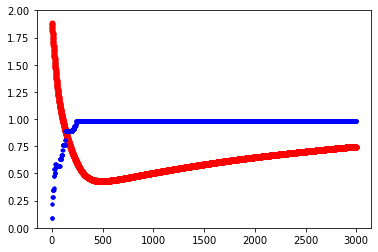

In [236]:
%matplotlib inline 

# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

# y_acc 에 학습 셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=5, label="loss")
plt.plot(x_len, y_acc, "o", c="blue", markersize=3, label="accuracy")

plt.ylim(0,2)
plt.show()

In [37]:
# class 와 낮은 상관관계를 가지는 feature 제거
data = pd.read_csv('../dataset/zoo.csv', usecols = ["hair","eggs","milk","backbone","aquatic","toothed",
    "breathes","airborne","venomous","tail","catsize","class_type"])
dataset = data.values
X = dataset[:,0:11]
Y_obj = dataset[:,11]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = tf.keras.utils.to_categorical(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.3)

model = Sequential()
model.add(Dense(32,  input_dim=11, activation='sigmoid'))
model.add(Dense(7, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

# 모델 실행
history = model.fit(X_train, Y_train, validation_split=0.33, epochs=400, batch_size=500)

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Train on 46 samples, validate on 24 samples
Epoch 1/400
46/46 [==============================] - 0s 1ms/step - loss: 1.9021 - accuracy: 0.2391 - val_loss: 1.9696 - val_accuracy: 0.2500
Epoch 2/400
46/46 [==============================] - 0s 22us/step - loss: 1.8875 - accuracy: 0.3043 - val_loss: 1.9527 - val_accuracy: 0.2500
Epoch 3/400
46/46 [==============================] - 0s 43us/step - loss: 1.8731 - accuracy: 0.3043 - val_loss: 1.9360 - val_accuracy: 0.2500
Epoch 4/400
46/46 [==============================] - 0s 22us/step - loss: 1.8590 - accuracy: 0.3043 - val_loss: 1.9196 - val_accuracy: 0.2500
Epoch 5/400
46/46 [==============================] - 0s 43us/step - loss: 1.8451 - accuracy: 0.3043 - val_loss: 1.9033 - val_accuracy: 0.2500
Epoch 6/400
46/46 [==============================] - 0s 43us/step - loss: 1.8315 - accuracy: 0.3043 - val_loss: 1.8873 - val_accuracy: 0.2500
Epoch 7/400
46/46 [==============================] - 0s 43us/step - loss: 1.8182 - accuracy: 0.3043 - val

Epoch 59/400
46/46 [==============================] - 0s 43us/step - loss: 1.4356 - accuracy: 0.5000 - val_loss: 1.3777 - val_accuracy: 0.6667
Epoch 60/400
46/46 [==============================] - 0s 43us/step - loss: 1.4316 - accuracy: 0.5000 - val_loss: 1.3730 - val_accuracy: 0.6667
Epoch 61/400
46/46 [==============================] - 0s 43us/step - loss: 1.4277 - accuracy: 0.5000 - val_loss: 1.3683 - val_accuracy: 0.6667
Epoch 62/400
46/46 [==============================] - 0s 43us/step - loss: 1.4238 - accuracy: 0.5000 - val_loss: 1.3637 - val_accuracy: 0.6667
Epoch 63/400
46/46 [==============================] - 0s 22us/step - loss: 1.4199 - accuracy: 0.5000 - val_loss: 1.3593 - val_accuracy: 0.6667
Epoch 64/400
46/46 [==============================] - 0s 44us/step - loss: 1.4161 - accuracy: 0.5000 - val_loss: 1.3549 - val_accuracy: 0.6667
Epoch 65/400
46/46 [==============================] - 0s 43us/step - loss: 1.4123 - accuracy: 0.5000 - val_loss: 1.3506 - val_accuracy: 0.6667

Epoch 117/400
46/46 [==============================] - 0s 43us/step - loss: 1.2234 - accuracy: 0.8043 - val_loss: 1.1714 - val_accuracy: 0.8333
Epoch 118/400
46/46 [==============================] - 0s 43us/step - loss: 1.2198 - accuracy: 0.8043 - val_loss: 1.1680 - val_accuracy: 0.8333
Epoch 119/400
46/46 [==============================] - 0s 43us/step - loss: 1.2162 - accuracy: 0.8043 - val_loss: 1.1647 - val_accuracy: 0.8333
Epoch 120/400
46/46 [==============================] - 0s 43us/step - loss: 1.2125 - accuracy: 0.8043 - val_loss: 1.1614 - val_accuracy: 0.8333
Epoch 121/400
46/46 [==============================] - 0s 43us/step - loss: 1.2089 - accuracy: 0.8043 - val_loss: 1.1581 - val_accuracy: 0.8333
Epoch 122/400
46/46 [==============================] - 0s 43us/step - loss: 1.2053 - accuracy: 0.8043 - val_loss: 1.1548 - val_accuracy: 0.8333
Epoch 123/400
46/46 [==============================] - 0s 22us/step - loss: 1.2017 - accuracy: 0.8043 - val_loss: 1.1515 - val_accuracy:

Epoch 174/400
46/46 [==============================] - 0s 22us/step - loss: 1.0172 - accuracy: 0.8478 - val_loss: 0.9849 - val_accuracy: 0.8333
Epoch 175/400
46/46 [==============================] - 0s 43us/step - loss: 1.0136 - accuracy: 0.8478 - val_loss: 0.9817 - val_accuracy: 0.8333
Epoch 176/400
46/46 [==============================] - 0s 43us/step - loss: 1.0100 - accuracy: 0.8478 - val_loss: 0.9786 - val_accuracy: 0.8333
Epoch 177/400
46/46 [==============================] - 0s 44us/step - loss: 1.0065 - accuracy: 0.8478 - val_loss: 0.9754 - val_accuracy: 0.8333
Epoch 178/400
46/46 [==============================] - 0s 43us/step - loss: 1.0029 - accuracy: 0.8478 - val_loss: 0.9723 - val_accuracy: 0.8333
Epoch 179/400
46/46 [==============================] - 0s 43us/step - loss: 0.9993 - accuracy: 0.8478 - val_loss: 0.9691 - val_accuracy: 0.8333
Epoch 180/400
46/46 [==============================] - 0s 43us/step - loss: 0.9958 - accuracy: 0.8478 - val_loss: 0.9660 - val_accuracy:

Epoch 231/400
46/46 [==============================] - 0s 43us/step - loss: 0.8225 - accuracy: 0.8478 - val_loss: 0.8163 - val_accuracy: 0.8750
Epoch 232/400
46/46 [==============================] - 0s 22us/step - loss: 0.8193 - accuracy: 0.8478 - val_loss: 0.8136 - val_accuracy: 0.8750
Epoch 233/400
46/46 [==============================] - 0s 42us/step - loss: 0.8161 - accuracy: 0.8478 - val_loss: 0.8110 - val_accuracy: 0.8750
Epoch 234/400
46/46 [==============================] - 0s 44us/step - loss: 0.8129 - accuracy: 0.8478 - val_loss: 0.8083 - val_accuracy: 0.8750
Epoch 235/400
46/46 [==============================] - 0s 87us/step - loss: 0.8097 - accuracy: 0.8478 - val_loss: 0.8056 - val_accuracy: 0.8750
Epoch 236/400
46/46 [==============================] - 0s 65us/step - loss: 0.8066 - accuracy: 0.8478 - val_loss: 0.8030 - val_accuracy: 0.8750
Epoch 237/400
46/46 [==============================] - 0s 43us/step - loss: 0.8034 - accuracy: 0.8478 - val_loss: 0.8003 - val_accuracy:

Epoch 288/400
46/46 [==============================] - 0s 43us/step - loss: 0.6568 - accuracy: 0.8696 - val_loss: 0.6798 - val_accuracy: 0.9167
Epoch 289/400
46/46 [==============================] - 0s 43us/step - loss: 0.6542 - accuracy: 0.8696 - val_loss: 0.6778 - val_accuracy: 0.9167
Epoch 290/400
46/46 [==============================] - 0s 65us/step - loss: 0.6516 - accuracy: 0.8696 - val_loss: 0.6757 - val_accuracy: 0.9167
Epoch 291/400
46/46 [==============================] - 0s 22us/step - loss: 0.6491 - accuracy: 0.8696 - val_loss: 0.6736 - val_accuracy: 0.9167
Epoch 292/400
46/46 [==============================] - 0s 43us/step - loss: 0.6465 - accuracy: 0.8696 - val_loss: 0.6716 - val_accuracy: 0.9167
Epoch 293/400
46/46 [==============================] - 0s 43us/step - loss: 0.6440 - accuracy: 0.8696 - val_loss: 0.6695 - val_accuracy: 0.9167
Epoch 294/400
46/46 [==============================] - 0s 43us/step - loss: 0.6414 - accuracy: 0.8696 - val_loss: 0.6675 - val_accuracy:

Epoch 345/400
46/46 [==============================] - 0s 43us/step - loss: 0.5255 - accuracy: 0.8913 - val_loss: 0.5774 - val_accuracy: 0.9167
Epoch 346/400
46/46 [==============================] - 0s 43us/step - loss: 0.5235 - accuracy: 0.8913 - val_loss: 0.5759 - val_accuracy: 0.9167
Epoch 347/400
46/46 [==============================] - 0s 22us/step - loss: 0.5215 - accuracy: 0.8913 - val_loss: 0.5744 - val_accuracy: 0.9167
Epoch 348/400
46/46 [==============================] - 0s 43us/step - loss: 0.5195 - accuracy: 0.8913 - val_loss: 0.5729 - val_accuracy: 0.9167
Epoch 349/400
46/46 [==============================] - 0s 22us/step - loss: 0.5175 - accuracy: 0.8913 - val_loss: 0.5714 - val_accuracy: 0.9167
Epoch 350/400
46/46 [==============================] - 0s 43us/step - loss: 0.5155 - accuracy: 0.8913 - val_loss: 0.5699 - val_accuracy: 0.9167
Epoch 351/400
46/46 [==============================] - 0s 43us/step - loss: 0.5135 - accuracy: 0.8913 - val_loss: 0.5684 - val_accuracy:

In [47]:
# class 와 낮은 상관관계를 가지는 feature 제거
data = pd.read_csv('../dataset/zoo.csv', usecols = ["hair","eggs","milk","backbone","aquatic","toothed",
    "breathes","airborne","venomous","tail","catsize","class_type"])
dataset = data.values
X = dataset[:,0:11]
Y_obj = dataset[:,11]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = tf.keras.utils.to_categorical(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.3)

model = Sequential()
model.add(Dense(32,  input_dim=11, activation='relu'))
model.add(Dense(7, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

# 모델 실행
history = model.fit(X_train, Y_train, validation_split=0.33, epochs=400, batch_size=500)

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Train on 46 samples, validate on 24 samples
Epoch 1/400
46/46 [==============================] - 0s 2ms/step - loss: 1.9434 - accuracy: 0.1304 - val_loss: 1.8194 - val_accuracy: 0.2083
Epoch 2/400
46/46 [==============================] - 0s 44us/step - loss: 1.9313 - accuracy: 0.1304 - val_loss: 1.8067 - val_accuracy: 0.2083
Epoch 3/400
46/46 [==============================] - 0s 43us/step - loss: 1.9194 - accuracy: 0.1304 - val_loss: 1.7952 - val_accuracy: 0.2083
Epoch 4/400
46/46 [==============================] - 0s 43us/step - loss: 1.9086 - accuracy: 0.1739 - val_loss: 1.7827 - val_accuracy: 0.2083
Epoch 5/400
46/46 [==============================] - 0s 43us/step - loss: 1.8969 - accuracy: 0.1739 - val_loss: 1.7703 - val_accuracy: 0.2083
Epoch 6/400
46/46 [==============================] - 0s 43us/step - loss: 1.8853 - accuracy: 0.1739 - val_loss: 1.7580 - val_accuracy: 0.2500
Epoch 7/400
46/46 [==============================] - 0s 65us/step - loss: 1.8738 - accuracy: 0.1739 - val

Epoch 59/400
46/46 [==============================] - 0s 65us/step - loss: 1.3374 - accuracy: 0.6957 - val_loss: 1.1685 - val_accuracy: 0.8333
Epoch 60/400
46/46 [==============================] - 0s 43us/step - loss: 1.3271 - accuracy: 0.6957 - val_loss: 1.1576 - val_accuracy: 0.8333
Epoch 61/400
46/46 [==============================] - 0s 22us/step - loss: 1.3170 - accuracy: 0.6957 - val_loss: 1.1468 - val_accuracy: 0.8333
Epoch 62/400
46/46 [==============================] - 0s 43us/step - loss: 1.3069 - accuracy: 0.6957 - val_loss: 1.1359 - val_accuracy: 0.8333
Epoch 63/400
46/46 [==============================] - 0s 22us/step - loss: 1.2968 - accuracy: 0.6957 - val_loss: 1.1251 - val_accuracy: 0.8333
Epoch 64/400
46/46 [==============================] - 0s 43us/step - loss: 1.2867 - accuracy: 0.6957 - val_loss: 1.1143 - val_accuracy: 0.8750
Epoch 65/400
46/46 [==============================] - 0s 43us/step - loss: 1.2766 - accuracy: 0.7391 - val_loss: 1.1035 - val_accuracy: 0.8750

Epoch 117/400
46/46 [==============================] - 0s 22us/step - loss: 0.8443 - accuracy: 0.7826 - val_loss: 0.6725 - val_accuracy: 0.8750
Epoch 118/400
46/46 [==============================] - 0s 43us/step - loss: 0.8381 - accuracy: 0.7826 - val_loss: 0.6671 - val_accuracy: 0.8750
Epoch 119/400
46/46 [==============================] - 0s 65us/step - loss: 0.8318 - accuracy: 0.7826 - val_loss: 0.6619 - val_accuracy: 0.8750
Epoch 120/400
46/46 [==============================] - 0s 44us/step - loss: 0.8256 - accuracy: 0.7826 - val_loss: 0.6566 - val_accuracy: 0.8750
Epoch 121/400
46/46 [==============================] - 0s 43us/step - loss: 0.8195 - accuracy: 0.7826 - val_loss: 0.6515 - val_accuracy: 0.8750
Epoch 122/400
46/46 [==============================] - 0s 43us/step - loss: 0.8133 - accuracy: 0.8043 - val_loss: 0.6464 - val_accuracy: 0.8750
Epoch 123/400
46/46 [==============================] - 0s 43us/step - loss: 0.8073 - accuracy: 0.8043 - val_loss: 0.6416 - val_accuracy:

Epoch 174/400
46/46 [==============================] - 0s 21us/step - loss: 0.5588 - accuracy: 0.8696 - val_loss: 0.4644 - val_accuracy: 0.8750
Epoch 175/400
46/46 [==============================] - 0s 43us/step - loss: 0.5549 - accuracy: 0.8696 - val_loss: 0.4617 - val_accuracy: 0.8750
Epoch 176/400
46/46 [==============================] - 0s 43us/step - loss: 0.5511 - accuracy: 0.8696 - val_loss: 0.4590 - val_accuracy: 0.8750
Epoch 177/400
46/46 [==============================] - 0s 43us/step - loss: 0.5472 - accuracy: 0.8696 - val_loss: 0.4564 - val_accuracy: 0.8750
Epoch 178/400
46/46 [==============================] - 0s 21us/step - loss: 0.5435 - accuracy: 0.8696 - val_loss: 0.4538 - val_accuracy: 0.8750
Epoch 179/400
46/46 [==============================] - 0s 43us/step - loss: 0.5397 - accuracy: 0.8696 - val_loss: 0.4511 - val_accuracy: 0.8750
Epoch 180/400
46/46 [==============================] - 0s 43us/step - loss: 0.5359 - accuracy: 0.8696 - val_loss: 0.4485 - val_accuracy:

Epoch 231/400
46/46 [==============================] - 0s 43us/step - loss: 0.3803 - accuracy: 0.9348 - val_loss: 0.3364 - val_accuracy: 0.9583
Epoch 232/400
46/46 [==============================] - 0s 43us/step - loss: 0.3779 - accuracy: 0.9348 - val_loss: 0.3345 - val_accuracy: 0.9583
Epoch 233/400
46/46 [==============================] - 0s 43us/step - loss: 0.3755 - accuracy: 0.9348 - val_loss: 0.3326 - val_accuracy: 0.9583
Epoch 234/400
46/46 [==============================] - 0s 43us/step - loss: 0.3730 - accuracy: 0.9348 - val_loss: 0.3307 - val_accuracy: 0.9583
Epoch 235/400
46/46 [==============================] - 0s 43us/step - loss: 0.3706 - accuracy: 0.9348 - val_loss: 0.3288 - val_accuracy: 0.9583
Epoch 236/400
46/46 [==============================] - 0s 44us/step - loss: 0.3683 - accuracy: 0.9348 - val_loss: 0.3270 - val_accuracy: 0.9583
Epoch 237/400
46/46 [==============================] - 0s 43us/step - loss: 0.3659 - accuracy: 0.9348 - val_loss: 0.3252 - val_accuracy:

Epoch 288/400
46/46 [==============================] - 0s 43us/step - loss: 0.2717 - accuracy: 0.9348 - val_loss: 0.2519 - val_accuracy: 0.9583
Epoch 289/400
46/46 [==============================] - 0s 21us/step - loss: 0.2703 - accuracy: 0.9348 - val_loss: 0.2508 - val_accuracy: 0.9583
Epoch 290/400
46/46 [==============================] - 0s 43us/step - loss: 0.2689 - accuracy: 0.9348 - val_loss: 0.2497 - val_accuracy: 0.9583
Epoch 291/400
46/46 [==============================] - 0s 43us/step - loss: 0.2675 - accuracy: 0.9348 - val_loss: 0.2487 - val_accuracy: 0.9583
Epoch 292/400
46/46 [==============================] - 0s 43us/step - loss: 0.2661 - accuracy: 0.9348 - val_loss: 0.2476 - val_accuracy: 0.9583
Epoch 293/400
46/46 [==============================] - 0s 22us/step - loss: 0.2647 - accuracy: 0.9348 - val_loss: 0.2465 - val_accuracy: 0.9583
Epoch 294/400
46/46 [==============================] - 0s 43us/step - loss: 0.2634 - accuracy: 0.9348 - val_loss: 0.2454 - val_accuracy:

Epoch 345/400
46/46 [==============================] - 0s 21us/step - loss: 0.2077 - accuracy: 0.9565 - val_loss: 0.2048 - val_accuracy: 0.9167
Epoch 346/400
46/46 [==============================] - 0s 43us/step - loss: 0.2068 - accuracy: 0.9565 - val_loss: 0.2042 - val_accuracy: 0.9167
Epoch 347/400
46/46 [==============================] - 0s 22us/step - loss: 0.2060 - accuracy: 0.9565 - val_loss: 0.2036 - val_accuracy: 0.9167
Epoch 348/400
46/46 [==============================] - 0s 43us/step - loss: 0.2051 - accuracy: 0.9565 - val_loss: 0.2030 - val_accuracy: 0.9167
Epoch 349/400
46/46 [==============================] - 0s 22us/step - loss: 0.2043 - accuracy: 0.9565 - val_loss: 0.2024 - val_accuracy: 0.9167
Epoch 350/400
46/46 [==============================] - 0s 43us/step - loss: 0.2034 - accuracy: 0.9565 - val_loss: 0.2019 - val_accuracy: 0.9167
Epoch 351/400
46/46 [==============================] - 0s 23us/step - loss: 0.2026 - accuracy: 0.9565 - val_loss: 0.2013 - val_accuracy:

In [38]:
# class 와 낮은 상관관계를 가지는 feature 제거
data = pd.read_csv('../dataset/zoo.csv', usecols = ["hair","eggs","milk","backbone","aquatic","toothed",
    "breathes","airborne","venomous","tail","catsize","class_type"])
dataset = data.values
X = dataset[:,0:11]
Y_obj = dataset[:,11]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = tf.keras.utils.to_categorical(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.3)

model = Sequential()
model.add(Dense(32,  input_dim=11, activation='tanh'))
model.add(Dense(7, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

# 모델 실행
history = model.fit(X_train, Y_train, validation_split=0.33, epochs=400, batch_size=500)

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Train on 46 samples, validate on 24 samples
Epoch 1/400
46/46 [==============================] - 0s 1ms/step - loss: 2.2678 - accuracy: 0.1304 - val_loss: 2.1196 - val_accuracy: 0.2083
Epoch 2/400
46/46 [==============================] - 0s 43us/step - loss: 2.2404 - accuracy: 0.1304 - val_loss: 2.0964 - val_accuracy: 0.2083
Epoch 3/400
46/46 [==============================] - 0s 44us/step - loss: 2.2132 - accuracy: 0.1304 - val_loss: 2.0736 - val_accuracy: 0.2083
Epoch 4/400
46/46 [==============================] - 0s 43us/step - loss: 2.1864 - accuracy: 0.1304 - val_loss: 2.0510 - val_accuracy: 0.2083
Epoch 5/400
46/46 [==============================] - 0s 87us/step - loss: 2.1599 - accuracy: 0.1304 - val_loss: 2.0288 - val_accuracy: 0.2083
Epoch 6/400
46/46 [==============================] - 0s 43us/step - loss: 2.1336 - accuracy: 0.0870 - val_loss: 2.0068 - val_accuracy: 0.2083
Epoch 7/400
46/46 [==============================] - 0s 43us/step - loss: 2.1077 - accuracy: 0.0870 - val

Epoch 59/400
46/46 [==============================] - 0s 22us/step - loss: 1.1952 - accuracy: 0.5870 - val_loss: 1.2204 - val_accuracy: 0.5417
Epoch 60/400
46/46 [==============================] - 0s 43us/step - loss: 1.1850 - accuracy: 0.5870 - val_loss: 1.2115 - val_accuracy: 0.5417
Epoch 61/400
46/46 [==============================] - 0s 43us/step - loss: 1.1750 - accuracy: 0.5870 - val_loss: 1.2028 - val_accuracy: 0.5417
Epoch 62/400
46/46 [==============================] - 0s 43us/step - loss: 1.1652 - accuracy: 0.5870 - val_loss: 1.1941 - val_accuracy: 0.5417
Epoch 63/400
46/46 [==============================] - 0s 43us/step - loss: 1.1556 - accuracy: 0.5870 - val_loss: 1.1856 - val_accuracy: 0.6250
Epoch 64/400
46/46 [==============================] - 0s 22us/step - loss: 1.1461 - accuracy: 0.6304 - val_loss: 1.1772 - val_accuracy: 0.6250
Epoch 65/400
46/46 [==============================] - 0s 22us/step - loss: 1.1367 - accuracy: 0.6304 - val_loss: 1.1689 - val_accuracy: 0.6250

Epoch 117/400
46/46 [==============================] - 0s 43us/step - loss: 0.7746 - accuracy: 0.8261 - val_loss: 0.8219 - val_accuracy: 0.7500
Epoch 118/400
46/46 [==============================] - 0s 22us/step - loss: 0.7692 - accuracy: 0.8261 - val_loss: 0.8164 - val_accuracy: 0.7500
Epoch 119/400
46/46 [==============================] - 0s 43us/step - loss: 0.7638 - accuracy: 0.8261 - val_loss: 0.8110 - val_accuracy: 0.7500
Epoch 120/400
46/46 [==============================] - 0s 43us/step - loss: 0.7585 - accuracy: 0.8261 - val_loss: 0.8056 - val_accuracy: 0.7500
Epoch 121/400
46/46 [==============================] - 0s 22us/step - loss: 0.7532 - accuracy: 0.8261 - val_loss: 0.8002 - val_accuracy: 0.7500
Epoch 122/400
46/46 [==============================] - 0s 47us/step - loss: 0.7480 - accuracy: 0.8261 - val_loss: 0.7949 - val_accuracy: 0.7500
Epoch 123/400
46/46 [==============================] - 0s 21us/step - loss: 0.7428 - accuracy: 0.8261 - val_loss: 0.7896 - val_accuracy:

Epoch 174/400
46/46 [==============================] - 0s 43us/step - loss: 0.5272 - accuracy: 0.8913 - val_loss: 0.5664 - val_accuracy: 0.9167
Epoch 175/400
46/46 [==============================] - 0s 43us/step - loss: 0.5238 - accuracy: 0.8913 - val_loss: 0.5628 - val_accuracy: 0.9167
Epoch 176/400
46/46 [==============================] - 0s 43us/step - loss: 0.5204 - accuracy: 0.8913 - val_loss: 0.5593 - val_accuracy: 0.9167
Epoch 177/400
46/46 [==============================] - 0s 22us/step - loss: 0.5171 - accuracy: 0.8913 - val_loss: 0.5557 - val_accuracy: 0.9167
Epoch 178/400
46/46 [==============================] - 0s 43us/step - loss: 0.5138 - accuracy: 0.8913 - val_loss: 0.5522 - val_accuracy: 0.9167
Epoch 179/400
46/46 [==============================] - 0s 43us/step - loss: 0.5106 - accuracy: 0.8913 - val_loss: 0.5488 - val_accuracy: 0.9167
Epoch 180/400
46/46 [==============================] - 0s 43us/step - loss: 0.5073 - accuracy: 0.8913 - val_loss: 0.5453 - val_accuracy:

Epoch 231/400
46/46 [==============================] - 0s 43us/step - loss: 0.3722 - accuracy: 0.9130 - val_loss: 0.4006 - val_accuracy: 0.9167
Epoch 232/400
46/46 [==============================] - 0s 43us/step - loss: 0.3700 - accuracy: 0.9130 - val_loss: 0.3983 - val_accuracy: 0.9167
Epoch 233/400
46/46 [==============================] - 0s 21us/step - loss: 0.3679 - accuracy: 0.9130 - val_loss: 0.3960 - val_accuracy: 0.9167
Epoch 234/400
46/46 [==============================] - 0s 43us/step - loss: 0.3658 - accuracy: 0.9130 - val_loss: 0.3937 - val_accuracy: 0.9167
Epoch 235/400
46/46 [==============================] - 0s 43us/step - loss: 0.3637 - accuracy: 0.9130 - val_loss: 0.3915 - val_accuracy: 0.9167
Epoch 236/400
46/46 [==============================] - 0s 43us/step - loss: 0.3616 - accuracy: 0.9130 - val_loss: 0.3892 - val_accuracy: 0.9167
Epoch 237/400
46/46 [==============================] - 0s 43us/step - loss: 0.3596 - accuracy: 0.9130 - val_loss: 0.3870 - val_accuracy:

Epoch 288/400
46/46 [==============================] - 0s 43us/step - loss: 0.2725 - accuracy: 0.9783 - val_loss: 0.2947 - val_accuracy: 0.9583
Epoch 289/400
46/46 [==============================] - 0s 43us/step - loss: 0.2711 - accuracy: 0.9783 - val_loss: 0.2933 - val_accuracy: 0.9583
Epoch 290/400
46/46 [==============================] - 0s 43us/step - loss: 0.2697 - accuracy: 0.9783 - val_loss: 0.2918 - val_accuracy: 0.9583
Epoch 291/400
46/46 [==============================] - 0s 43us/step - loss: 0.2684 - accuracy: 0.9783 - val_loss: 0.2904 - val_accuracy: 0.9583
Epoch 292/400
46/46 [==============================] - 0s 22us/step - loss: 0.2670 - accuracy: 0.9783 - val_loss: 0.2890 - val_accuracy: 0.9583
Epoch 293/400
46/46 [==============================] - 0s 43us/step - loss: 0.2656 - accuracy: 0.9783 - val_loss: 0.2875 - val_accuracy: 0.9583
Epoch 294/400
46/46 [==============================] - 0s 43us/step - loss: 0.2643 - accuracy: 0.9783 - val_loss: 0.2861 - val_accuracy:

Epoch 345/400
46/46 [==============================] - 0s 43us/step - loss: 0.2064 - accuracy: 0.9783 - val_loss: 0.2273 - val_accuracy: 0.9583
Epoch 346/400
46/46 [==============================] - 0s 22us/step - loss: 0.2054 - accuracy: 0.9783 - val_loss: 0.2264 - val_accuracy: 0.9583
Epoch 347/400
46/46 [==============================] - 0s 44us/step - loss: 0.2045 - accuracy: 0.9783 - val_loss: 0.2255 - val_accuracy: 0.9583
Epoch 348/400
46/46 [==============================] - 0s 43us/step - loss: 0.2035 - accuracy: 0.9783 - val_loss: 0.2245 - val_accuracy: 0.9583
Epoch 349/400
46/46 [==============================] - 0s 44us/step - loss: 0.2026 - accuracy: 0.9783 - val_loss: 0.2236 - val_accuracy: 0.9583
Epoch 350/400
46/46 [==============================] - 0s 44us/step - loss: 0.2017 - accuracy: 0.9783 - val_loss: 0.2227 - val_accuracy: 0.9583
Epoch 351/400
46/46 [==============================] - 0s 21us/step - loss: 0.2008 - accuracy: 0.9783 - val_loss: 0.2218 - val_accuracy:

In [49]:
# class 와 낮은 상관관계를 가지는 feature 제거
data = pd.read_csv('../dataset/zoo.csv', usecols = ["hair","eggs","milk","backbone","aquatic","toothed",
    "breathes","airborne","venomous","tail","catsize","class_type"])
dataset = data.values
X = dataset[:,0:11]
Y_obj = dataset[:,11]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = tf.keras.utils.to_categorical(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.3)

model = Sequential()
model.add(Dense(32,  input_dim=11, activation='selu'))
model.add(Dense(7, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

# 모델 실행
history = model.fit(X_train, Y_train, validation_split=0.33, epochs=400, batch_size=500)

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Train on 46 samples, validate on 24 samples
Epoch 1/400
46/46 [==============================] - 0s 2ms/step - loss: 2.0405 - accuracy: 0.0870 - val_loss: 1.9027 - val_accuracy: 0.0833
Epoch 2/400
46/46 [==============================] - 0s 43us/step - loss: 2.0059 - accuracy: 0.1087 - val_loss: 1.8623 - val_accuracy: 0.4167
Epoch 3/400
46/46 [==============================] - 0s 22us/step - loss: 1.9718 - accuracy: 0.3043 - val_loss: 1.8262 - val_accuracy: 0.4167
Epoch 4/400
46/46 [==============================] - 0s 65us/step - loss: 1.9413 - accuracy: 0.3261 - val_loss: 1.7871 - val_accuracy: 0.4583
Epoch 5/400
46/46 [==============================] - 0s 44us/step - loss: 1.9082 - accuracy: 0.3696 - val_loss: 1.7505 - val_accuracy: 0.5000
Epoch 6/400
46/46 [==============================] - 0s 43us/step - loss: 1.8772 - accuracy: 0.3696 - val_loss: 1.7136 - val_accuracy: 0.5000
Epoch 7/400
46/46 [==============================] - 0s 43us/step - loss: 1.8455 - accuracy: 0.3478 - val

Epoch 59/400
46/46 [==============================] - 0s 43us/step - loss: 0.9408 - accuracy: 0.7391 - val_loss: 0.8543 - val_accuracy: 0.7917
Epoch 60/400
46/46 [==============================] - 0s 65us/step - loss: 0.9320 - accuracy: 0.7391 - val_loss: 0.8489 - val_accuracy: 0.7917
Epoch 61/400
46/46 [==============================] - 0s 43us/step - loss: 0.9234 - accuracy: 0.7391 - val_loss: 0.8436 - val_accuracy: 0.7917
Epoch 62/400
46/46 [==============================] - 0s 43us/step - loss: 0.9150 - accuracy: 0.7391 - val_loss: 0.8384 - val_accuracy: 0.7917
Epoch 63/400
46/46 [==============================] - 0s 65us/step - loss: 0.9067 - accuracy: 0.7391 - val_loss: 0.8334 - val_accuracy: 0.7917
Epoch 64/400
46/46 [==============================] - 0s 43us/step - loss: 0.8985 - accuracy: 0.7391 - val_loss: 0.8284 - val_accuracy: 0.7917
Epoch 65/400
46/46 [==============================] - 0s 43us/step - loss: 0.8904 - accuracy: 0.7609 - val_loss: 0.8235 - val_accuracy: 0.7917

Epoch 117/400
46/46 [==============================] - 0s 44us/step - loss: 0.5781 - accuracy: 0.8696 - val_loss: 0.6528 - val_accuracy: 0.7917
Epoch 118/400
46/46 [==============================] - 0s 43us/step - loss: 0.5736 - accuracy: 0.8696 - val_loss: 0.6506 - val_accuracy: 0.7917
Epoch 119/400
46/46 [==============================] - 0s 43us/step - loss: 0.5691 - accuracy: 0.8696 - val_loss: 0.6484 - val_accuracy: 0.7917
Epoch 120/400
46/46 [==============================] - 0s 43us/step - loss: 0.5647 - accuracy: 0.9130 - val_loss: 0.6462 - val_accuracy: 0.7917
Epoch 121/400
46/46 [==============================] - 0s 22us/step - loss: 0.5603 - accuracy: 0.9130 - val_loss: 0.6441 - val_accuracy: 0.7917
Epoch 122/400
46/46 [==============================] - 0s 43us/step - loss: 0.5560 - accuracy: 0.9130 - val_loss: 0.6419 - val_accuracy: 0.7917
Epoch 123/400
46/46 [==============================] - 0s 43us/step - loss: 0.5516 - accuracy: 0.9130 - val_loss: 0.6398 - val_accuracy:

Epoch 174/400
46/46 [==============================] - 0s 43us/step - loss: 0.3752 - accuracy: 0.9348 - val_loss: 0.5591 - val_accuracy: 0.7917
Epoch 175/400
46/46 [==============================] - 0s 43us/step - loss: 0.3725 - accuracy: 0.9348 - val_loss: 0.5580 - val_accuracy: 0.7917
Epoch 176/400
46/46 [==============================] - 0s 44us/step - loss: 0.3698 - accuracy: 0.9348 - val_loss: 0.5569 - val_accuracy: 0.7917
Epoch 177/400
46/46 [==============================] - 0s 22us/step - loss: 0.3672 - accuracy: 0.9348 - val_loss: 0.5558 - val_accuracy: 0.7917
Epoch 178/400
46/46 [==============================] - 0s 43us/step - loss: 0.3645 - accuracy: 0.9348 - val_loss: 0.5547 - val_accuracy: 0.7917
Epoch 179/400
46/46 [==============================] - 0s 43us/step - loss: 0.3619 - accuracy: 0.9348 - val_loss: 0.5537 - val_accuracy: 0.7917
Epoch 180/400
46/46 [==============================] - 0s 43us/step - loss: 0.3593 - accuracy: 0.9348 - val_loss: 0.5526 - val_accuracy:

Epoch 231/400
46/46 [==============================] - 0s 43us/step - loss: 0.2527 - accuracy: 0.9348 - val_loss: 0.5160 - val_accuracy: 0.7917
Epoch 232/400
46/46 [==============================] - 0s 43us/step - loss: 0.2511 - accuracy: 0.9348 - val_loss: 0.5155 - val_accuracy: 0.7917
Epoch 233/400
46/46 [==============================] - 0s 43us/step - loss: 0.2495 - accuracy: 0.9348 - val_loss: 0.5150 - val_accuracy: 0.7917
Epoch 234/400
46/46 [==============================] - 0s 44us/step - loss: 0.2478 - accuracy: 0.9348 - val_loss: 0.5145 - val_accuracy: 0.7917
Epoch 235/400
46/46 [==============================] - 0s 43us/step - loss: 0.2463 - accuracy: 0.9348 - val_loss: 0.5140 - val_accuracy: 0.7917
Epoch 236/400
46/46 [==============================] - 0s 65us/step - loss: 0.2447 - accuracy: 0.9348 - val_loss: 0.5135 - val_accuracy: 0.7917
Epoch 237/400
46/46 [==============================] - 0s 65us/step - loss: 0.2431 - accuracy: 0.9348 - val_loss: 0.5130 - val_accuracy:

Epoch 288/400
46/46 [==============================] - 0s 22us/step - loss: 0.1799 - accuracy: 0.9783 - val_loss: 0.5018 - val_accuracy: 0.7500
Epoch 289/400
46/46 [==============================] - 0s 43us/step - loss: 0.1790 - accuracy: 0.9783 - val_loss: 0.5019 - val_accuracy: 0.7500
Epoch 290/400
46/46 [==============================] - 0s 43us/step - loss: 0.1780 - accuracy: 0.9783 - val_loss: 0.5019 - val_accuracy: 0.7500
Epoch 291/400
46/46 [==============================] - 0s 43us/step - loss: 0.1771 - accuracy: 0.9783 - val_loss: 0.5019 - val_accuracy: 0.7500
Epoch 292/400
46/46 [==============================] - 0s 43us/step - loss: 0.1761 - accuracy: 0.9783 - val_loss: 0.5019 - val_accuracy: 0.7500
Epoch 293/400
46/46 [==============================] - 0s 43us/step - loss: 0.1752 - accuracy: 0.9783 - val_loss: 0.5020 - val_accuracy: 0.7500
Epoch 294/400
46/46 [==============================] - 0s 43us/step - loss: 0.1743 - accuracy: 0.9783 - val_loss: 0.5020 - val_accuracy:

Epoch 345/400
46/46 [==============================] - 0s 43us/step - loss: 0.1367 - accuracy: 0.9783 - val_loss: 0.5118 - val_accuracy: 0.7917
Epoch 346/400
46/46 [==============================] - 0s 43us/step - loss: 0.1361 - accuracy: 0.9783 - val_loss: 0.5121 - val_accuracy: 0.7917
Epoch 347/400
46/46 [==============================] - 0s 22us/step - loss: 0.1355 - accuracy: 0.9783 - val_loss: 0.5124 - val_accuracy: 0.7917
Epoch 348/400
46/46 [==============================] - 0s 43us/step - loss: 0.1350 - accuracy: 0.9783 - val_loss: 0.5128 - val_accuracy: 0.7917
Epoch 349/400
46/46 [==============================] - 0s 43us/step - loss: 0.1344 - accuracy: 0.9783 - val_loss: 0.5131 - val_accuracy: 0.7917
Epoch 350/400
46/46 [==============================] - 0s 43us/step - loss: 0.1338 - accuracy: 0.9783 - val_loss: 0.5134 - val_accuracy: 0.7917
Epoch 351/400
46/46 [==============================] - 0s 43us/step - loss: 0.1333 - accuracy: 0.9783 - val_loss: 0.5137 - val_accuracy:

In [42]:
# class 와 낮은 상관관계를 가지는 feature 제거
data = pd.read_csv('../dataset/zoo.csv', usecols = ["hair","eggs","milk","backbone","aquatic","toothed",
    "breathes","airborne","venomous","tail","catsize","class_type"])
dataset = data.values
X = dataset[:,0:11]
Y_obj = dataset[:,11]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = tf.keras.utils.to_categorical(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.3)

model = Sequential()
model.add(Dense(32,  input_dim=11, activation='elu'))
model.add(Dense(7, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

# 모델 실행
history = model.fit(X_train, Y_train, validation_split=0.33, epochs=400, batch_size=500)

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Train on 46 samples, validate on 24 samples
Epoch 1/400
46/46 [==============================] - 0s 2ms/step - loss: 2.1088 - accuracy: 0.0652 - val_loss: 2.1548 - val_accuracy: 0.0000e+00
Epoch 2/400
46/46 [==============================] - 0s 43us/step - loss: 2.0862 - accuracy: 0.0652 - val_loss: 2.1310 - val_accuracy: 0.0000e+00
Epoch 3/400
46/46 [==============================] - 0s 43us/step - loss: 2.0560 - accuracy: 0.0217 - val_loss: 2.1076 - val_accuracy: 0.0000e+00
Epoch 4/400
46/46 [==============================] - 0s 43us/step - loss: 2.0263 - accuracy: 0.0217 - val_loss: 2.0846 - val_accuracy: 0.0000e+00
Epoch 5/400
46/46 [==============================] - 0s 44us/step - loss: 1.9969 - accuracy: 0.0217 - val_loss: 2.0619 - val_accuracy: 0.0417
Epoch 6/400
46/46 [==============================] - 0s 65us/step - loss: 1.9679 - accuracy: 0.1087 - val_loss: 2.0396 - val_accuracy: 0.0417
Epoch 7/400
46/46 [==============================] - 0s 20us/step - loss: 1.9394 - accura

Epoch 58/400
46/46 [==============================] - 0s 43us/step - loss: 1.0419 - accuracy: 0.7391 - val_loss: 1.3227 - val_accuracy: 0.5000
Epoch 59/400
46/46 [==============================] - 0s 43us/step - loss: 1.0321 - accuracy: 0.7391 - val_loss: 1.3137 - val_accuracy: 0.5000
Epoch 60/400
46/46 [==============================] - 0s 43us/step - loss: 1.0226 - accuracy: 0.7391 - val_loss: 1.3048 - val_accuracy: 0.5000
Epoch 61/400
46/46 [==============================] - 0s 44us/step - loss: 1.0132 - accuracy: 0.7391 - val_loss: 1.2958 - val_accuracy: 0.5000
Epoch 62/400
46/46 [==============================] - 0s 43us/step - loss: 1.0038 - accuracy: 0.7391 - val_loss: 1.2869 - val_accuracy: 0.5000
Epoch 63/400
46/46 [==============================] - 0s 22us/step - loss: 0.9946 - accuracy: 0.7391 - val_loss: 1.2781 - val_accuracy: 0.5000
Epoch 64/400
46/46 [==============================] - 0s 43us/step - loss: 0.9855 - accuracy: 0.7391 - val_loss: 1.2693 - val_accuracy: 0.5000

Epoch 116/400
46/46 [==============================] - 0s 43us/step - loss: 0.6379 - accuracy: 0.9130 - val_loss: 0.9032 - val_accuracy: 0.7917
Epoch 117/400
46/46 [==============================] - 0s 43us/step - loss: 0.6329 - accuracy: 0.9130 - val_loss: 0.8978 - val_accuracy: 0.7917
Epoch 118/400
46/46 [==============================] - 0s 43us/step - loss: 0.6279 - accuracy: 0.9130 - val_loss: 0.8924 - val_accuracy: 0.7917
Epoch 119/400
46/46 [==============================] - 0s 22us/step - loss: 0.6230 - accuracy: 0.9130 - val_loss: 0.8870 - val_accuracy: 0.7917
Epoch 120/400
46/46 [==============================] - 0s 43us/step - loss: 0.6181 - accuracy: 0.9130 - val_loss: 0.8817 - val_accuracy: 0.7917
Epoch 121/400
46/46 [==============================] - 0s 43us/step - loss: 0.6133 - accuracy: 0.9130 - val_loss: 0.8765 - val_accuracy: 0.7917
Epoch 122/400
46/46 [==============================] - 0s 22us/step - loss: 0.6086 - accuracy: 0.9130 - val_loss: 0.8713 - val_accuracy:

Epoch 173/400
46/46 [==============================] - 0s 43us/step - loss: 0.4156 - accuracy: 0.9348 - val_loss: 0.6612 - val_accuracy: 0.8750
Epoch 174/400
46/46 [==============================] - 0s 43us/step - loss: 0.4126 - accuracy: 0.9348 - val_loss: 0.6580 - val_accuracy: 0.8750
Epoch 175/400
46/46 [==============================] - 0s 43us/step - loss: 0.4097 - accuracy: 0.9348 - val_loss: 0.6549 - val_accuracy: 0.8750
Epoch 176/400
46/46 [==============================] - 0s 22us/step - loss: 0.4068 - accuracy: 0.9348 - val_loss: 0.6517 - val_accuracy: 0.8750
Epoch 177/400
46/46 [==============================] - 0s 22us/step - loss: 0.4039 - accuracy: 0.9348 - val_loss: 0.6486 - val_accuracy: 0.8750
Epoch 178/400
46/46 [==============================] - 0s 43us/step - loss: 0.4011 - accuracy: 0.9348 - val_loss: 0.6455 - val_accuracy: 0.8750
Epoch 179/400
46/46 [==============================] - 0s 22us/step - loss: 0.3983 - accuracy: 0.9348 - val_loss: 0.6425 - val_accuracy:

Epoch 230/400
46/46 [==============================] - 0s 22us/step - loss: 0.2832 - accuracy: 0.9348 - val_loss: 0.5179 - val_accuracy: 0.8750
Epoch 231/400
46/46 [==============================] - 0s 43us/step - loss: 0.2814 - accuracy: 0.9348 - val_loss: 0.5159 - val_accuracy: 0.8750
Epoch 232/400
46/46 [==============================] - 0s 43us/step - loss: 0.2796 - accuracy: 0.9348 - val_loss: 0.5140 - val_accuracy: 0.8750
Epoch 233/400
46/46 [==============================] - 0s 43us/step - loss: 0.2779 - accuracy: 0.9348 - val_loss: 0.5121 - val_accuracy: 0.8750
Epoch 234/400
46/46 [==============================] - 0s 22us/step - loss: 0.2761 - accuracy: 0.9348 - val_loss: 0.5102 - val_accuracy: 0.8750
Epoch 235/400
46/46 [==============================] - 0s 22us/step - loss: 0.2744 - accuracy: 0.9348 - val_loss: 0.5083 - val_accuracy: 0.8750
Epoch 236/400
46/46 [==============================] - 0s 43us/step - loss: 0.2727 - accuracy: 0.9348 - val_loss: 0.5065 - val_accuracy:

Epoch 287/400
46/46 [==============================] - 0s 22us/step - loss: 0.2013 - accuracy: 0.9783 - val_loss: 0.4292 - val_accuracy: 0.8750
Epoch 288/400
46/46 [==============================] - 0s 43us/step - loss: 0.2002 - accuracy: 0.9783 - val_loss: 0.4280 - val_accuracy: 0.8750
Epoch 289/400
46/46 [==============================] - 0s 22us/step - loss: 0.1991 - accuracy: 0.9783 - val_loss: 0.4268 - val_accuracy: 0.8750
Epoch 290/400
46/46 [==============================] - 0s 43us/step - loss: 0.1980 - accuracy: 0.9783 - val_loss: 0.4256 - val_accuracy: 0.8750
Epoch 291/400
46/46 [==============================] - 0s 43us/step - loss: 0.1969 - accuracy: 0.9783 - val_loss: 0.4244 - val_accuracy: 0.8750
Epoch 292/400
46/46 [==============================] - 0s 43us/step - loss: 0.1958 - accuracy: 0.9783 - val_loss: 0.4233 - val_accuracy: 0.8750
Epoch 293/400
46/46 [==============================] - 0s 43us/step - loss: 0.1948 - accuracy: 0.9783 - val_loss: 0.4221 - val_accuracy:

Epoch 344/400
46/46 [==============================] - 0s 22us/step - loss: 0.1502 - accuracy: 0.9783 - val_loss: 0.3747 - val_accuracy: 0.8750
Epoch 345/400
46/46 [==============================] - 0s 43us/step - loss: 0.1496 - accuracy: 0.9783 - val_loss: 0.3740 - val_accuracy: 0.8750
Epoch 346/400
46/46 [==============================] - 0s 43us/step - loss: 0.1489 - accuracy: 0.9783 - val_loss: 0.3732 - val_accuracy: 0.8750
Epoch 347/400
46/46 [==============================] - 0s 43us/step - loss: 0.1482 - accuracy: 0.9783 - val_loss: 0.3725 - val_accuracy: 0.8750
Epoch 348/400
46/46 [==============================] - 0s 43us/step - loss: 0.1475 - accuracy: 0.9783 - val_loss: 0.3718 - val_accuracy: 0.8750
Epoch 349/400
46/46 [==============================] - 0s 43us/step - loss: 0.1468 - accuracy: 0.9783 - val_loss: 0.3711 - val_accuracy: 0.8750
Epoch 350/400
46/46 [==============================] - 0s 44us/step - loss: 0.1461 - accuracy: 0.9783 - val_loss: 0.3704 - val_accuracy:

31/31 [==============================] - 0s 32us/step

 Accuracy: 0.8387


In [99]:
# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
# numpy.random.seed(3)
# tf.random.set_seed(3)

# class 와 낮은 상관관계를 가지는 feature 제거
data = pd.read_csv('../dataset/zoo.csv', usecols = ["hair","eggs","milk","backbone","aquatic","toothed",
    "breathes","airborne","venomous","tail","catsize","class_type"])
dataset = data.values
X = dataset[:,0:11]
Y_obj = dataset[:,11]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = tf.keras.utils.to_categorical(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.3)

model = Sequential()
model.add(Dense(32,  input_dim=11, activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(7, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

# 모델 실행
history = model.fit(X_train, Y_train, validation_split=0.33, epochs=400, batch_size=500)

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Train on 46 samples, validate on 24 samples
Epoch 1/400
46/46 [==============================] - 0s 2ms/step - loss: 1.8327 - accuracy: 0.1957 - val_loss: 1.9218 - val_accuracy: 0.3750
Epoch 2/400
46/46 [==============================] - 0s 43us/step - loss: 1.7908 - accuracy: 0.5217 - val_loss: 1.8947 - val_accuracy: 0.3750
Epoch 3/400
46/46 [==============================] - 0s 42us/step - loss: 1.7501 - accuracy: 0.5000 - val_loss: 1.8686 - val_accuracy: 0.3750
Epoch 4/400
46/46 [==============================] - 0s 43us/step - loss: 1.7105 - accuracy: 0.5435 - val_loss: 1.8441 - val_accuracy: 0.3333
Epoch 5/400
46/46 [==============================] - 0s 43us/step - loss: 1.6731 - accuracy: 0.5435 - val_loss: 1.8214 - val_accuracy: 0.3333
Epoch 6/400
46/46 [==============================] - 0s 22us/step - loss: 1.6377 - accuracy: 0.5435 - val_loss: 1.7991 - val_accuracy: 0.3333
Epoch 7/400
46/46 [==============================] - 0s 65us/step - loss: 1.6030 - accuracy: 0.5435 - val

Epoch 59/400
46/46 [==============================] - 0s 43us/step - loss: 0.5921 - accuracy: 0.8043 - val_loss: 0.9738 - val_accuracy: 0.5833
Epoch 60/400
46/46 [==============================] - 0s 43us/step - loss: 0.5829 - accuracy: 0.8043 - val_loss: 0.9621 - val_accuracy: 0.5833
Epoch 61/400
46/46 [==============================] - 0s 43us/step - loss: 0.5738 - accuracy: 0.8043 - val_loss: 0.9508 - val_accuracy: 0.6250
Epoch 62/400
46/46 [==============================] - 0s 43us/step - loss: 0.5648 - accuracy: 0.8043 - val_loss: 0.9398 - val_accuracy: 0.6250
Epoch 63/400
46/46 [==============================] - 0s 64us/step - loss: 0.5561 - accuracy: 0.8043 - val_loss: 0.9293 - val_accuracy: 0.6667
Epoch 64/400
46/46 [==============================] - 0s 44us/step - loss: 0.5476 - accuracy: 0.8043 - val_loss: 0.9192 - val_accuracy: 0.6667
Epoch 65/400
46/46 [==============================] - 0s 44us/step - loss: 0.5392 - accuracy: 0.8043 - val_loss: 0.9094 - val_accuracy: 0.6667

Epoch 117/400
46/46 [==============================] - 0s 43us/step - loss: 0.2294 - accuracy: 0.9565 - val_loss: 0.6305 - val_accuracy: 0.7917
Epoch 118/400
46/46 [==============================] - 0s 66us/step - loss: 0.2251 - accuracy: 0.9565 - val_loss: 0.6263 - val_accuracy: 0.7917
Epoch 119/400
46/46 [==============================] - 0s 43us/step - loss: 0.2208 - accuracy: 0.9565 - val_loss: 0.6220 - val_accuracy: 0.7917
Epoch 120/400
46/46 [==============================] - 0s 43us/step - loss: 0.2165 - accuracy: 0.9565 - val_loss: 0.6176 - val_accuracy: 0.7917
Epoch 121/400
46/46 [==============================] - 0s 65us/step - loss: 0.2123 - accuracy: 0.9783 - val_loss: 0.6132 - val_accuracy: 0.7917
Epoch 122/400
46/46 [==============================] - 0s 65us/step - loss: 0.2082 - accuracy: 0.9783 - val_loss: 0.6089 - val_accuracy: 0.7917
Epoch 123/400
46/46 [==============================] - 0s 43us/step - loss: 0.2041 - accuracy: 0.9783 - val_loss: 0.6047 - val_accuracy:

Epoch 174/400
46/46 [==============================] - 0s 43us/step - loss: 0.0698 - accuracy: 1.0000 - val_loss: 0.4740 - val_accuracy: 0.8750
Epoch 175/400
46/46 [==============================] - 0s 43us/step - loss: 0.0684 - accuracy: 1.0000 - val_loss: 0.4730 - val_accuracy: 0.8750
Epoch 176/400
46/46 [==============================] - 0s 43us/step - loss: 0.0670 - accuracy: 1.0000 - val_loss: 0.4721 - val_accuracy: 0.8750
Epoch 177/400
46/46 [==============================] - 0s 43us/step - loss: 0.0657 - accuracy: 1.0000 - val_loss: 0.4712 - val_accuracy: 0.8750
Epoch 178/400
46/46 [==============================] - 0s 43us/step - loss: 0.0644 - accuracy: 1.0000 - val_loss: 0.4704 - val_accuracy: 0.8750
Epoch 179/400
46/46 [==============================] - 0s 43us/step - loss: 0.0631 - accuracy: 1.0000 - val_loss: 0.4695 - val_accuracy: 0.8750
Epoch 180/400
46/46 [==============================] - 0s 44us/step - loss: 0.0619 - accuracy: 1.0000 - val_loss: 0.4686 - val_accuracy:

Epoch 231/400
46/46 [==============================] - 0s 43us/step - loss: 0.0264 - accuracy: 1.0000 - val_loss: 0.4560 - val_accuracy: 0.8750
Epoch 232/400
46/46 [==============================] - 0s 43us/step - loss: 0.0260 - accuracy: 1.0000 - val_loss: 0.4562 - val_accuracy: 0.8750
Epoch 233/400
46/46 [==============================] - 0s 43us/step - loss: 0.0257 - accuracy: 1.0000 - val_loss: 0.4564 - val_accuracy: 0.8750
Epoch 234/400
46/46 [==============================] - 0s 43us/step - loss: 0.0253 - accuracy: 1.0000 - val_loss: 0.4566 - val_accuracy: 0.8750
Epoch 235/400
46/46 [==============================] - 0s 43us/step - loss: 0.0250 - accuracy: 1.0000 - val_loss: 0.4568 - val_accuracy: 0.8750
Epoch 236/400
46/46 [==============================] - 0s 43us/step - loss: 0.0247 - accuracy: 1.0000 - val_loss: 0.4570 - val_accuracy: 0.8750
Epoch 237/400
46/46 [==============================] - 0s 43us/step - loss: 0.0243 - accuracy: 1.0000 - val_loss: 0.4573 - val_accuracy:

Epoch 288/400
46/46 [==============================] - 0s 43us/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 0.4732 - val_accuracy: 0.8750
Epoch 289/400
46/46 [==============================] - 0s 44us/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 0.4735 - val_accuracy: 0.8750
Epoch 290/400
46/46 [==============================] - 0s 43us/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.4738 - val_accuracy: 0.8750
Epoch 291/400
46/46 [==============================] - 0s 43us/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.4741 - val_accuracy: 0.8750
Epoch 292/400
46/46 [==============================] - 0s 44us/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.4744 - val_accuracy: 0.8750
Epoch 293/400
46/46 [==============================] - 0s 42us/step - loss: 0.0130 - accuracy: 1.0000 - val_loss: 0.4747 - val_accuracy: 0.8750
Epoch 294/400
46/46 [==============================] - 0s 44us/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.4751 - val_accuracy:

Epoch 345/400
46/46 [==============================] - 0s 87us/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.4926 - val_accuracy: 0.8750
Epoch 346/400
46/46 [==============================] - 0s 43us/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.4930 - val_accuracy: 0.8750
Epoch 347/400
46/46 [==============================] - 0s 43us/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.4933 - val_accuracy: 0.8750
Epoch 348/400
46/46 [==============================] - 0s 43us/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.4936 - val_accuracy: 0.8750
Epoch 349/400
46/46 [==============================] - 0s 43us/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.4940 - val_accuracy: 0.8750
Epoch 350/400
46/46 [==============================] - 0s 43us/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.4943 - val_accuracy: 0.8750
Epoch 351/400
46/46 [==============================] - 0s 43us/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.4947 - val_accuracy: